# **Importing the modules**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import matthews_corrcoef
from category_encoders import WOEEncoder, BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split, StratifiedKFold, LeaveOneOut, cross_validate
import pickle
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# **Load dataset**

In [2]:
ML_data = pd.read_csv("ML_UG_dataset.csv", sep = ",")
Val_data = pd.read_csv("ML_SA_dataset.csv", sep = ",")
print(ML_data.shape)
print(ML_data.dtypes)
ML_data.head(2)

(182, 5003)
Unnamed: 0      int64
Sample         object
HIV STATUS      int64
AGE             int64
SEX             int64
                ...  
POS_4408920     int64
POS_4408923     int64
POS_4409954     int64
POS_4410386     int64
POS_4411016     int64
Length: 5003, dtype: object


,Unnamed: 0,Sample,HIV STATUS,AGE,SEX,STM,INH,RIF,EMB,POS_371,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,0,ERR038736,0,30,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,ERR038737,0,23,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# **Converting the columns to the correct data types**

In [3]:
# Select columns with the common prefix 'POS'
pos_columns = ML_data.filter(like='POS')

# Convert selected columns to categorical
ML_data[pos_columns.columns] = pos_columns.astype('category')

ML_data['SEX']= ML_data['SEX'].astype('category')
#ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype(int)
ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype('category')
# Converted the Age column to integer 
ML_data['AGE']= ML_data['AGE'].astype(int)
ML_data['RIF']= ML_data['RIF'].astype('category')
ML_data['INH']= ML_data['INH'].astype('category')
ML_data['STM']= ML_data['STM'].astype('category')
ML_data['EMB']= ML_data['EMB'].astype('category')


In [4]:
# Select columns with the common prefix 'POS'
pos_columns = Val_data.filter(like='POS')

# Convert selected columns to categorical
Val_data[pos_columns.columns] = pos_columns.astype('category')

Val_data['SEX']= Val_data['SEX'].astype('category')
#ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype(int)
Val_data['HIV STATUS']=Val_data['HIV STATUS'].astype('category')
# Converted the Age column to integer 
Val_data['AGE']= Val_data['AGE'].astype(int)
Val_data['RIF']= Val_data['RIF'].astype('category')
Val_data['INH']= Val_data['INH'].astype('category')
Val_data['STM']= Val_data['STM'].astype('category')
Val_data['EMB']= Val_data['EMB'].astype('category')

# **Missing value check**

In [5]:
ML_data.isna().sum()

Unnamed: 0     0
Sample         0
HIV STATUS     0
AGE            0
SEX            0
              ..
POS_4408920    0
POS_4408923    0
POS_4409954    0
POS_4410386    0
POS_4411016    0
Length: 5003, dtype: int64

In [6]:
Val_data.isna().sum()

Unnamed: 0     0
Sample         0
AGE            0
SEX            0
HIV STATUS     2
              ..
POS_4408920    0
POS_4408923    0
POS_4409954    0
POS_4410386    0
POS_4411016    0
Length: 5003, dtype: int64

# **Seperating the Features and target**

In [7]:
# Remove columns starting with 'POS'
#ML_data = ML_data.loc[:, ~ML_data.columns.str.startswith('POS')]


In [8]:
Columns_to_be_deleted= ['Sample', 'Unnamed: 0', 'INH', 'STM', 'RIF']

EMB_data = ML_data.drop( Columns_to_be_deleted, axis=1)

X= EMB_data.drop('EMB', axis=True)
Y= EMB_data['EMB']

X.shape, Y.shape



((182, 4997), (182,))

In [9]:
X.head()

,HIV STATUS,AGE,SEX,POS_371,POS_1228,POS_1552,POS_1849,POS_1977,POS_2532,POS_3446,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,0,30,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,23,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,20,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,27,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,48,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y.value_counts()

0    118
1     64
Name: EMB, dtype: int64

In [11]:
Val_data = Val_data.drop( Columns_to_be_deleted, axis=1)

In [12]:
missing_rows = Val_data[Val_data['HIV STATUS'].isna()]
missing_rows.head()
# Assuming X is a pandas DataFrame
Val_data = Val_data.dropna(subset=['HIV STATUS'])

In [13]:
X_val= Val_data.drop('EMB', axis=True)
Y_val= Val_data['EMB']

X_val.shape, Y_val.shape


((236, 4997), (236,))

In [14]:
Y_val.value_counts()

1    128
0    108
Name: EMB, dtype: int64

# **Splitting the dataset**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y,train_size= 0.8, test_size=0.2, random_state=42
)

In [16]:
X_train.shape, X_test.shape

((145, 4997), (37, 4997))

In [17]:
y_train.value_counts()

0    94
1    51
Name: EMB, dtype: int64

In [18]:
y_test.value_counts()

0    24
1    13
Name: EMB, dtype: int64

 # **Listing the classification models**

In [19]:
model_rf = RandomForestClassifier(random_state=0)
model_logr =LogisticRegression(random_state=0)
#model_lgbm = LGBMClassifier(random_state=0, n_jobs = -1)
model_xgb = XGBClassifier(random_state=0)
model_gbc = GradientBoostingClassifier(random_state=0)
model_cat = CatBoostClassifier(verbose=False)
model_dt = DecisionTreeClassifier(random_state=0)
model_et = ExtraTreesClassifier(random_state=0)
model_svm = SVC(probability =True)
model_ada = AdaBoostClassifier(random_state=0)
model_nn= MLPClassifier(random_state=1)


models = []
models.append(('LR', model_logr))
models.append(('SVM', model_svm))
models.append(('DT', model_dt))
models.append(('RF', model_rf))
models.append(('AdaBoost', model_ada))
models.append(('GBC', model_gbc))
models.append(('ETC', model_et))
models.append(('CatBoost', model_cat))
models.append(('XGBoost', model_xgb))
models.append(('MLP', model_nn))


# **Preparing pipeline steps**

In [20]:
categorical_prefix = 'POS'
categorical_columns = [col for col in X.columns if col.startswith(categorical_prefix)]
# Add other categorical columns with different prefixes
categorical_columns += ['SEX', 'HIV STATUS']

cat_var = categorical_columns.copy()

# Numerical variable
con_var = ['AGE']

In [21]:
print(cat_var)

['POS_371', 'POS_1228', 'POS_1552', 'POS_1849', 'POS_1977', 'POS_2532', 'POS_3446', 'POS_4013', 'POS_5078', 'POS_6112', 'POS_6140', 'POS_6815', 'POS_7362', 'POS_7572', 'POS_7582', 'POS_7585', 'POS_8040', 'POS_8056', 'POS_8452', 'POS_9143', 'POS_9304', 'POS_10741', 'POS_11370', 'POS_11820', 'POS_11879', 'POS_12204', 'POS_13069', 'POS_13298', 'POS_13460', 'POS_14251', 'POS_14401', 'POS_14785', 'POS_14861', 'POS_15117', 'POS_16119', 'POS_17608', 'POS_17609', 'POS_17654', 'POS_21795', 'POS_21819', 'POS_22961', 'POS_23174', 'POS_24007', 'POS_25610', 'POS_26347', 'POS_26747', 'POS_26957', 'POS_26959', 'POS_27439', 'POS_27463', 'POS_27469', 'POS_27487', 'POS_27996', 'POS_28139', 'POS_28366', 'POS_28536', 'POS_28640', 'POS_29482', 'POS_29641', 'POS_30519', 'POS_30688', 'POS_30943', 'POS_31077', 'POS_32103', 'POS_32349', 'POS_32355', 'POS_33436', 'POS_33457', 'POS_33551', 'POS_33670', 'POS_33841', 'POS_34044', 'POS_34527', 'POS_34568', 'POS_34859', 'POS_35097', 'POS_35608', 'POS_36008', 'POS_36

In [22]:
from sklearn.feature_selection import SelectFromModel
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
ct = ColumnTransformer([('onehot', onehot, cat_var)], remainder='passthrough', n_jobs=-1)

In [23]:
from sklearn.feature_selection import SelectFromModel
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#feature = SelectFromModel(model_rf, threshold=0.001)
ct = ColumnTransformer([('onehot', onehot, cat_var),
                        ('scaler', scaler, con_var)], remainder='passthrough', n_jobs=-1)

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
from scipy.stats import sem, t


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from scipy.stats import sem
from sklearn.pipeline import Pipeline

# Function to calculate confidence interval with bootstrapping
def bootstrap_confidence_interval(data, confidence=0.95, n_bootstrap=1000):
    means = []
    
    # Bootstrapping: sample with replacement and compute mean for each sample
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    
    # Calculate confidence interval using percentiles
    lower = np.percentile(means, (1 - confidence) / 2 * 100)
    upper = np.percentile(means, (1 + confidence) / 2 * 100)
    
    return np.mean(means), lower, upper

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)

# Cross-validation function
def cross_validate_metrics(models, X, y, cv=5, confidence=0.95, n_bootstrap=1000):
    skfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = ["accuracy", "precision", "recall", "f1", "roc_auc", "mcc", "specificity"]
    
    score_lists = {score: [] for score in scores}
    results = []
    
    for i, (name, classifier) in enumerate(models):
        print(name)
        
        pipe = Pipeline([('ct', ct), (name, classifier)])  # Assuming `ct` is a predefined ColumnTransformer
        model_results = {score: [] for score in scores}
        model_results['model'] = name
        
        for score in scores:
            if score == "mcc":
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=make_scorer(matthews_corrcoef))
            elif score == "specificity":
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=specificity_scorer)
            else:
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=score)
            
            model_results[score] = cv_scores
            score_lists[score].append(cv_scores)
            print(f"{score} : {np.mean(cv_scores):.4f}")
        
        # Calculate mean, std and bootstrap confidence intervals for each metric
        summary = {'model': name}
        for metric in scores:
            mean, lower_ci, upper_ci = bootstrap_confidence_interval(model_results[metric], confidence, n_bootstrap)
            summary[f'{metric}_mean'] = mean
            summary[f'{metric}_std'] = np.std(model_results[metric])
            summary[f'{metric}_ci_lower'] = lower_ci
            summary[f'{metric}_ci_upper'] = upper_ci
        
        results.append(summary)
        print("\n")
    
    return pd.DataFrame(results)

# Example usage (assuming models, X, and y are defined)
# results_df = cross_validate_metrics(models, X, y)


In [26]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, X, Y, cv=5, confidence=0.95)
print(results_df)
results_df.head(n=10)

LR


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7408


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6615


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5628


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6075


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7544


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4193


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8377


SVM


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.6372


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.0000


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.0000


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.0000


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7397


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : -0.0365


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.9826


DT


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7901


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7164


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6526


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6698


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7580


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5295


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8634


RF


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7024


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6551


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.4372


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.5165


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7964


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.3296


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8457


AdaBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7691


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6821


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6141


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6367


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7976


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4801


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8554


GBC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7575


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6696


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6077


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6322


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8228


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4575


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8380


ETC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7077


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6369


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.4846


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.5427


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7944


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.3456


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8290


CatBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7847


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7456


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5769


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6447


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8432


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5079


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8967


XGBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7904


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7424


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6410


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6826


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8189


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5355


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8714


MLP


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.5529


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.3967


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5846


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.4211


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.5935


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.1377


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.5395


      model  accuracy_mean  accuracy_std  accuracy_ci_lower  \
0        LR       0.741075      0.088931           0.656607   
1       SVM       0.637438      0.028407           0.609459   
2        DT       0.790703      0.099234           0.716667   
3        RF       0.700441      0.095558           0.606907   
4  AdaBoost       0.768454      0.079713           0.694444   
5       GBC       0.758423      0.065984           0.700000   
6       ETC       0.708105      0.091169           0.633333   
7  CatBoost       0.783770      0.111238           0.673123   
8   XGBoost       0.789685      0.084730           0.706456   
9       MLP       0.554002      0.187764           0.400000   

   accuracy_ci_upper  precision_mean  precision_std  precision_ci_lower  \
0           0.809591        0.660848       0.144871            0.536455   
1           0.657508        0.000000       0.000000            0.000000   
2           0.884835        0.714599       0.115697       

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,LR,0.741075,0.088931,0.656607,0.809591,0.660848,0.144871,0.536455,0.774545,0.564213,...,0.629644,0.882158,0.422628,0.192759,0.248740,0.581300,0.835854,0.080998,0.765942,0.900000
1,SVM,0.637438,0.028407,0.609459,0.657508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.635026,0.850489,-0.036650,0.072936,-0.109404,0.000000,0.982591,0.034783,0.947826,1.000000
2,DT,0.790703,0.099234,0.716667,0.884835,0.714599,0.115697,0.632732,0.825000,0.648518,...,0.662542,0.873174,0.532096,0.228206,0.360347,0.743361,0.862646,0.075146,0.800725,0.923913
3,RF,0.700441,0.095558,0.606907,0.771471,0.653551,0.219889,0.477273,0.838384,0.436272,...,0.714298,0.866667,0.326466,0.213029,0.117616,0.500809,0.842595,0.115615,0.739855,0.933333
4,AdaBoost,0.768454,0.079713,0.694444,0.830597,0.680033,0.104543,0.571795,0.767909,0.613644,...,0.720569,0.874833,0.479897,0.199554,0.311057,0.644955,0.855356,0.035618,0.827536,0.890217
5,GBC,0.758423,0.065984,0.700000,0.818919,0.668238,0.095061,0.591795,0.771795,0.604508,...,0.737927,0.902778,0.456618,0.153023,0.329369,0.595177,0.836994,0.059155,0.785109,0.890217
6,ETC,0.708105,0.091169,0.633333,0.787083,0.637017,0.198272,0.467692,0.806105,0.482469,...,0.709938,0.872650,0.340320,0.207052,0.142492,0.535381,0.830770,0.105687,0.741304,0.916667
7,CatBoost,0.783770,0.111238,0.673123,0.863814,0.745053,0.211469,0.552778,0.905556,0.581962,...,0.734448,0.939103,0.507273,0.271561,0.254001,0.703420,0.897596,0.081082,0.826803,0.966667
8,XGBoost,0.789685,0.084730,0.706456,0.853003,0.742791,0.165422,0.600000,0.896970,0.640677,...,0.752364,0.894203,0.536103,0.196200,0.362018,0.683926,0.870778,0.082907,0.801087,0.941667
9,MLP,0.554002,0.187764,0.400000,0.736937,0.395106,0.284575,0.152222,0.677778,0.582538,...,0.504167,0.708612,0.137029,0.251083,0.000000,0.393067,0.546333,0.449323,0.191667,0.931159


In [27]:
results_df.head(n=10)

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,LR,0.741075,0.088931,0.656607,0.809591,0.660848,0.144871,0.536455,0.774545,0.564213,...,0.629644,0.882158,0.422628,0.192759,0.248740,0.581300,0.835854,0.080998,0.765942,0.900000
1,SVM,0.637438,0.028407,0.609459,0.657508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.635026,0.850489,-0.036650,0.072936,-0.109404,0.000000,0.982591,0.034783,0.947826,1.000000
2,DT,0.790703,0.099234,0.716667,0.884835,0.714599,0.115697,0.632732,0.825000,0.648518,...,0.662542,0.873174,0.532096,0.228206,0.360347,0.743361,0.862646,0.075146,0.800725,0.923913
3,RF,0.700441,0.095558,0.606907,0.771471,0.653551,0.219889,0.477273,0.838384,0.436272,...,0.714298,0.866667,0.326466,0.213029,0.117616,0.500809,0.842595,0.115615,0.739855,0.933333
4,AdaBoost,0.768454,0.079713,0.694444,0.830597,0.680033,0.104543,0.571795,0.767909,0.613644,...,0.720569,0.874833,0.479897,0.199554,0.311057,0.644955,0.855356,0.035618,0.827536,0.890217
5,GBC,0.758423,0.065984,0.700000,0.818919,0.668238,0.095061,0.591795,0.771795,0.604508,...,0.737927,0.902778,0.456618,0.153023,0.329369,0.595177,0.836994,0.059155,0.785109,0.890217
6,ETC,0.708105,0.091169,0.633333,0.787083,0.637017,0.198272,0.467692,0.806105,0.482469,...,0.709938,0.872650,0.340320,0.207052,0.142492,0.535381,0.830770,0.105687,0.741304,0.916667
7,CatBoost,0.783770,0.111238,0.673123,0.863814,0.745053,0.211469,0.552778,0.905556,0.581962,...,0.734448,0.939103,0.507273,0.271561,0.254001,0.703420,0.897596,0.081082,0.826803,0.966667
8,XGBoost,0.789685,0.084730,0.706456,0.853003,0.742791,0.165422,0.600000,0.896970,0.640677,...,0.752364,0.894203,0.536103,0.196200,0.362018,0.683926,0.870778,0.082907,0.801087,0.941667
9,MLP,0.554002,0.187764,0.400000,0.736937,0.395106,0.284575,0.152222,0.677778,0.582538,...,0.504167,0.708612,0.137029,0.251083,0.000000,0.393067,0.546333,0.449323,0.191667,0.931159


In [28]:
results_df.to_csv("EMB_Cross_val_scores_Combined_data.csv")

In [24]:
# Exclude specific columns
columns_to_exclude = ['AGE', 'SEX', 'HIV STATUS']
SNP_data = X.drop(columns=columns_to_exclude)

# Display the new dataset
SNP_data.head()

,POS_371,POS_1228,POS_1552,POS_1849,POS_1977,POS_2532,POS_3446,POS_4013,POS_5078,POS_6112,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
categorical_prefix = 'POS'
categorical_columns = [col for col in SNP_data.columns if col.startswith(categorical_prefix)]
cat_var2 = categorical_columns.copy()

In [26]:
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
ct = ColumnTransformer([('onehot', onehot, cat_var2)], remainder='passthrough', n_jobs=-1)

In [30]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, SNP_data, Y, cv=5, confidence=0.95)
print(results_df)

results_df.head(n=10)

LR


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7353


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6527


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5628


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6032


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7585


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4097


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8293


SVM


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.6372


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.0000


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.0000


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.0000


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7418


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : -0.0365


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.9826


DT


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7794


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7040


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6385


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6580


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7471


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5079


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8558


RF


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7296


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6859


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.4833


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.5643


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7955


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.3893


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8630


AdaBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7854


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7220


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6282


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6526


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8295


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5190


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8728


GBC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7683


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6997


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5756


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6240


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8267


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4704


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8721


ETC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7242


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6571


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5167


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.5724


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8041


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.3838


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8377


CatBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7958


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7619


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5936


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6608


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8406


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5330


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.9054


XGBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8014


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7597


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6410


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6856


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8129


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5554


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8888


MLP


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7075


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.5078


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.4090


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.4515


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.6553


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.2983


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8721


      model  accuracy_mean  accuracy_std  accuracy_ci_lower  \
0        LR       0.735157      0.092275           0.651201   
1       SVM       0.636818      0.028407           0.609459   
2        DT       0.780037      0.073332           0.727778   
3        RF       0.730415      0.093945           0.651025   
4  AdaBoost       0.786053      0.062536           0.723423   
5       GBC       0.768058      0.077291           0.705556   
6       ETC       0.723272      0.091683           0.634099   
7  CatBoost       0.797523      0.101218           0.688889   
8   XGBoost       0.800260      0.078670           0.733934   
9       MLP       0.705007      0.136135           0.573273   

   accuracy_ci_upper  precision_mean  precision_std  precision_ci_lower  \
0           0.820120        0.651124       0.159693            0.516667   
1           0.657508        0.000000       0.000000            0.000000   
2           0.852553        0.703193       0.082703       

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,LR,0.735157,0.092275,0.651201,0.820120,0.651124,0.159693,0.516667,0.796508,0.560745,...,0.636918,0.878953,0.406632,0.202013,0.226510,0.597089,0.828268,0.087208,0.750661,0.908333
1,SVM,0.636818,0.028407,0.609459,0.657508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.637263,0.870406,-0.036067,0.072936,-0.109404,0.000000,0.981930,0.034783,0.947826,1.000000
2,DT,0.780037,0.073332,0.727778,0.852553,0.703193,0.082703,0.645421,0.790476,0.632062,...,0.674331,0.829280,0.508190,0.171168,0.385346,0.677288,0.854846,0.058000,0.804710,0.907609
3,RF,0.730415,0.093945,0.651025,0.814414,0.683026,0.214420,0.501818,0.875000,0.483623,...,0.703122,0.887821,0.387444,0.220584,0.201008,0.587261,0.861809,0.099652,0.777536,0.948551
4,AdaBoost,0.786053,0.062536,0.723423,0.828679,0.721783,0.093527,0.645714,0.810256,0.630626,...,0.768032,0.890998,0.517958,0.165272,0.353873,0.629267,0.872666,0.053353,0.830435,0.922826
5,GBC,0.768058,0.077291,0.705556,0.835135,0.701307,0.119699,0.607143,0.813807,0.576940,...,0.746098,0.907223,0.471669,0.189840,0.310845,0.643120,0.871818,0.055620,0.818478,0.923913
6,ETC,0.723272,0.091683,0.634099,0.798483,0.657160,0.193300,0.492051,0.822222,0.516458,...,0.727090,0.877030,0.386309,0.209521,0.210779,0.563677,0.837811,0.099546,0.752174,0.923188
7,CatBoost,0.797523,0.101218,0.688889,0.873574,0.763543,0.193104,0.577778,0.911111,0.585363,...,0.738390,0.928312,0.525699,0.251305,0.277943,0.722316,0.905279,0.069942,0.844203,0.966667
8,XGBoost,0.800260,0.078670,0.733934,0.863664,0.758955,0.147186,0.640693,0.890909,0.644426,...,0.727815,0.886325,0.559968,0.191341,0.390670,0.709622,0.890103,0.070681,0.827871,0.950000
9,MLP,0.705007,0.136135,0.573273,0.809610,0.503360,0.344509,0.200000,0.785806,0.406959,...,0.463917,0.833547,0.300860,0.338649,0.002863,0.583243,0.873154,0.120149,0.757971,0.958333


In [31]:
results_df.to_csv("EMB_Cross_val_scores_SNP_dataset_only.csv")

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, X_train.shape, y_resampled.shape, y_train.shape

((188, 4997), (145, 4997), (188,), (145,))

In [33]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, X_resampled, y_resampled, cv=5, confidence=0.95)
print(results_df)

LR


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8239


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8135


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8380


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8232


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8681


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6515


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8094


SVM


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.5856


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.5905


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6591


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6169


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.6596


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.1742


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.5094


DT


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7657


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7317


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8404


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7814


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7661


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5395


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.6918


RF


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7605


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7583


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7637


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7598


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8562


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5226


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7573


AdaBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7666


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7505


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8076


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7754


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8422


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5386


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7246


GBC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7926


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7826


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8181


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7978


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8769


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5893


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7673


ETC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7869


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7896


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7971


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7897


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8547


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5799


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7784


CatBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8031


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8049


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8064


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8025


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8679


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6108


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8000


XGBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8189


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8517


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7865


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8141


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8995


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6454


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8526


MLP


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.5649


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.3667


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.5579


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.4288


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.5719


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.1246


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.5667


      model  accuracy_mean  accuracy_std  accuracy_ci_lower  \
0        LR       0.822883      0.083510           0.742248   
1       SVM       0.585858      0.092396           0.508108   
2        DT       0.766144      0.032498           0.739403   
3        RF       0.758878      0.101175           0.672336   
4  AdaBoost       0.765341      0.057012           0.721053   
5       GBC       0.792096      0.051690           0.749787   
6       ETC       0.785990      0.062308           0.725605   
7  CatBoost       0.803685      0.081153           0.731632   
8   XGBoost       0.818601      0.057777           0.770786   
9       MLP       0.567916      0.123084           0.500000   

   accuracy_ci_upper  precision_mean  precision_std  precision_ci_lower  \
0           0.888762        0.814093       0.084374            0.739244   
1           0.669417        0.590630       0.107763            0.508333   
2           0.794737        0.731415       0.025952       

In [34]:
results_df.head(n=10)

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,LR,0.822883,0.083510,0.742248,0.888762,0.814093,0.084374,0.739244,0.882569,0.837401,...,0.790890,0.926316,0.651361,0.166983,0.487849,0.778660,0.807766,0.084389,0.735439,0.880702
1,SVM,0.585858,0.092396,0.508108,0.669417,0.590630,0.107763,0.508333,0.696429,0.658397,...,0.570391,0.742567,0.175773,0.189450,0.015307,0.345713,0.507534,0.175033,0.387135,0.688304
2,DT,0.766144,0.032498,0.739403,0.794737,0.731415,0.025952,0.711067,0.753862,0.841998,...,0.738304,0.793860,0.538208,0.067218,0.484538,0.594018,0.692320,0.036595,0.660234,0.723392
3,RF,0.758878,0.101175,0.672336,0.840967,0.755495,0.116204,0.652941,0.857087,0.761936,...,0.797184,0.899631,0.525804,0.204389,0.355538,0.684962,0.758601,0.107354,0.673684,0.861404
4,AdaBoost,0.765341,0.057012,0.721053,0.817781,0.751963,0.067513,0.696019,0.814167,0.808217,...,0.797784,0.888920,0.538647,0.113116,0.448324,0.656343,0.724370,0.094411,0.642105,0.807018
5,GBC,0.792096,0.051690,0.749787,0.835420,0.782310,0.070956,0.721695,0.843434,0.816933,...,0.827516,0.917636,0.587691,0.102377,0.500268,0.674730,0.768952,0.090172,0.694737,0.849123
6,ETC,0.785990,0.062308,0.725605,0.833428,0.788625,0.094612,0.710000,0.878421,0.798258,...,0.790166,0.895629,0.579909,0.127130,0.457026,0.677159,0.781513,0.106433,0.694737,0.881886
7,CatBoost,0.803685,0.081153,0.731632,0.872831,0.803493,0.107627,0.719859,0.907359,0.806634,...,0.830717,0.907079,0.609557,0.165517,0.463610,0.742846,0.799905,0.107348,0.726316,0.905263
8,XGBoost,0.818601,0.057777,0.770786,0.867016,0.850522,0.105037,0.766650,0.943137,0.787515,...,0.834995,0.957802,0.645480,0.121593,0.542990,0.740990,0.852600,0.107348,0.757895,0.947368
9,MLP,0.567916,0.123084,0.500000,0.689189,0.359767,0.323179,0.100000,0.633333,0.558053,...,0.490058,0.715205,0.122195,0.249123,0.000000,0.373684,0.565100,0.466667,0.166667,0.966667


In [35]:
results_df.to_csv("EMB_Cross_val_scores_Upsampled_dataset.csv")

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    SNP_data, Y, stratify=Y, test_size=0.2, random_state=42
)

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, X_train.shape, y_resampled.shape, y_train.shape

((188, 4994), (145, 4994), (188,), (145,))

In [31]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, X_resampled, y_resampled, cv=5, confidence=0.95)
print(results_df)

LR


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8138


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8073


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8292


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8169


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8744


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6298


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7988


SVM


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.6065


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.5884


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7333


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6508


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7162


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.2204


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.4778


DT


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7926


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7526


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8725


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8074


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7924


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5946


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7123


RF


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7714


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7668


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7865


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7741


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8582


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5470


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7573


AdaBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7930


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7951


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8076


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7963


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8832


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5944


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7778


GBC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8350


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8299


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8497


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8372


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.9010


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6742


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8199


ETC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7821


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7998


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7655


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7793


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8632


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5693


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8000


CatBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8034


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8003


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8076


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8032


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8909


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6082


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7994


XGBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8509


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8382


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8713


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8539


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.9236


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.7034


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.8304


MLP


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.6135


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.5209


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7023


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.5778


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.6328


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.2279


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.5251


      model  accuracy_mean  accuracy_std  accuracy_ci_lower  \
0        LR       0.812979      0.047778           0.771124   
1       SVM       0.606798      0.064674           0.545092   
2        DT       0.792941      0.034580           0.762162   
3        RF       0.773062      0.085265           0.710669   
4  AdaBoost       0.791669      0.059747           0.741280   
5       GBC       0.835608      0.054864           0.790327   
6       ETC       0.781748      0.092386           0.705199   
7  CatBoost       0.803946      0.086440           0.728734   
8   XGBoost       0.850051      0.062803           0.797440   
9       MLP       0.609351      0.143167           0.500000   

   accuracy_ci_upper  precision_mean  precision_std  precision_ci_lower  \
0           0.857183        0.806228       0.064073            0.752313   
1           0.661451        0.587878       0.055874            0.533300   
2           0.821110        0.752932       0.032994       

In [32]:
results_df.head(n=10)

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,LR,0.812979,0.047778,0.771124,0.857183,0.806228,0.064073,0.752313,0.858889,0.829178,...,0.814158,0.936042,0.629612,0.094405,0.541863,0.715409,0.798118,0.075942,0.726316,0.860819
1,SVM,0.606798,0.064674,0.545092,0.661451,0.587878,0.055874,0.533300,0.635077,0.732639,...,0.643921,0.788458,0.221503,0.134533,0.082319,0.331694,0.474126,0.111811,0.393567,0.579050
2,DT,0.792941,0.034580,0.762162,0.821110,0.752932,0.032994,0.726623,0.783550,0.871711,...,0.760746,0.821053,0.596264,0.071172,0.531053,0.657832,0.712975,0.045207,0.677193,0.757895
3,RF,0.773062,0.085265,0.710669,0.850356,0.766250,0.101142,0.687807,0.867787,0.786889,...,0.804017,0.911357,0.547407,0.171270,0.399856,0.697357,0.757461,0.107354,0.673684,0.861404
4,AdaBoost,0.791669,0.059747,0.741280,0.839972,0.795990,0.086620,0.717333,0.866667,0.808346,...,0.851400,0.914928,0.594404,0.119691,0.473450,0.687122,0.777199,0.120757,0.673684,0.881871
5,GBC,0.835608,0.054864,0.790327,0.883073,0.828880,0.076800,0.763439,0.896270,0.851229,...,0.867590,0.934418,0.674540,0.108749,0.579774,0.766610,0.818023,0.090852,0.746199,0.900673
6,ETC,0.781748,0.092386,0.705199,0.862020,0.798286,0.125369,0.698894,0.915789,0.763318,...,0.805940,0.920529,0.561412,0.188742,0.406031,0.726916,0.802211,0.126316,0.694737,0.915789
7,CatBoost,0.803946,0.086440,0.728734,0.878094,0.798841,0.090191,0.724444,0.882540,0.807174,...,0.844137,0.940412,0.608776,0.174048,0.463801,0.758635,0.797821,0.089602,0.726316,0.872763
8,XGBoost,0.850051,0.062803,0.797440,0.903983,0.838203,0.074380,0.776642,0.906667,0.870509,...,0.885955,0.963066,0.704689,0.125524,0.603918,0.810402,0.829799,0.076427,0.768421,0.893567
9,MLP,0.609351,0.143167,0.500000,0.748649,0.519160,0.297788,0.244444,0.773856,0.699138,...,0.509965,0.773099,0.228963,0.287739,0.000000,0.500026,0.516575,0.436845,0.147368,0.894737


In [33]:
results_df.to_csv("EMB_Cross_val_scores_Upsampled_SNP_dataset.csv")

# Make Predictions

In [83]:
model_rf = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',n_estimators=100)
model_logr =LogisticRegression(C=10, max_iter=300, random_state=0)
model_gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators = 100, subsample=1.0,  random_state=0)
model_cat = CatBoostClassifier(depth=3, iterations=100, l2_leaf_reg=2, learning_rate = 0.1, verbose=False)
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_et = ExtraTreesClassifier(criterion='gini', max_depth=7)
model_svm = SVC(C=0.1, kernel='linear', probability =True)
model_ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)
model_nn= MLPClassifier(activation='relu', hidden_layer_sizes=(50,), solver='adam',random_state=1)
model_xgb = XGBClassifier(learning_rate=0.1,max_depth=9, n_estimators=100, subsample=0.9,random_state=0)

models = []
models.append(('LR', model_logr))
models.append(('SVM', model_svm))
models.append(('DT', model_dt))
models.append(('RF', model_rf))
models.append(('AdaBoost', model_ada))
models.append(('GBC', model_gbc))
models.append(('ETC', model_et))
models.append(('CatBoost', model_cat))
models.append(('XGBoost', model_xgb))
models.append(('MLP', model_nn))



In [84]:
# Here we can split into train and test, for example
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, sample_ids_train, sample_ids_test = train_test_split(X, Y, ML_data['Sample'], test_size=0.2, random_state=42)

In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, X_train.shape, y_resampled.shape, y_train.shape

((188, 4997), (145, 4997), (188,), (145,))

In [86]:
# Now you have training and testing sets for features and labels, as well as Sample_IDs
print("Training Sample IDs:\n", sample_ids_train)
print("Testing Sample IDs:\n", sample_ids_test)

Training Sample IDs:
 65      ERR987715
67      ERR987717
31      ERR040126
12      ERR038748
41      ERR040136
          ...    
106     ERR987761
14      ERR038750
92      ERR987746
179    SRR7535091
102     ERR987756
Name: Sample, Length: 145, dtype: object
Testing Sample IDs:
 19      ERR038755
42      ERR040137
154    SRR7535040
98      ERR987752
146     ERR990552
15      ERR038751
24      ERR040119
68      ERR987718
115     ERR987774
96      ERR987750
95      ERR987749
160    SRR7535051
69      ERR987720
111     ERR987768
45      ERR040140
16      ERR038752
51      ERR987699
127     ERR990531
97      ERR987751
56      ERR987705
174    SRR7535078
122     ERR987784
144     ERR990550
30      ERR040125
9       ERR038745
123     ERR987785
60      ERR987710
18      ERR038754
165    SRR7535059
143     ERR990549
172    SRR7535072
55      ERR987703
90      ERR987744
82      ERR987736
66      ERR987716
29      ERR040124
119     ERR987780
Name: Sample, dtype: object


In [87]:
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity
    # ROC AUC requires the probabilities for the positive class
    return sensitivity, specificity

# Store results for benchmarking
results = []

for i, (name, classifier) in enumerate(models):
    print(name)
    pipe = Pipeline([('ct', ct), (name, classifier)])

    # Fit the model
    pipe.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

    # Calculate metrics
    sensitivity, specificity = calculate_metrics(y_test, y_pred)

    # Append results to the list along with sample IDs
    for sample_id, true_label, pred_label in zip(sample_ids_test, y_test, y_pred):
        results.append({
            'Sample_ID': sample_id,
            'True_Label': true_label,
            'ML_Predicted_Label': pred_label,
            'Model': name,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'ROC_AUC': roc_auc_score(y_test, y_proba)  # Calculate ROC AUC here
        })

    print("-" * 40)  # Separator for clarity

# Convert results to a DataFrame for easier handling
ML_predictions = pd.DataFrame(results)

# Display results
ML_predictions.head(n=10)


LR


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
SVM


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
DT


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
RF


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
AdaBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
GBC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
ETC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
CatBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
XGBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------
MLP


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


----------------------------------------


,Sample_ID,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
0,ERR038755,0,0,LR,0.538462,0.875,0.75641
1,ERR040137,1,1,LR,0.538462,0.875,0.75641
2,SRR7535040,0,0,LR,0.538462,0.875,0.75641
3,ERR987752,0,0,LR,0.538462,0.875,0.75641
4,ERR990552,0,0,LR,0.538462,0.875,0.75641
5,ERR038751,0,0,LR,0.538462,0.875,0.75641
6,ERR040119,1,1,LR,0.538462,0.875,0.75641
7,ERR987718,0,0,LR,0.538462,0.875,0.75641
8,ERR987774,1,0,LR,0.538462,0.875,0.75641
9,ERR987750,0,0,LR,0.538462,0.875,0.75641


In [88]:
ML_predictions.head(n=10)

,Sample_ID,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
0,ERR038755,0,0,LR,0.538462,0.875,0.75641
1,ERR040137,1,1,LR,0.538462,0.875,0.75641
2,SRR7535040,0,0,LR,0.538462,0.875,0.75641
3,ERR987752,0,0,LR,0.538462,0.875,0.75641
4,ERR990552,0,0,LR,0.538462,0.875,0.75641
5,ERR038751,0,0,LR,0.538462,0.875,0.75641
6,ERR040119,1,1,LR,0.538462,0.875,0.75641
7,ERR987718,0,0,LR,0.538462,0.875,0.75641
8,ERR987774,1,0,LR,0.538462,0.875,0.75641
9,ERR987750,0,0,LR,0.538462,0.875,0.75641


In [ ]:
# Mykrobe predictions

In [124]:
import pandas as pd
import glob

# Define the directory containing the Mykrobe CSV files
input_directory = "/home/sandra.babirye/Mykrobe_results"  # Replace with the path to your directory

# Find all CSV files in the directory
csv_files = glob.glob(f"{input_directory}/*.csv")

# Initialize an empty list to store each sample's DataFrame
data_frames = []

for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Pivot the data so drugs become columns, and susceptibility results are values
    df_pivot = df.pivot(index='sample', columns='drug', values='susceptibility')
    
    # Append the pivoted DataFrame to the list
    data_frames.append(df_pivot)

# Concatenate all sample DataFrames into one large DataFrame
merged_df = pd.concat(data_frames)

# Reset the column index and fill missing values if any
merged_df.reset_index(inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("merged_mykrobe_predictions_UG.csv", index=False)


In [125]:
merged_df.head()

drug,sample,Amikacin,Capreomycin,Ciprofloxacin,Delamanid,Ethambutol,Ethionamide,Isoniazid,Kanamycin,Levofloxacin,Linezolid,Moxifloxacin,Ofloxacin,Pyrazinamide,Rifampicin,Streptomycin,NaN
0,ERR040122,S,S,S,S,S,S,R,S,S,S,S,S,R,R,S,NaN
1,ERR987759,S,S,S,S,R,S,S,S,S,S,S,S,r,R,R,NaN
2,ERR987698,S,S,S,S,S,S,R,S,S,S,S,S,S,S,S,NaN
3,ERR987727,S,S,S,S,S,R,R,S,S,S,S,S,S,S,S,NaN
4,ERR040121,S,S,S,S,S,R,R,S,S,S,S,S,S,R,R,NaN


In [130]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample         203 non-null    object
 1   Amikacin       202 non-null    object
 2   Capreomycin    202 non-null    object
 3   Ciprofloxacin  202 non-null    object
 4   Delamanid      202 non-null    object
 5   Ethambutol     202 non-null    object
 6   Ethionamide    202 non-null    object
 7   Isoniazid      202 non-null    object
 8   Kanamycin      202 non-null    object
 9   Levofloxacin   202 non-null    object
 10  Linezolid      202 non-null    object
 11  Moxifloxacin   202 non-null    object
 12  Ofloxacin      202 non-null    object
 13  Pyrazinamide   202 non-null    object
 14  Rifampicin     202 non-null    object
 15  Streptomycin   202 non-null    object
 16  nan            1 non-null      object
dtypes: object(17)
memory usage: 27.1+ KB


In [140]:
# Drop all columns except 'Ethambutol' and 'sample'
Mykrobe_pred = merged_df[['sample', 'Ethambutol']].copy()

# Convert 'Ethambutol' column to categorical
#Mykrobe_pred['Ethambutol'] = Mykrobe_pred['Ethambutol'].astype('category')
# Rename 'sample' column to 'Sample_ID'
Mykrobe_pred.rename(columns={'sample': 'Sample_ID'}, inplace=True)
Mykrobe_pred.rename(columns={'Ethambutol': 'Mykrobe_predictions'}, inplace=True)

# Drop any rows with NaN values in the 'Ethambutol' column
Mykrobe_pred.dropna(subset=['Mykrobe_predictions'], inplace=True)
Mykrobe_pred.head()

drug,Sample_ID,Mykrobe_predictions
0,ERR040122,S
1,ERR987759,R
2,ERR987698,S
3,ERR987727,S
4,ERR040121,S


In [141]:
Mykrobe_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 202
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sample_ID            202 non-null    object
 1   Mykrobe_predictions  202 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [142]:
# Convert 'True_Label' and 'Mykrobe_predictions' from categorical to binary
Mykrobe_pred['Mykrobe_predictions'] = Mykrobe_pred['Mykrobe_predictions'].map({'S': 0, 'R': 1})
Mykrobe_pred.head()


drug,Sample_ID,Mykrobe_predictions
0,ERR040122,0.0
1,ERR987759,1.0
2,ERR987698,0.0
3,ERR987727,0.0
4,ERR040121,0.0


In [143]:
nan_rows = Mykrobe_pred[Mykrobe_pred.isna().any(axis=1)]  # Rows with NaN values
print(nan_rows)

drug  Sample_ID  Mykrobe_predictions
16    ERR987779                  NaN


In [115]:
#TB_profiler predictions

In [144]:
tb_profiler_results = pd.read_csv('Bench_mark_EMB.csv')
tb_profiler_results.head()


,Sample_ID,TB_Profiler_prediction
0,ERR987739,0
1,ERR990547,0
2,ERR987783,1
3,ERR987728,0
4,SRR7535083,0


In [145]:
# Step 4: Merge tb_profiler_results and Mykrobe_pred on 'Sample_ID'
intermediate_merge = pd.merge(tb_profiler_results, Mykrobe_pred, on='Sample_ID', how='inner')

# Merge the result with ML_predictions on 'Sample_ID'
merged_results = pd.merge(intermediate_merge, ML_predictions, on='Sample_ID', how='inner')

# Display the last 10 rows of the merged DataFrame
merged_results.tail(n=10)


,Sample_ID,TB_Profiler_prediction,Mykrobe_predictions,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
360,ERR987749,0,0.0,1,0,LR,0.538462,0.875000,0.756410
361,ERR987749,0,0.0,1,0,SVM,0.461538,0.875000,0.743590
362,ERR987749,0,0.0,1,1,DT,0.923077,0.583333,0.775641
363,ERR987749,0,0.0,1,0,RF,0.538462,0.708333,0.759615
364,ERR987749,0,0.0,1,1,AdaBoost,0.769231,0.833333,0.852564
365,ERR987749,0,0.0,1,0,GBC,0.538462,0.791667,0.778846
366,ERR987749,0,0.0,1,0,ETC,0.538462,0.708333,0.814103
367,ERR987749,0,0.0,1,0,CatBoost,0.538462,0.833333,0.772436
368,ERR987749,0,0.0,1,1,XGBoost,0.769231,0.833333,0.875000
369,ERR987749,0,0.0,1,0,MLP,0.000000,0.958333,0.493590


In [147]:
merged_results[merged_results.isna().any(axis=1)]

,Sample_ID,TB_Profiler_prediction,Mykrobe_predictions,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC


In [155]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Extract TB Profiler predictions
tb_profiler_preds = merged_results[['Sample_ID', 'True_Label', 'TB_Profiler_prediction']]

# Calculate metrics for TB Profiler
def calculate_metrics(true_labels, preds):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(true_labels, preds).ravel()
    sensitivity = recall_score(true_labels, preds)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity
    # Assuming you want ROC AUC for binary classification
    roc_auc = roc_auc_score(true_labels, preds)
    
    return  sensitivity, specificity, roc_auc

# Calculate metrics for TB Profiler
tb_metrics = calculate_metrics(tb_profiler_preds['True_Label'], tb_profiler_preds['TB_Profiler_prediction'])

# Store metrics in a DataFrame for TB Profiler
tb_metrics_df = pd.DataFrame({
    'Model': ['TB Profiler'],
    'Sensitivity': [tb_metrics[0]],
    'Specificity': [tb_metrics[1]],
    'ROC_AUC': [tb_metrics[2]],
})

print(tb_metrics_df)


         Model  Sensitivity  Specificity   ROC_AUC
0  TB Profiler     0.692308     0.791667  0.741987


In [156]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Extract mykrobe predictions
mykrobe_preds = merged_results[['Sample_ID', 'True_Label', 'Mykrobe_predictions']]

# Calculate metrics for TB Profiler
def calculate_metrics(true_labels, preds):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(true_labels, preds).ravel()
    sensitivity = recall_score(true_labels, preds)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity
    # Assuming you want ROC AUC for binary classification
    roc_auc = roc_auc_score(true_labels, preds)
    
    return  sensitivity, specificity, roc_auc

# Calculate metrics for Mykrobe
mykrobe_metrics = calculate_metrics(mykrobe_preds['True_Label'], mykrobe_preds['Mykrobe_predictions'])

# Store metrics in a DataFrame for TB Profiler
mykrobe_metrics_df = pd.DataFrame({
    'Model': ['Mykrobe'],
    'Sensitivity': [mykrobe_metrics[0]],
    'Specificity': [mykrobe_metrics[1]],
    'ROC_AUC': [mykrobe_metrics[2]],
})

print(mykrobe_metrics_df)


     Model  Sensitivity  Specificity   ROC_AUC
0  Mykrobe     0.692308     0.833333  0.762821


# Combine performance metrics for ML, Mykrobe and TBprofiler

In [157]:
combined_results_df = pd.concat([ML_predictions, mykrobe_metrics_df, tb_metrics_df], ignore_index=True)

# Display the combined DataFrame
combined_results_df.head()


,Sample_ID,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
0,ERR038755,0.0,0.0,LR,0.538462,0.875,0.75641
1,ERR040137,1.0,1.0,LR,0.538462,0.875,0.75641
2,SRR7535040,0.0,0.0,LR,0.538462,0.875,0.75641
3,ERR987752,0.0,0.0,LR,0.538462,0.875,0.75641
4,ERR990552,0.0,0.0,LR,0.538462,0.875,0.75641


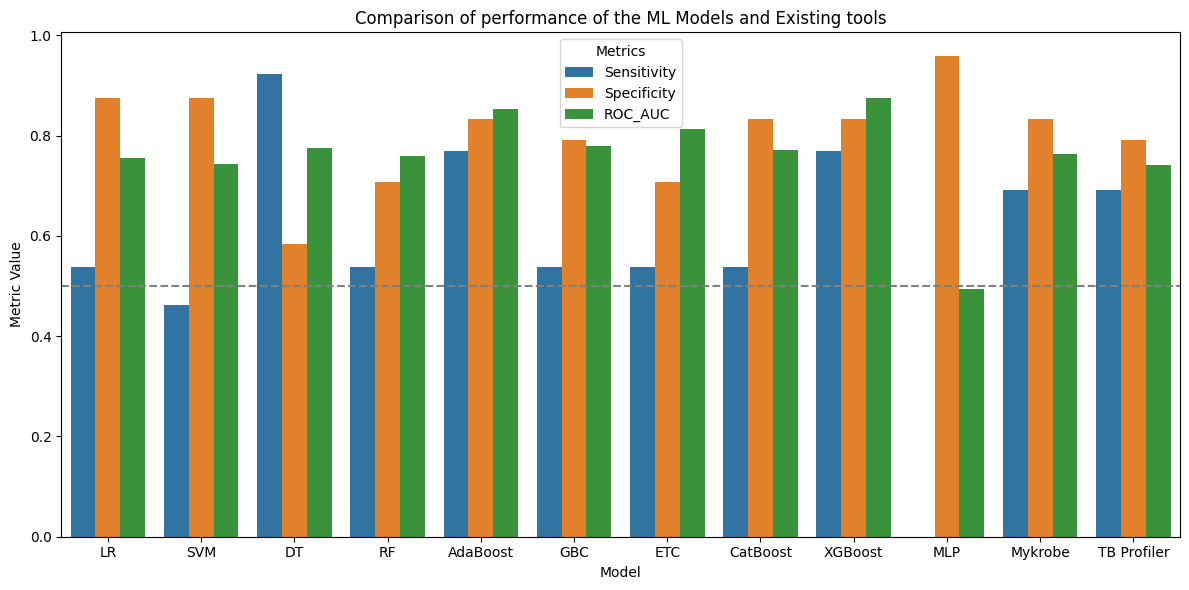

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the combined DataFrame for easier plotting
melted_combined_df = pd.melt(combined_results_df, id_vars=['Model'],
                              value_vars=['Sensitivity', 'Specificity', 'ROC_AUC'],
                              var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_combined_df, x='Model', y='Value', hue='Metric')
plt.title('Comparison of performance of the ML Models and Existing tools')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.axhline(0.5, color='gray', linestyle='--')  # Optional: reference line for 0.5
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


# Filtering thes best 2 performing models 

In [161]:
models_to_filter = ['XGBoost', 'CatBoost', 'Mykrobe', 'TB Profiler']

# Filter the DataFrame for rows where the 'model' column matches one of the models in the list
filtered_df = combined_results_df[combined_results_df['Model'].isin(models_to_filter)]

# Print the filtered DataFrame
filtered_df.head(n=10)

,Sample_ID,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
259,ERR038755,0.0,1.0,CatBoost,0.538462,0.833333,0.772436
260,ERR040137,1.0,1.0,CatBoost,0.538462,0.833333,0.772436
261,SRR7535040,0.0,0.0,CatBoost,0.538462,0.833333,0.772436
262,ERR987752,0.0,0.0,CatBoost,0.538462,0.833333,0.772436
263,ERR990552,0.0,0.0,CatBoost,0.538462,0.833333,0.772436
264,ERR038751,0.0,0.0,CatBoost,0.538462,0.833333,0.772436
265,ERR040119,1.0,1.0,CatBoost,0.538462,0.833333,0.772436
266,ERR987718,0.0,0.0,CatBoost,0.538462,0.833333,0.772436
267,ERR987774,1.0,0.0,CatBoost,0.538462,0.833333,0.772436
268,ERR987750,0.0,0.0,CatBoost,0.538462,0.833333,0.772436


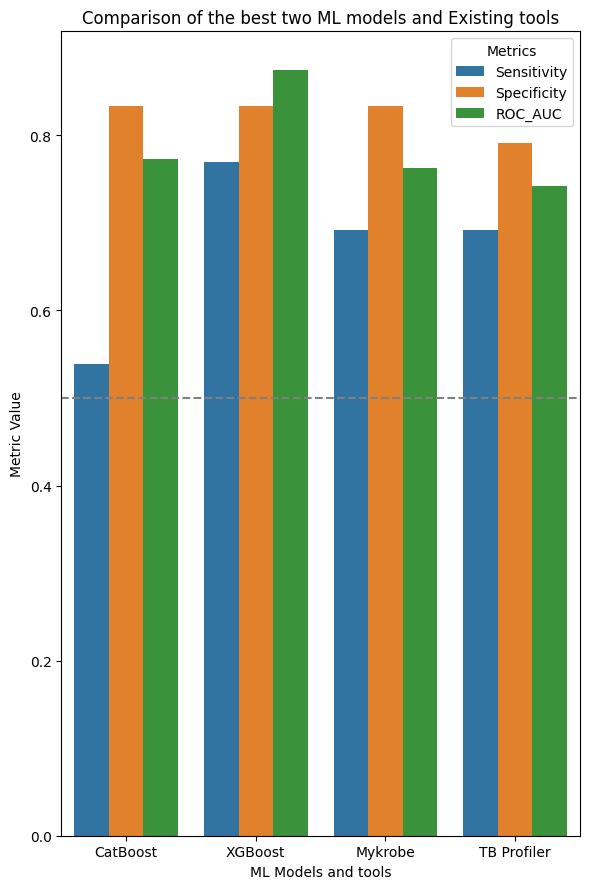

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the combined DataFrame for easier plotting
melted_combined_df = pd.melt(filtered_df, id_vars=['Model'],
                              value_vars=['Sensitivity', 'Specificity', 'ROC_AUC'],
                              var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(6, 9))
sns.barplot(data=melted_combined_df, x='Model', y='Value', hue='Metric')
plt.title('Comparison of the best two ML models and Existing tools')
plt.ylabel('Metric Value')
plt.xlabel('ML Models and tools')
plt.axhline(0.5, color='gray', linestyle='--')  # Optional: reference line for 0.5
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


# **Handling for class imbalance**

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, X_train.shape, y_resampled.shape, y_train.shape

((188, 4997), (145, 4997), (188,), (145,))

In [47]:
y_resampled.value_counts()

0    94
1    94
Name: EMB, dtype: int64

In [48]:
X_resampled.head()

,HIV STATUS,AGE,SEX,POS_371,POS_1228,POS_1552,POS_1849,POS_1977,POS_2532,POS_3446,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,1,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,52,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,33,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,23,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Testing performance**

In [ ]:
# Function to evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def Testing_performance(models, X_train, y_train, X_test, y_test):

    results = {}
    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        
        pipe.fit(X_train, y_train)
        y_pred_test = pipe.predict(X_test)
        y_pred_proba_test = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else [0]*len(X_test)
        
        accuracy = round(accuracy_score(y_test, y_pred_test),2)
        precision = round(precision_score(y_test, y_pred_test),2)
        recall = round(recall_score(y_test, y_pred_test),2)
        f1 = round(f1_score(y_test, y_pred_test),2)
        mcc = round(matthews_corrcoef(y_test, y_pred_test),2)
        auc_roc = round(roc_auc_score(y_test, y_pred_proba_test),2)
        
        results[name] = {
            'accuracy': accuracy,
            'precision': precision, 
            'recall': recall,
            'f1_score': f1,
            'MCC':mcc,
            'auc_roc': auc_roc
        }
    return results

In [ ]:
testing_performance2 = Testing_performance(models, X_resampled, y_resampled, X_test,  y_test)

In [ ]:
# Convert the dictionary to a DataFrame
testing_performance2 = pd.DataFrame.from_dict(testing_performance2)

# Transpose the DataFrame to have items in columns as rows and rows as columns
testing_performance_transposed2 = testing_performance2.T

# Display the transposed DataFrame
testing_performance_transposed2.head(13)

In [ ]:
testing_performance2 = Testing_performance(models, X_resampled, y_resampled, X_val,  Y_val)

In [ ]:
# Convert the dictionary to a DataFrame
testing_performance2 = pd.DataFrame.from_dict(testing_performance2)

# Transpose the DataFrame to have items in columns as rows and rows as columns
testing_performance_transposed2 = testing_performance2.T

# Display the transposed DataFrame
testing_performance_transposed2.head(13)

In [ ]:
testing_performance2 = Testing_performance(models, X_train, y_train, X_test,  y_test)
# Convert the dictionary to a DataFrame
testing_performance2 = pd.DataFrame.from_dict(testing_performance2)

# Transpose the DataFrame to have items in columns as rows and rows as columns
testing_performance_transposed2 = testing_performance2.T

# Display the transposed DataFrame
testing_performance_transposed2.head(13)

In [34]:
#testing_performance_transposed2.to_csv("EMB_Class_balanced_testing_5_models_performance.csv")

In [32]:
scores = ["accuracy", "precision", "recall", "f1",
          "roc_auc", "mcc"]
f1 = [] # To hold the f1-scores for each model
precision = [] # To hold the precision scores for each model
recall = [] # To hold the recall scores for each model
accuracy = [] # To hold the accuracy scores for each model
roc_auc = [] # To hold the roc_auc scores for each model
mcc = []
score_lists = [accuracy, precision, recall, f1, roc_auc, mcc]
for i, (name, classifier) in enumerate(models):
    print(name)
    pipe = Pipeline([('ct', ct), (name, classifier)])
    for index, score in enumerate(scores):
        if score == "mcc":
            cv_score = cross_val_score(pipe, X_resampled, y_resampled, cv=skfold,  
                                       scoring=make_scorer(matthews_corrcoef))
        else:
            cv_score = cross_val_score(pipe, X_resampled, y_resampled, cv=skfold, scoring=score)
        score_lists[index].append(cv_score)
        print(score + " : " + str(np.mean(cv_score)))
    print("\n")

Logistic regression


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8133712660028449


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8045180061484409


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8274853801169592


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8128722286541512


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8715604801477376


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6316655467215797


Suport Vector Machine


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.6227596017069701


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.5971428571428572


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7771929824561404


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.6743715463161282


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.6952600800246229


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.25674483310745605


Decision trees


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7610241820768137


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7145714285714286


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8497076023391813


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7773121358743953


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7710526315789473


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5562011289515892


Random Forest


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7655761024182077


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7821753246753247


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.764327485380117


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7539578676420781


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8360880270852569


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5553288359557605


Ada Boost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7665718349928876


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.750530303030303


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8076023391812865


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7753708927176612


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8421975992613113


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5386270852893081


Gradient Boosting


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7924608819345662


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7837938205585264


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8181286549707603


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7972664666935796


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8782086795937211


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5914043131635458


ExtraTrees Classifier


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7974395448079659


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7963492063492064


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7748538011695907


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.785563909774436


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8636503539550631


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5784970071499032


CatBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.8137980085348506


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8102673796791444


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8280701754385966


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.815809881175735


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.866605109264389


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6331888885845625


XGBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.818918918918919


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.8517273576097105


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7865497076023392


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.8140813540813541


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.899507540781779


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.6453932952602227


Neural networks


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.49459459459459454


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.29729729729729726


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.6


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.3975757575757576


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.4894736842105264


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.0




In [33]:

#'LogR', 'gNB', 'SVM', 'DT', 'RF', 'KNN', 'ADA', 'GBC', 'ETC', 'LGBM', 'CAT', 'Xgboost', 'NN'

models_names = ['Logistic regression', 'Support Vector Machine', 'Decision trees', 'Random Forest', 
                'Ada Boost', 'Gradient Boosting', 'ExtraTrees Classifier', 'CatBoost',
                'XGBoost', 'Neural networks']

df_f1 = pd.DataFrame(f1, columns = list(range(5)), index = models_names).T.assign(Score = 'f1')
df_precision = pd.DataFrame(precision, columns = list(range(5)), index = models_names).T.assign(Score = 'precision')
df_recall = pd.DataFrame(recall, columns = list(range(5)), index = models_names).T.assign(Score = 'recall')
df_accuracy = pd.DataFrame(accuracy, columns = list(range(5)), index = models_names).T.assign(Score = 'accuracy')
df_roc = pd.DataFrame(roc_auc, columns = list(range(5)), index = models_names).T.assign(Score = 'roc_auc')

df_mcc = pd.DataFrame(mcc, columns = list(range(5)), index = models_names).T.assign(Score = 'mcc')

#concated_df = pd.concat([df_f1, df_precision, df_recall, df_accuracy, df_roc])

concated_df = pd.concat([df_accuracy, df_f1, df_precision, df_recall, df_roc, df_mcc]) 
melted_df = pd.melt(concated_df, id_vars=['Score'], var_name=['Model']) 

In [34]:
#concated_df1 = pd.concat([df_accuracy, df_f1, df_precision, df_recall, df_roc, df_mcc]) 
melted_df1 = pd.melt(concated_df, id_vars=['Score'], var_name=['Model']) 
melted_df1.to_csv("Cross_val_scores_EMB_balanced_dataset.csv")

In [35]:
concated_df = pd.concat([df_roc, df_mcc]) 
melted_df = pd.melt(concated_df, id_vars=['Score'], var_name=['Model']) 

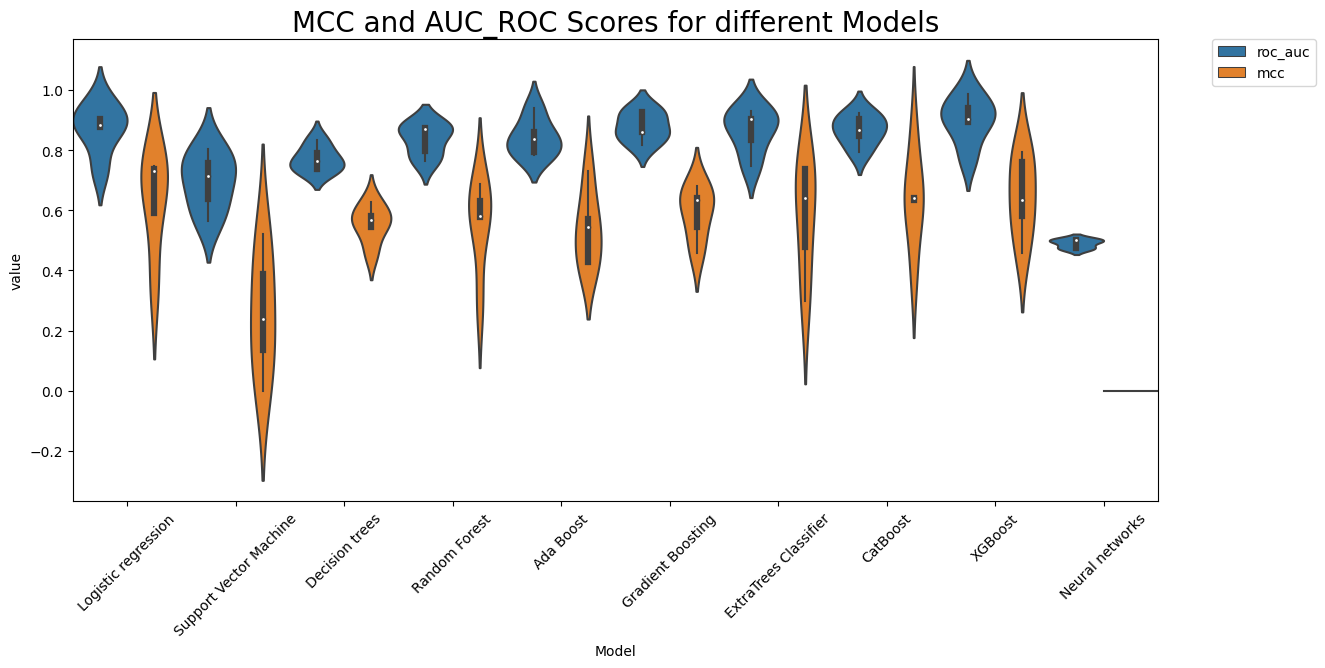

In [36]:
plt.figure(figsize=(14, 6))
# Define a custom color palette for the scores
#score_colors = {"f1": "blue", "precision": "green", "recall": "orange", "accuracy": "red", #"roc_auc": "purple", "mcc": "white"}
sn.violinplot(x="Model", y="value", hue="Score", data=melted_df,
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"4"},
            width= 1.0, showfliers=False) 
plt.title("MCC and AUC_ROC Scores for different Models", fontsize=20)
plt.xticks(rotation=45)
# Place legend in the upper right corner outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("EMB_Cross_val_violin_plot_balanced.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.title("Isoniazid", fontsize = 20)

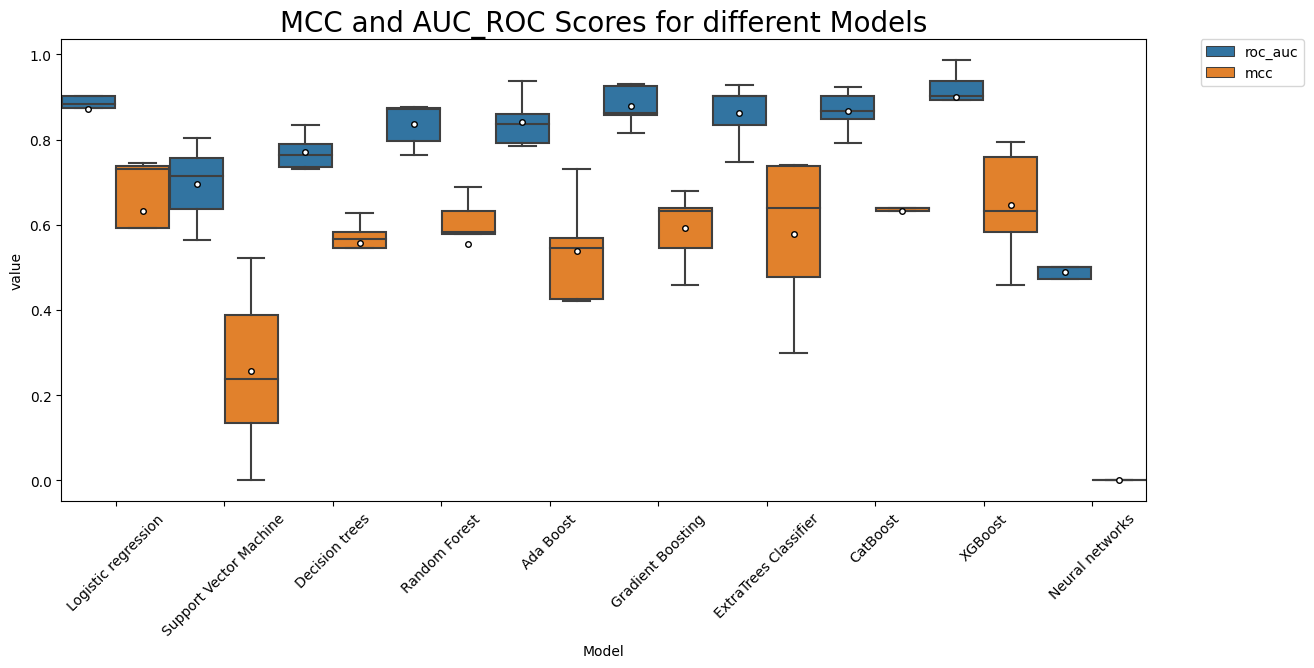

In [37]:
plt.figure(figsize=(14, 6))
# Define a custom color palette for the scores
#score_colors = {"f1": "blue", "precision": "green", "recall": "orange", "accuracy": "red", #"roc_auc": "purple", "mcc": "white"}
sn.boxplot(x="Model", y="value", hue="Score", data=melted_df,
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"4"},
            width= 1.0, showfliers=False) 
plt.title("MCC and AUC_ROC Scores for different Models", fontsize=20)
plt.xticks(rotation=45)
# Place legend in the upper right corner outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("EMB_Cross_val_box_plot_balanced.png", dpi=300, bbox_inches="tight")
plt.show()
#plt.title("Isoniazid", fontsize = 20)

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model Logistic regression MCC: 0.6449 variance: 0.1405


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model Suport Vector Machine MCC: 0.2637 variance: 0.1619


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model Decision trees MCC: 0.4540 variance: 0.1071


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model Random Forest MCC: 0.5252 variance: 0.2162


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model Ada Boost MCC: 0.6681 variance: 0.1885


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model Gradient Boosting MCC: 0.6544 variance: 0.1454


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model ExtraTrees Classifier MCC: 0.5770 variance: 0.1960


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model CatBoost MCC: 0.5774 variance: 0.1582


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model XGBoost MCC: 0.6702 variance: 0.1822


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

model Neural networks MCC: 0.0741 variance: 0.1482


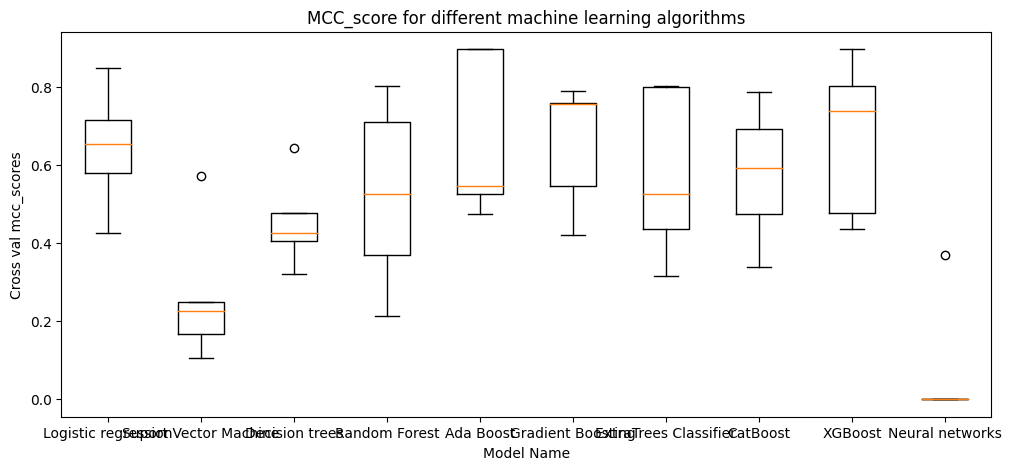

In [38]:
results = []
names = []
for name, model in models:
    pipe = Pipeline([('ct', ct), (name, model)])
       
    # Define a custom scorer for MCC
    scorer = make_scorer(matthews_corrcoef)

    # Use cross_val_score with 5 splits to obtain MCC
    mcc_scores = cross_val_score(pipe, X_resampled, y_resampled, scoring=scorer, cv=5, n_jobs=-1, verbose=0)
    
    names.append(name)
    results.append(mcc_scores)
    print("model %s MCC: %.4f variance: %.4f"%(name, np.mean(mcc_scores), np.std(mcc_scores)))     
    
plt.figure(figsize=(12,5))
plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1),names)
plt.title("MCC_score for different machine learning algorithms")
plt.xlabel("Model Name")
plt.ylabel("Cross val mcc_scores")
plt.show()



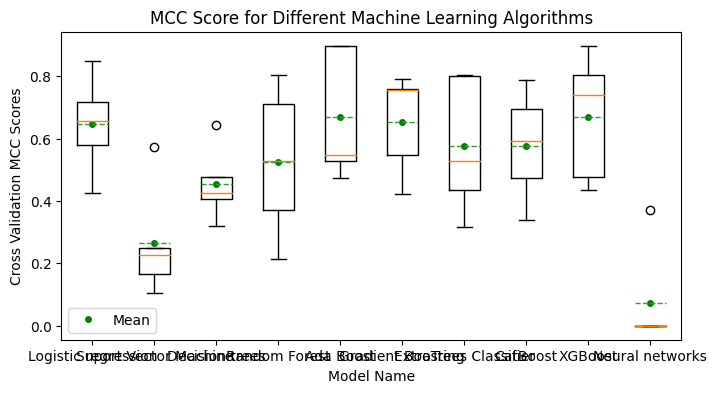

In [39]:
# Assuming 'results' contains the MCC scores for different models and 'names' contains the model names

plt.figure(figsize=(8, 4))
box = plt.boxplot(results, meanline=True, showmeans=True)

# Add mean value as a green dot
mean_values = [np.mean(result) for result in results]
plt.plot(np.arange(1, len(names) + 1), mean_values, 'go', label='Mean', markersize=4)  # Change color to green

plt.xticks(np.arange(1, len(names) + 1), names)
plt.title("MCC Score for Different Machine Learning Algorithms")
plt.xlabel("Model Name")
plt.ylabel("Cross Validation MCC Scores")
plt.legend()

# Save the plot
plt.savefig('EMB_MCC_boxplot_with_mean_dot.png', dpi=300)  # Save the plot as a PNG file

plt.show()

# **Prediction performance of the various models evaluated using ROC curves for the original and upsampled datasets** 

In [22]:
def roc_curves(models, X_train, y_train,X_test, y_test, ct, file_name):
    plt.figure(figsize=(8, 8))

    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        
        pipe.fit(X_train, y_train)
        y_pred_test = pipe.predict(X_test)
        y_pred_proba_test = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else [0]*len(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Original {name} (AUC = {roc_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    #plt.title('ROC Curves for  Original Datasets')
    plt.legend(loc='lower right')
    plt.savefig(file_name, dpi=300)
    plt.show()
        
        

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

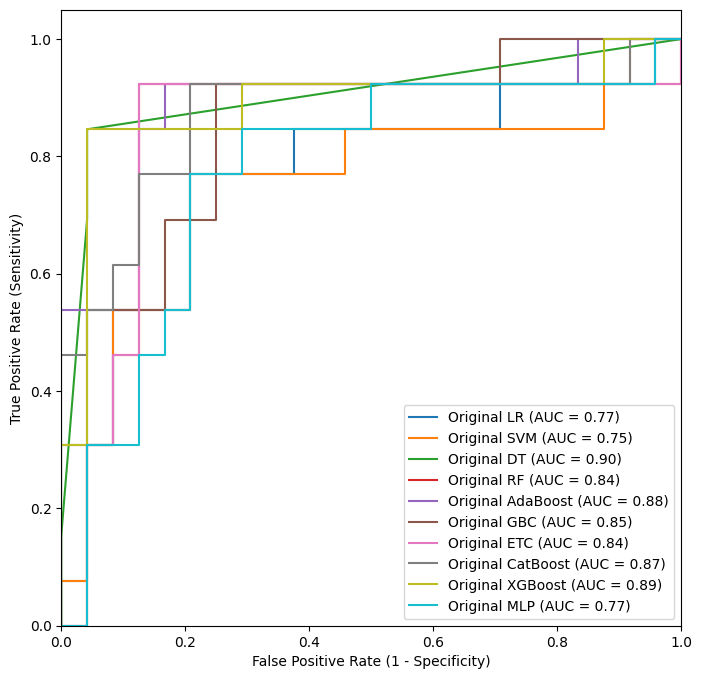

In [23]:
roc_curves(models, X_train, y_train,X_test, y_test, ct, 'Original_dataset_ROC_Plot_EMB.png')

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

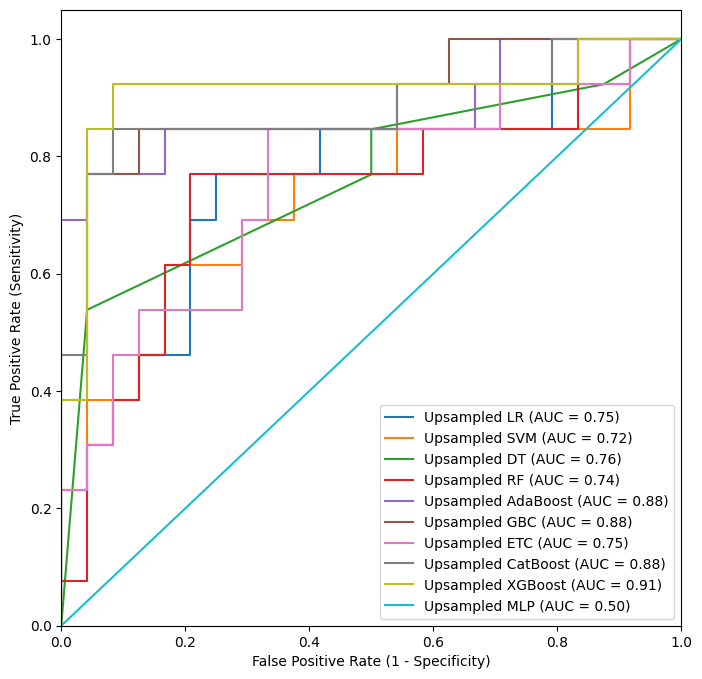

In [24]:
def roc_curves(models, X_train, y_train,X_test, y_test, ct, file_name):
    plt.figure(figsize=(8, 8))

    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        
        pipe.fit(X_train, y_train)
        y_pred_test = pipe.predict(X_test)
        y_pred_proba_test = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else [0]*len(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Upsampled {name} (AUC = {roc_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    #plt.title('ROC Curves for  Original Datasets')
    plt.legend(loc='lower right')
    plt.savefig(file_name, dpi=300)
    plt.show()
        
roc_curves(models, X_resampled, y_resampled,X_test, y_test, ct, 'Upsampled_dataset_ROC_Plot_EMB.png')

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_both_roc_curves(models, X_train, y_train,X_test, y_test, X_train_resampled, y_train_resampled, ct):
    plt.figure(figsize=(8, 10))

    # Plot ROC curves for original data
    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        pipe.fit(X_train, y_train)  # Refit using original data
        y_pred_proba_test = pipe.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Original {name} (AUC = {roc_auc:.2f})')

    # Plot ROC curves for downsampled data
    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        pipe.fit(X_train_resampled, y_train_resampled)  
        y_pred_proba_test = pipe.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle='--', label=f'Upsampled {name} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    #plt.title('ROC Curves for Different Models for Original and Upsampled INH Datasets')
    plt.legend(loc='lower right')
    plt.savefig('Combined_ROC_Plot_EMB.png', dpi=300)
    plt.show()

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

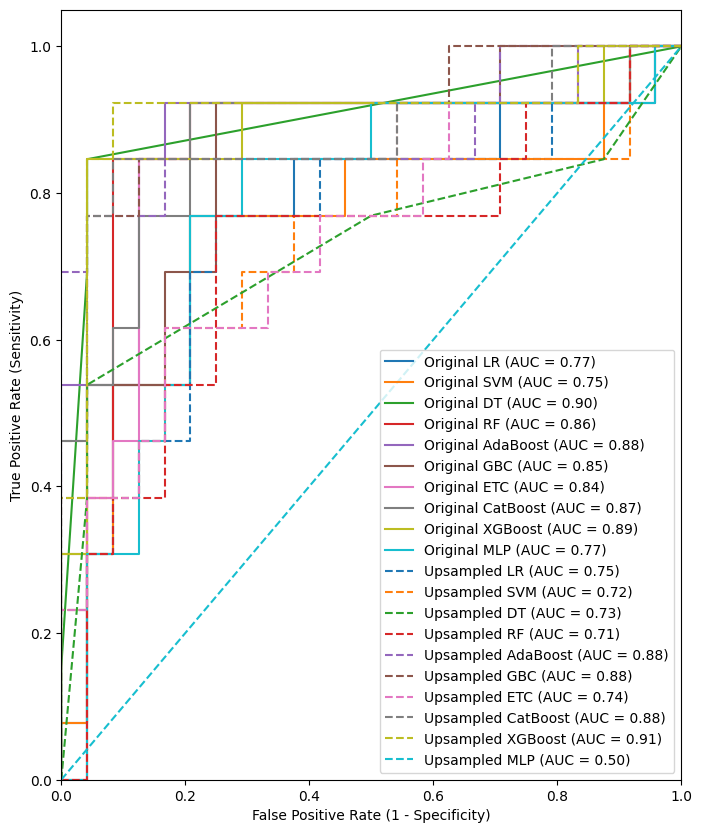

In [26]:
ROC_CURVES = plot_both_roc_curves(models, X_train, y_train,X_test, y_test, X_resampled, y_resampled, ct)

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

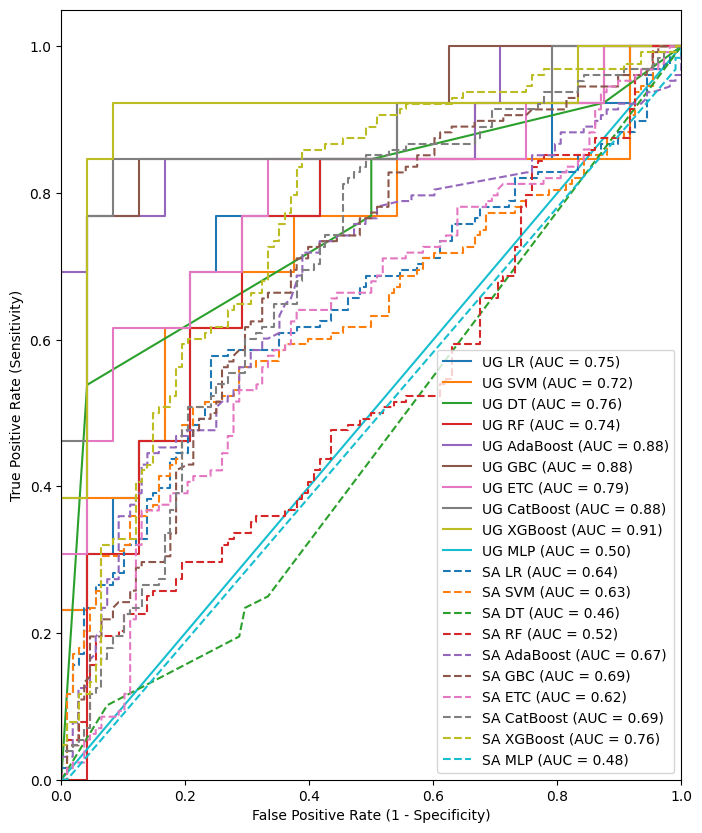

In [27]:
def plot_both_roc_curves(models,  X_train_resampled, y_train_resampled, X_test, y_test, X_val, Y_val, ct):
    plt.figure(figsize=(8, 10))

    # Plot ROC curves for original data
    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        pipe.fit(X_train_resampled, y_train_resampled)  # Refit using original data
        y_pred_proba_test = pipe.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'UG {name} (AUC = {roc_auc:.2f})')

    # Plot ROC curves for downsampled data
    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        pipe.fit(X_train_resampled, y_train_resampled)  
        y_pred_proba_test2 = pipe.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(Y_val, y_pred_proba_test2)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle='--', label=f'SA {name} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    #plt.title('ROC Curves for Different Models for Uganda and South Africa Datasets')
    plt.legend(loc='lower right')
    plt.savefig('Combined_ROC_Plot_EMB_val.png', dpi=300)
    plt.show()
ROC_CURVES = plot_both_roc_curves(models,X_resampled, y_resampled,X_test, y_test, X_val, Y_val, ct)

In [25]:
model_rf = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',n_estimators=100)
model_logr =LogisticRegression(C=10, max_iter=300, random_state=0)
model_gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators = 100, subsample=1.0,  random_state=0)
model_cat = CatBoostClassifier(depth=3, iterations=100, l2_leaf_reg=2, learning_rate = 0.1, verbose=False)
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_et = ExtraTreesClassifier(criterion='gini', max_depth=7)
model_svm = SVC(C=0.1, kernel='linear', probability =True)
model_ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)
model_nn= MLPClassifier(activation='relu', hidden_layer_sizes=(50,), solver='adam',random_state=1)
model_xgb = XGBClassifier(learning_rate=0.1,max_depth=9, n_estimators=100, subsample=0.9,random_state=0)

models = []
models.append(('LR', model_logr))
models.append(('SVM', model_svm))
models.append(('DT', model_dt))
models.append(('RF', model_rf))
models.append(('AdaBoost', model_ada))
models.append(('GBC', model_gbc))
models.append(('ETC', model_et))
models.append(('CatBoost', model_cat))
models.append(('XGBoost', model_xgb))
models.append(('MLP', model_nn))



In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
def cross_val_auc(models, X, y, cv, ct):
    auc_scores = {}
    auc_summary = {}

    for i, (name, classifier) in enumerate(models):
        pipe = Pipeline([('ct', ct), (name, classifier)])
        
        #skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(pipe, X, y, cv=cv, scoring='roc_auc', 
                                 error_score='raise') 
        auc_scores[name] = scores
        mean_score = np.nanmean(scores)
        std_score = np.nanstd(scores)
        confidence_interval = (mean_score - 1.96 * (std_score / np.sqrt(cv)), 
                               mean_score + 1.96 * (std_score / np.sqrt(cv)))

        auc_summary[name] = {
            'AUC Mean': mean_score,
            'AUC Std Dev': std_score,
            'AUC 95% CI Lower': confidence_interval[0],
            'AUC 95% CI Upper': confidence_interval[1]
        }

    return auc_scores, auc_summary

In [29]:
auc_scores_original, auc_summary_original = cross_val_auc(models, X, Y, 5, ct)
auc_summary_df_original = pd.DataFrame(auc_summary_original).T
auc_summary_df_original.head(n=13)

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

,AUC Mean,AUC Std Dev,AUC 95% CI Lower,AUC 95% CI Upper
LR,0.745257,0.106961,0.651502,0.839013
SVM,0.741105,0.100691,0.652845,0.829364
DT,0.678089,0.069533,0.617140,0.739038
RF,0.691648,0.103422,0.600994,0.782302
AdaBoost,0.789825,0.076439,0.722823,0.856827
GBC,0.774020,0.122970,0.666232,0.881808
ETC,0.716309,0.105462,0.623868,0.808750
CatBoost,0.786638,0.085642,0.711570,0.861707
XGBoost,0.785080,0.105482,0.692621,0.877539
MLP,0.565104,0.086007,0.489716,0.640492


In [30]:
auc_summary_df_original = pd.DataFrame(auc_summary_original).T.round(2)
auc_summary_df_original.head(n=13)

,AUC Mean,AUC Std Dev,AUC 95% CI Lower,AUC 95% CI Upper
LR,0.75,0.11,0.65,0.84
SVM,0.74,0.10,0.65,0.83
DT,0.68,0.07,0.62,0.74
RF,0.69,0.10,0.60,0.78
AdaBoost,0.79,0.08,0.72,0.86
GBC,0.77,0.12,0.67,0.88
ETC,0.72,0.11,0.62,0.81
CatBoost,0.79,0.09,0.71,0.86
XGBoost,0.79,0.11,0.69,0.88
MLP,0.57,0.09,0.49,0.64


In [31]:
auc_summary_df_original.to_csv("AUC_CI_Original_dataset_EMB.csv")

In [ ]:
auc_scores_train, auc_summary_train = cross_val_auc(models, X_train, y_train, 5, ct)
auc_summary_df_train = pd.DataFrame(auc_summary_train).T
auc_summary_df_train.head(n=13)

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

In [ ]:
auc_summary_df_train = pd.DataFrame(auc_summary_train).T.round(2)
auc_summary_df_train.head(n=13)

In [ ]:
auc_summary_df_train.to_csv("AUC CI summary for trained dataset EMB.csv")

In [ ]:
auc_scores_upsampled, auc_summary_upsampled = cross_val_auc(models, X_resampled, y_resampled, 5, ct)
auc_summary_df_upsampled = pd.DataFrame(auc_summary_upsampled).T
auc_summary_df_upsampled.head(n=13)

In [ ]:
auc_summary_df_upsampled = pd.DataFrame(auc_summary_upsampled).T.round(2)
auc_summary_df_upsampled.head(n=13)

In [ ]:
auc_summary_df_upsampled.to_csv("AUC CI summary for upsampled dataset EMB.csv")

In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def AUC_multiple_comparison_test_csv(auc_scores, output_file):
    model_names = list(auc_scores.keys())
    scores = list(auc_scores.values())
    
    # Flatten the scores into a single list
    scores_flat = [score for model_scores in scores for score in model_scores]
    
    # Create a list of model names repeated for each score
    model_names_flat = [[model_name] * len(scores[i]) for i, model_name in enumerate(model_names)]
    model_names_flat = [model_name for model_names in model_names_flat for model_name in model_names]
    
    # Perform multiple comparison test
    tukey_results = pairwise_tukeyhsd(scores_flat, model_names_flat)
    print(tukey_results)
    
    # Convert Tukey HSD results to a pandas DataFrame
    tukey_results_df = pd.DataFrame(tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
    
    # Save the DataFrame to a CSV file
    tukey_results_df.to_csv(output_file, index=False)


In [ ]:
AUC_multiple_comparison_test_csv(auc_scores_original,'Tukey_results_EMB_2024.csv')


In [ ]:
AUC_multiple_comparison_test_csv(auc_scores_train,'Tukey_results_trained_EMB_2024.csv')

In [ ]:
AUC_multiple_comparison_test_csv(auc_scores_upsampled,'Tukey_results_Upsampled_EMB_2024.csv')

## Obtain features of importance for all the models 

In [33]:
##Creating a function 
feature_names = X_resampled.columns
def feature_importance(model, feature_names):
    if model == model_cat:
        model.fit(X_resampled, y_resampled, cat_features=cat_features)
        importance = model.feature_importances_.round(2)
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    elif model == model_xgb:
        pipe = Pipeline([('ct', ct),('estimator', model)])
        pipe.fit(X_resampled, y_resampled)
        importance = model.feature_importances_.round(2)
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    else: 
        model.fit(X_resampled, y_resampled)
        importance = model.feature_importances_.round(2)
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
        #Features[model] = pd.DataFrame(feature_names, importance)
    return feature_importance[:10]

In [28]:
gbc_features = feature_importance(model_gbc, feature_names)
print(gbc_features)

[('POS_338453', 0.11), ('POS_761155', 0.1), ('POS_4247429', 0.06), ('POS_3884906', 0.05), ('POS_3590686', 0.04), ('POS_105045', 0.03), ('POS_234496', 0.03), ('POS_2704884', 0.03), ('POS_3136335', 0.03), ('POS_3379784', 0.03)]


In [32]:
ada_features = feature_importance(model_ada, feature_names)
print(ada_features)

[('POS_105045', 0.11), ('POS_4247431', 0.09), ('POS_234496', 0.08), ('POS_2357268', 0.07), ('POS_338020', 0.06), ('POS_761155', 0.05), ('POS_1533583', 0.05), ('POS_1631066', 0.05), ('POS_1636826', 0.05), ('POS_338453', 0.04)]


In [33]:
etc_features = feature_importance(model_et, feature_names)
print(etc_features)

[('POS_4247431', 0.02), ('POS_104712', 0.01), ('POS_162151', 0.01), ('POS_234496', 0.01), ('POS_338020', 0.01), ('POS_338453', 0.01), ('POS_340617', 0.01), ('POS_366922', 0.01), ('POS_580772', 0.01), ('POS_623508', 0.01)]


In [34]:
model_xgb = XGBClassifier(learning_rate=0.1,max_depth=9, n_estimators=100, subsample=0.9,random_state=0)
xgb_features = feature_importance(model_xgb, feature_names)
print(xgb_features)

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[('POS_1789933', 0.04), ('POS_791249', 0.03), ('POS_798779', 0.03), ('POS_1816349', 0.03), ('POS_781395', 0.02), ('POS_1651308', 0.02), ('POS_1655546', 0.02), ('POS_2097990', 0.02), ('POS_2315748', 0.02), ('POS_3420388', 0.02)]


In [35]:
dc_features = feature_importance(model_dt, feature_names)
print(dc_features)

[('POS_761155', 0.3), ('POS_105045', 0.26), ('POS_338453', 0.23), ('POS_1468208', 0.11), ('POS_927385', 0.1), ('HIV STATUS', 0.0), ('AGE', 0.0), ('SEX', 0.0), ('POS_371', 0.0), ('POS_1228', 0.0)]


In [36]:
rf_features = feature_importance(model_rf, feature_names)
print(rf_features)

[('POS_761155', 0.02), ('POS_2704884', 0.02), ('AGE', 0.01), ('POS_105045', 0.01), ('POS_338020', 0.01), ('POS_338453', 0.01), ('POS_836538', 0.01), ('POS_836658', 0.01), ('POS_964969', 0.01), ('POS_968426', 0.01)]


In [37]:
cat_features = cat_var.copy()

In [34]:
model_cat.fit(X_resampled, y_resampled, cat_features=cat_features)
importance = model_cat.feature_importances_.round(2)
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
cat_features = feature_importance[:10]
print(cat_features)

NameError: name 'cat_features' is not defined

In [35]:
def plot_feature_importances(importances, model_name, File_name):
    features, scores = zip(*importances)
    
    plt.figure(figsize=(6, 4))
    y_pos = np.arange(len(features))
    
    plt.barh(y_pos, scores, align='center', color="blue")
    plt.yticks(y_pos, features)
    plt.xlabel('Importance Score')
    #plt.title(f'Top 10 Features for {model_name}')
    plt.savefig(File_name, dpi=300)  
    plt.gca().invert_yaxis()  # To show features from top to bottom
    plt.show()

In [38]:
def plot_feature_importances(importances, model_name, File_name):
    features, scores = zip(*importances)
    
    plt.figure(figsize=(6, 4))
    y_pos = np.arange(len(features))
    
    plt.barh(y_pos, scores, align='center', color="navy")
    plt.yticks(y_pos, features)
    plt.ylabel('Feature')
    plt.xlabel('Importance Score')
    #plt.title(f'Top 10 Features for {model_name}')
    plt.savefig(File_name, dpi=300)  
    plt.gca().invert_yaxis()  # To show features from top to bottom
    plt.show()

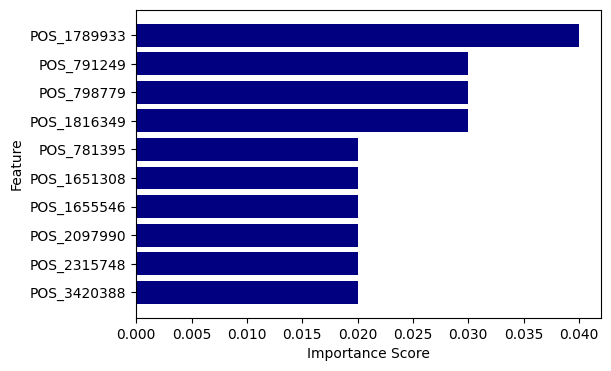

In [46]:
XGBOOST = plot_feature_importances(xgb_features, "Extreme gradient boosting", 'xgboost_EMB.png')

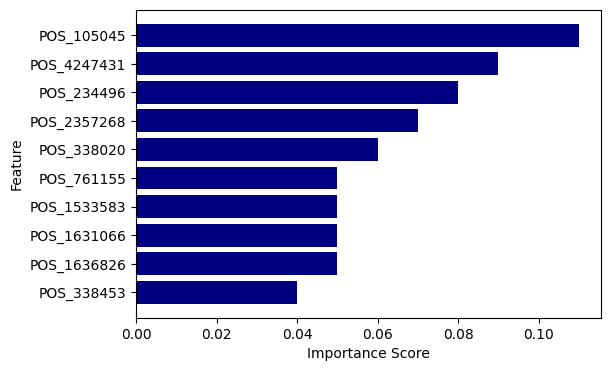

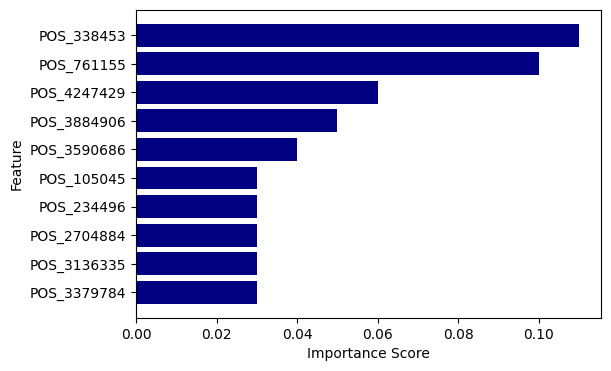

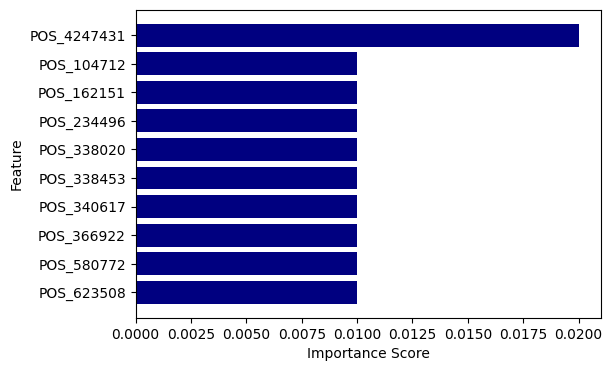

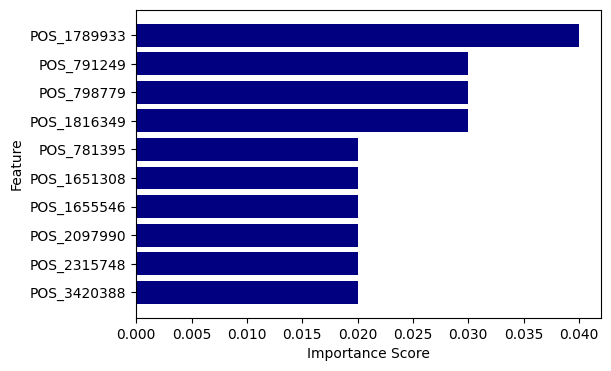

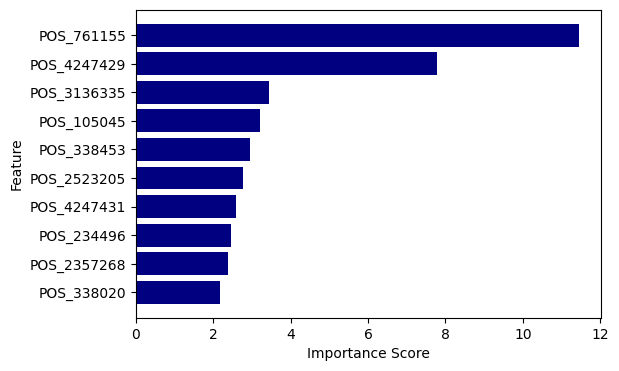

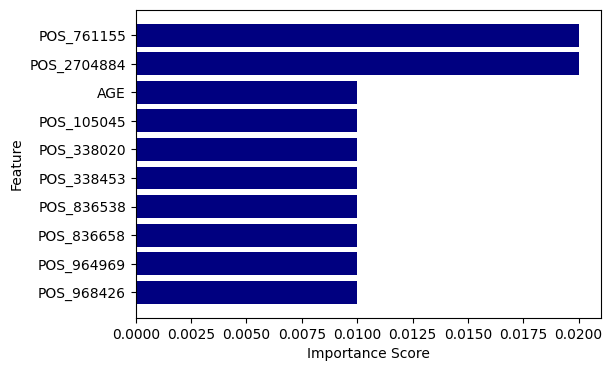

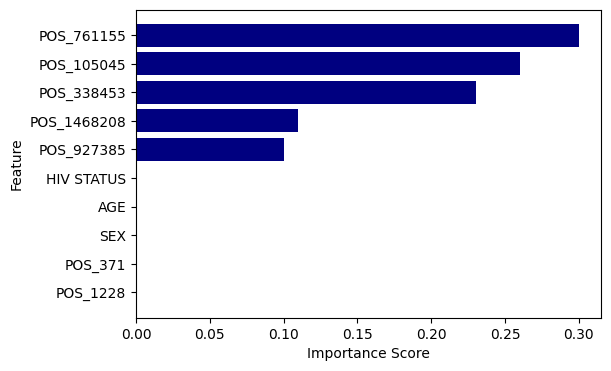

In [45]:
ADA = plot_feature_importances(ada_features,"Adaboost", 'ADA_EMB.png' )
GBC = plot_feature_importances(gbc_features, "Gradient boosting ", 'GBC_EMB.png')
ET = plot_feature_importances(etc_features, "Extra trees", 'ETC_EMB.png')
XGBOOST = plot_feature_importances(xgb_features, "Extreme gradient boosting", 'xgboost_EMB.png')
CAT = plot_feature_importances(cat_features, "Catboost", 'cat_EMB.png')
RF = plot_feature_importances(rf_features, "Random Forest", 'RF_EMB.png')
DC=plot_feature_importances(dc_features, "Decision trees", 'DT_EMB.png')

Top 10 Feature Coefficients:
          Feature  Coefficient
972    POS_761155         2.12
4721  POS_4247429         1.70
4722  POS_4247431         1.45
4336  POS_3942481         1.23
184    POS_104712        -1.18


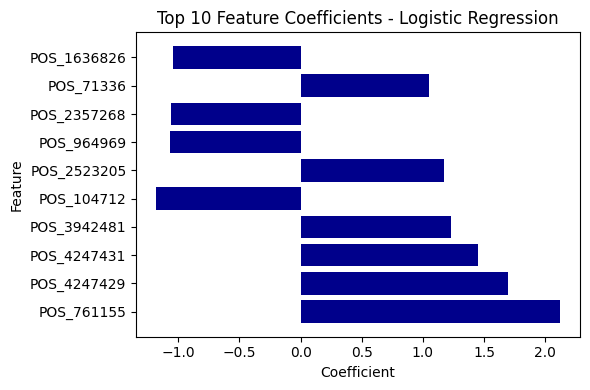

In [35]:
# Fit the model on the training data
model_logr.fit(X_resampled, y_resampled)

# Access the coefficients and intercept
coefficients = model_logr.coef_[0].round(2)
intercept = model_logr.intercept_[0].round(2)

# Create a DataFrame to display feature coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by coefficient magnitude
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the feature coefficients
#print("Feature Coefficients:")
#print(feature_importance_df)

# Create a subset of X_train with only the significant features
significant_features = feature_importance_df.loc[feature_importance_df['Coefficient'] != 0, 'Feature'].tolist()
X_significant = X_resampled[significant_features]


# Select the top 10 features
top_10_features_df = feature_importance_df.head(10)

# Display the top 12 feature coefficients
print("Top 10 Feature Coefficients:")
print(top_10_features_df.head(5))

# Plot the top 10 features with their coefficients
plt.figure(figsize=(6, 4))
plt.barh(top_10_features_df['Feature'], top_10_features_df['Coefficient'], color='darkblue')
plt.title('Top 10 Feature Coefficients - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("LogR_EMB_Feature_importance_EMB.png", dpi=300)
plt.show()

In [36]:
#Top 10 features of logR with there coefficients
logr_features = feature_importance_df.head(10)
print(logr_features)


          Feature  Coefficient
972    POS_761155         2.12
4721  POS_4247429         1.70
4722  POS_4247431         1.45
4336  POS_3942481         1.23
184    POS_104712        -1.18
2873  POS_2523205         1.17
1209   POS_964969        -1.07
2728  POS_2357268        -1.06
140     POS_71336         1.05
1903  POS_1636826        -1.04


In [37]:
# Convert the dataframe to a list
Logr_features = logr_features.values.tolist()
print(Logr_features)

[['POS_761155', 2.12], ['POS_4247429', 1.7], ['POS_4247431', 1.45], ['POS_3942481', 1.23], ['POS_104712', -1.18], ['POS_2523205', 1.17], ['POS_964969', -1.07], ['POS_2357268', -1.06], ['POS_71336', 1.05], ['POS_1636826', -1.04]]


In [38]:
import pandas as pd

def create_feature_importance_table(importances_list, model_names):
    columns = ['Feature', 'Importance'] * len(model_names)
    table_data = []
    
    for importances in importances_list:
        features, importance_values = zip(*importances)
        table_data.append(features)
        table_data.append(importance_values)
    
    df = pd.DataFrame(table_data).T
    df.columns = columns
    
    return df

In [39]:
importances_list = [ada_features, cat_features, gbc_features, xgb_features, etc_features, rf_features, dc_features,  Logr_features]
model_names = ["Adaboost", "Catboost", "Gradient boosting", "XGBoost", "Extra trees", "Random Forest", "Decision trees",  "Logistic regression"]

feature_importance_df = create_feature_importance_table(importances_list, model_names)
feature_importance_df

,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance
0,POS_105045,0.11,POS_761155,11.44,POS_338453,0.11,POS_1789933,0.04,POS_338453,0.02,POS_761155,0.03,POS_761155,0.31,POS_761155,2.12
1,POS_4247431,0.09,POS_4247429,7.79,POS_761155,0.1,POS_791249,0.03,POS_761155,0.02,POS_4247429,0.02,POS_105045,0.27,POS_4247429,1.7
2,POS_234496,0.08,POS_3136335,3.43,POS_4247429,0.06,POS_798779,0.03,POS_1533583,0.02,AGE,0.01,POS_338453,0.24,POS_4247431,1.45
3,POS_2357268,0.07,POS_105045,3.21,POS_3884906,0.05,POS_1816349,0.03,POS_4247431,0.02,POS_105045,0.01,POS_799136,0.1,POS_3942481,1.23
4,POS_338020,0.06,POS_338453,2.96,POS_3590686,0.04,POS_781395,0.02,POS_105045,0.01,POS_234496,0.01,POS_3847364,0.07,POS_104712,-1.18
5,POS_761155,0.05,POS_2523205,2.78,POS_105045,0.03,POS_1651308,0.02,POS_162151,0.01,POS_338020,0.01,HIV STATUS,0.0,POS_2523205,1.17
6,POS_1533583,0.05,POS_4247431,2.59,POS_234496,0.03,POS_1655546,0.02,POS_234496,0.01,POS_338453,0.01,AGE,0.0,POS_964969,-1.07
7,POS_1631066,0.05,POS_234496,2.46,POS_2704884,0.03,POS_2097990,0.02,POS_338020,0.01,POS_472711,0.01,SEX,0.0,POS_2357268,-1.06
8,POS_1636826,0.05,POS_2357268,2.38,POS_3136335,0.03,POS_2315748,0.02,POS_472711,0.01,POS_854252,0.01,POS_371,0.0,POS_71336,1.05
9,POS_338453,0.04,POS_338020,2.18,POS_3379784,0.03,POS_3420388,0.02,POS_623508,0.01,POS_964969,0.01,POS_1228,0.0,POS_1636826,-1.04


In [40]:
feature_importance_df.to_csv("Top_10_features_for_the_best_8_models_EMB.csv")

## Evaluating the performance of the best model on an external validation dataset with the top 10 features

In [25]:
pipe = Pipeline([('ct', ct),('estimator', model_xgb)])
# Fit the model
pipe.fit(X_resampled, y_resampled)

/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['POS_371', 'POS_1228',
                                                   'POS_1552', 'POS_1849',
                                                   'POS_1977', 'POS_2532',
                                                   'POS_3446', 'POS_4013',
                                                   'POS_5078', 'POS_6112',
                                                   'POS_6140', 'POS_6815',
                                                   'POS_7362', 'POS_7572',
                                                   'POS_7582', 'POS_7585',
                                                   'POS_8040', 'POS_8056',
                                                   'P...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [23]:
# Move 'HIV' column to the first position
cols = ['HIV STATUS'] + [col for col in X_val if col != 'HIV STATUS']
X_val = X_val[cols]

In [24]:
model_xgb = XGBClassifier(learning_rate=0.1,max_depth=9, n_estimators=100, subsample=0.9,random_state=0)
model_xgb.fit(X_resampled, y_resampled)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:HIV STATUS: category, SEX: category, POS_371: category, POS_1228: category, POS_1552: category, POS_1849: category, POS_1977: category, POS_2532: category, POS_3446: category, POS_4013: category, POS_5078: category, POS_6112: category, POS_6140: category, POS_6815: category, POS_7362: category, POS_7572: category, POS_7582: category, POS_7585: category, POS_8040: category, POS_8056: category, POS_8452: category, POS_9143: category, POS_9304: category, POS_10741: category, POS_11370: category, POS_11820: category, POS_11879: category, POS_12204: category, POS_13069: category, POS_13298: category, POS_13460: category, POS_14251: category, POS_14401: category, POS_14785: category, POS_14861: category, POS_15117: category, POS_16119: category, POS_17608: category, POS_17609: category, POS_17654: category, POS_21795: category, POS_21819: category, POS_22961: category, POS_23174: category, POS_24007: category, POS_25610: category, POS_26347: category, POS_26747: category, POS_26957: category, POS_26959: category, POS_27439: category, POS_27463: category, POS_27469: category, POS_27487: category, POS_27996: category, POS_28139: category, POS_28366: category, POS_28536: category, POS_28640: category, POS_29482: category, POS_29641: category, POS_30519: category, POS_30688: category, POS_30943: category, POS_31077: category, POS_32103: category, POS_32349: category, POS_32355: category, POS_33436: category, POS_33457: category, POS_33551: category, POS_33670: category, POS_33841: category, POS_34044: category, POS_34527: category, POS_34568: category, POS_34859: category, POS_35097: category, POS_35608: category, POS_36008: category, POS_36470: category, POS_36538: category, POS_37031: category, POS_37305: category, POS_37334: category, POS_37763: category, POS_39158: category, POS_39758: category, POS_40162: category, POS_42281: category, POS_42967: category, POS_43191: category, POS_43945: category, POS_44768: category, POS_46594: category, POS_48197: category, POS_48503: category, POS_49080: category, POS_49360: category, POS_49690: category, POS_50557: category, POS_51949: category, POS_51954: category, POS_53422: category, POS_53785: category, POS_54109: category, POS_54394: category, POS_54842: category, POS_55549: category, POS_55550: category, POS_55553: category, POS_56001: category, POS_57393: category, POS_62049: category, POS_62657: category, POS_63146: category, POS_63214: category, POS_63771: category, POS_64028: category, POS_64444: category, POS_65083: category, POS_65150: category, POS_65159: category, POS_65663: category, POS_66285: category, POS_66632: category, POS_66892: category, POS_67012: category, POS_67792: category, POS_68174: category, POS_68337: category, POS_69834: category, POS_69871: category, POS_69984: category, POS_69989: category, POS_70095: category, POS_70267: category, POS_70816: category, POS_70924: category, POS_71336: category, POS_71439: category, POS_71453: category, POS_72549: category, POS_74059: category, POS_74737: category, POS_75233: category, POS_75264: category, POS_75736: category, POS_75940: category, POS_77058: category, POS_79479: category, POS_79480: category, POS_79504: category, POS_80541: category, POS_80616: category, POS_81649: category, POS_81963: category, POS_82843: category, POS_83842: category, POS_83982: category, POS_84528: category, POS_84908: category, POS_85985: category, POS_87468: category, POS_88157: category, POS_88176: category, POS_89200: category, POS_89871: category, POS_92199: category, POS_94344: category, POS_94388: category, POS_94700: category, POS_95591: category, POS_96894: category, POS_97350: category, POS_97388: category, POS_97696: category, POS_98966: category, POS_99162: category, POS_100767: category, POS_101539: category, POS_101727: category, POS_103600: category, POS_104712: category, POS_104773: category, POS_104824: category, POS_104838: category, POS_104856: category, POS_104915: category, POS_104941: category, POS_104962: category, POS_105007: category, POS_105021: category, POS_105045: category, POS_105050: category, POS_105060: category, POS_105139: category, POS_105736: category, POS_105799: category, POS_107485: category, POS_107794: category, POS_114222: category, POS_115499: category, POS_116000: category, POS_117295: category, POS_117389: category, POS_117880: category, POS_122109: category, POS_122483: category, POS_123198: category, POS_123454: category, POS_123520: category, POS_123740: category, POS_123745: category, POS_125830: category, POS_126803: category, POS_129576: category, POS_130997: category, POS_131174: category, POS_132317: category, POS_132417: category, POS_132646: category, POS_133445: category, POS_133839: category, POS_133862: category, POS_135329: category, POS_136919: category, POS_137029: category, POS_137233: category, POS_137273: category, POS_137850: category, POS_139297: category, POS_139556: category, POS_139756: category, POS_139954: category, POS_141457: category, POS_141623: category, POS_143207: category, POS_143262: category, POS_144390: category, POS_144564: category, POS_144670: category, POS_144865: category, POS_146087: category, POS_146236: category, POS_146788: category, POS_146872: category, POS_147262: category, POS_147985: category, POS_149323: category, POS_150496: category, POS_150593: category, POS_151169: category, POS_154191: category, POS_154195: category, POS_154283: category, POS_155293: category, POS_157129: category, POS_157292: category, POS_160976: category, POS_162151: category, POS_162226: category, POS_162581: category, POS_163573: category, POS_163670: category, POS_163705: category, POS_164676: category, POS_165941: category, POS_167450: category, POS_167577: category, POS_167986: category, POS_168749: category, POS_168787: category, POS_169202: category, POS_170671: category, POS_172492: category, POS_174684: category, POS_176303: category, POS_176534: category, POS_177150: category, POS_177596: category, POS_177857: category, POS_178205: category, POS_178297: category, POS_178453: category, POS_178941: category, POS_178946: category, POS_180025: category, POS_181090: category, POS_182824: category, POS_183091: category, POS_187420: category, POS_187738: category, POS_188317: category, POS_188800: category, POS_189850: category, POS_189948: category, POS_190816: category, POS_191485: category, POS_192586: category, POS_194305: category, POS_194681: category, POS_195360: category, POS_195682: category, POS_196522: category, POS_196642: category, POS_196698: category, POS_196841: category, POS_196874: category, POS_197289: category, POS_197397: category, POS_198401: category, POS_199470: category, POS_201123: category, POS_201896: category, POS_201949: category, POS_202197: category, POS_203038: category, POS_203269: category, POS_204094: category, POS_206339: category, POS_206481: category, POS_207079: category, POS_207226: category, POS_207341: category, POS_208316: category, POS_208322: category, POS_210624: category, POS_211993: category, POS_212244: category, POS_212353: category, POS_213147: category, POS_213281: category, POS_215238: category, POS_215977: category, POS_217201: category, POS_218599: category, POS_219104: category, POS_220050: category, POS_222486: category, POS_222925: category, POS_223747: category, POS_223942: category, POS_224338: category, POS_224901: category, POS_225274: category, POS_225323: category, POS_225495: category, POS_225668: category, POS_226517: category, POS_226676: category, POS_227098: category, POS_228069: category, POS_228168: category, POS_230092: category, POS_230170: category, POS_230576: category, POS_230920: category, POS_231114: category, POS_232361: category, POS_232574: category, POS_233358: category, POS_233364: category, POS_234051: category, POS_234427: category, POS_234477: category, POS_234496: category, POS_236075: category, POS_237164: category, POS_238803: category, POS_239059: category, POS_239948: category, POS_243598: category, POS_243923: category, POS_244550: category, POS_247867: category, POS_249522: category, POS_251468: category, POS_251575: category, POS_251669: category, POS_252083: category, POS_253969: category, POS_254488: category, POS_254903: category, POS_255373: category, POS_256993: category, POS_257071: category, POS_259225: category, POS_260282: category, POS_261809: category, POS_261869: category, POS_262268: category, POS_263149: category, POS_263306: category, POS_264129: category, POS_264298: category, POS_264984: category, POS_264992: category, POS_265170: category, POS_265554: category, POS_265968: category, POS_266405: category, POS_267751: category, POS_270430: category, POS_272267: category, POS_272678: category, POS_274463: category, POS_275009: category, POS_275328: category, POS_275634: category, POS_276539: category, POS_278021: category, POS_278681: category, POS_278755: category, POS_281208: category, POS_282188: category, POS_282892: category, POS_283313: category, POS_283503: category, POS_283610: category, POS_283614: category, POS_284047: category, POS_284623: category, POS_285772: category, POS_285871: category, POS_286415: category, POS_287141: category, POS_288260: category, POS_289095: category, POS_289253: category, POS_290374: category, POS_290650: category, POS_292679: category, POS_293628: category, POS_293704: category, POS_294514: category, POS_294841: category, POS_296141: category, POS_296312: category, POS_296717: category, POS_301341: category, POS_304679: category, POS_304923: category, POS_305188: category, POS_308312: category, POS_308520: category, POS_308661: category, POS_309765: category, POS_310973: category, POS_311613: category, POS_311666: category, POS_312686: category, POS_316129: category, POS_317300: category, POS_320038: category, POS_320180: category, POS_321338: category, POS_324812: category, POS_324968: category, POS_325505: category, POS_325766: category, POS_326002: category, POS_327516: category, POS_327897: category, POS_328569: category, POS_328641: category, POS_329826: category, POS_329923: category, POS_330002: category, POS_331502: category, POS_331588: category, POS_331690: category, POS_332726: category, POS_332735: category, POS_332759: category, POS_332802: category, POS_332916: category, POS_332984: category, POS_333044: category, POS_333086: category, POS_333212: category, POS_333292: category, POS_333892: category, POS_334577: category, POS_334641: category, POS_334654: category, POS_335971: category, POS_336005: category, POS_336050: category, POS_336074: category, POS_336081: category, POS_336191: category, POS_336348: category, POS_336504: category, POS_336535: category, POS_336546: category, POS_336558: category, POS_336590: category, POS_336611: category, POS_336617: category, POS_337820: category, POS_337959: category, POS_338020: category, POS_338100: category, POS_338453: category, POS_338618: category, POS_338648: category, POS_338669: category, POS_338682: category, POS_338690: category, POS_338844: category, POS_338903: category, POS_339230: category, POS_339508: category, POS_340132: category, POS_340372: category, POS_340617: category, POS_342146: category, POS_342340: category, POS_342873: category, POS_343281: category, POS_344288: category, POS_346275: category, POS_348304: category, POS_350088: category, POS_350489: category, POS_353197: category, POS_353309: category, POS_353365: category, POS_355181: category, POS_356528: category, POS_357582: category, POS_358473: category, POS_361145: category, POS_361805: category, POS_361994: category, POS_362667: category, POS_363464: category, POS_363467: category, POS_363563: category, POS_364498: category, POS_364854: category, POS_365152: category, POS_365513: category, POS_366917: category, POS_366922: category, POS_367471: category, POS_367718: category, POS_368077: category, POS_368948: category, POS_369886: category, POS_370764: category, POS_372149: category, POS_372913: category, POS_373282: category, POS_374353: category, POS_376774: category, POS_377014: category, POS_378357: category, POS_378939: category, POS_379528: category, POS_381030: category, POS_382984: category, POS_383081: category, POS_383716: category, POS_384380: category, POS_386013: category, POS_386432: category, POS_386935: category, POS_387353: category, POS_390828: category, POS_391853: category, POS_392261: category, POS_392479: category, POS_393941: category, POS_396199: category, POS_396750: category, POS_396771: category, POS_397275: category, POS_397910: category, POS_399909: category, POS_402836: category, POS_403364: category, POS_403920: category, POS_403980: category, POS_404326: category, POS_405750: category, POS_406251: category, POS_406274: category, POS_406389: category, POS_408723: category, POS_411371: category, POS_412280: category, POS_412339: category, POS_414486: category, POS_414492: category, POS_417404: category, POS_418998: category, POS_420008: category, POS_420405: category, POS_422678: category, POS_423334: category, POS_424250: category, POS_424313: category, POS_424320: category, POS_424790: category, POS_424932: category, POS_424981: category, POS_425193: category, POS_426768: category, POS_427098: category, POS_428698: category, POS_428840: category, POS_428921: category, POS_430756: category, POS_432459: category, POS_432536: category, POS_432634: category, POS_434327: category, POS_435190: category, POS_438158: category, POS_438271: category, POS_438470: category, POS_439711: category, POS_440365: category, POS_440878: category, POS_441823: category, POS_443277: category, POS_444309: category, POS_444351: category, POS_445780: category, POS_446165: category, POS_446980: category, POS_447442: category, POS_447525: category, POS_447642: category, POS_448876: category, POS_449633: category, POS_450525: category, POS_450640: category, POS_451577: category, POS_452288: category, POS_454167: category, POS_454253: category, POS_454295: category, POS_454333: category, POS_455024: category, POS_455325: category, POS_455623: category, POS_456281: category, POS_456511: category, POS_456594: category, POS_457452: category, POS_459399: category, POS_460413: category, POS_461453: category, POS_465300: category, POS_466808: category, POS_467223: category, POS_467433: category, POS_467497: category, POS_467508: category, POS_467516: category, POS_467526: category, POS_467546: category, POS_467557: category, POS_467564: category, POS_467585: category, POS_467590: category, POS_467621: category, POS_467638: category, POS_468357: category, POS_469042: category, POS_471666: category, POS_472705: category, POS_472711: category, POS_473310: category, POS_473767: category, POS_475178: category, POS_475915: category, POS_476612: category, POS_477234: category, POS_478358: category, POS_479632: category, POS_481526: category, POS_482418: category, POS_483935: category, POS_484504: category, POS_484596: category, POS_485230: category, POS_485561: category, POS_485730: category, POS_485785: category, POS_485810: category, POS_486416: category, POS_487852: category, POS_488037: category, POS_489073: category, POS_489741: category, POS_489935: category, POS_491591: category, POS_491742: category, POS_492150: category, POS_492655: category, POS_493934: category, POS_495473: category, POS_497491: category, POS_498531: category, POS_498557: category, POS_500235: category, POS_501535: category, POS_501615: category, POS_502589: category, POS_503354: category, POS_505454: category, POS_505974: category, POS_506386: category, POS_507028: category, POS_510831: category, POS_512610: category, POS_513257: category, POS_513789: category, POS_514245: category, POS_514657: category, POS_517358: category, POS_517389: category, POS_517411: category, POS_518639: category, POS_518987: category, POS_519185: category, POS_522081: category, POS_523654: category, POS_524891: category, POS_525833: category, POS_527316: category, POS_528354: category, POS_531622: category, POS_531631: category, POS_531775: category, POS_532502: category, POS_533547: category, POS_534427: category, POS_534664: category, POS_534691: category, POS_535695: category, POS_541201: category, POS_542014: category, POS_542514: category, POS_544461: category, POS_545911: category, POS_546357: category, POS_546914: category, POS_548326: category, POS_548792: category, POS_549251: category, POS_549363: category, POS_549777: category, POS_550573: category, POS_551525: category, POS_552495: category, POS_555945: category, POS_555991: category, POS_556035: category, POS_557133: category, POS_558501: category, POS_559919: category, POS_560540: category, POS_560664: category, POS_561776: category, POS_562062: category, POS_563420: category, POS_564723: category, POS_565404: category, POS_565655: category, POS_568693: category, POS_569953: category, POS_571943: category, POS_572591: category, POS_573262: category, POS_573326: category, POS_573384: category, POS_575679: category, POS_575907: category, POS_577018: category, POS_579284: category, POS_580336: category, POS_580772: category, POS_583171: category, POS_583979: category, POS_584017: category, POS_584171: category, POS_584438: category, POS_584511: category, POS_586477: category, POS_586644: category, POS_587065: category, POS_588943: category, POS_589290: category, POS_589536: category, POS_590436: category, POS_590763: category, POS_591965: category, POS_595321: category, POS_595374: category, POS_595399: category, POS_595501: category, POS_597816: category, POS_598475: category, POS_599165: category, POS_599868: category, POS_599881: category, POS_600116: category, POS_605150: category, POS_608037: category, POS_608775: category, POS_609511: category, POS_610105: category, POS_610120: category, POS_611048: category, POS_611977: category, POS_615938: category, POS_618408: category, POS_620625: category, POS_621390: category, POS_621598: category, POS_623021: category, POS_623163: category, POS_623472: category, POS_623508: category, POS_624935: category, POS_627350: category, POS_627485: category, POS_628864: category, POS_628895: category, POS_629433: category, POS_629714: category, POS_629925: category, POS_630722: category, POS_631002: category, POS_631689: category, POS_632330: category, POS_633562: category, POS_633686: category, POS_635139: category, POS_637319: category, POS_637730: category, POS_637922: category, POS_640954: category, POS_641411: category, POS_643483: category, POS_645011: category, POS_646531: category, POS_646723: category, POS_647627: category, POS_648002: category, POS_648856: category, POS_648990: category, POS_648992: category, POS_649345: category, POS_651772: category, POS_652950: category, POS_655559: category, POS_655707: category, POS_655986: category, POS_657081: category, POS_657142: category, POS_657269: category, POS_657578: category, POS_657895: category, POS_659341: category, POS_662028: category, POS_662911: category, POS_664249: category, POS_665293: category, POS_667659: category, POS_667905: category, POS_668262: category, POS_669033: category, POS_669398: category, POS_670545: category, POS_672491: category, POS_672512: category, POS_673066: category, POS_673238: category, POS_674416: category, POS_674702: category, POS_675673: category, POS_677685: category, POS_678440: category, POS_683829: category, POS_684290: category, POS_684355: category, POS_684376: category, POS_685461: category, POS_685608: category, POS_685955: category, POS_686123: category, POS_686264: category, POS_686655: category, POS_686972: category, POS_688130: category, POS_688792: category, POS_690167: category, POS_690248: category, POS_690450: category, POS_690465: category, POS_691887: category, POS_694531: category, POS_696287: category, POS_696917: category, POS_697476: category, POS_698968: category, POS_699840: category, POS_700776: category, POS_704997: category, POS_705062: category, POS_705570: category, POS_705602: category, POS_707334: category, POS_708056: category, POS_709226: category, POS_709481: category, POS_711697: category, POS_712192: category, POS_712693: category, POS_713310: category, POS_715266: category, POS_716918: category, POS_717588: category, POS_718231: category, POS_718799: category, POS_720863: category, POS_721373: category, POS_722852: category, POS_725190: category, POS_725365: category, POS_726498: category, POS_726703: category, POS_726816: category, POS_728556: category, POS_729685: category, POS_730087: category, POS_732145: category, POS_733798: category, POS_734116: category, POS_736710: category, POS_738522: category, POS_744624: category, POS_745876: category, POS_749968: category, POS_750032: category, POS_750501: category, POS_752046: category, POS_752343: category, POS_752802: category, POS_753088: category, POS_753174: category, POS_753668: category, POS_754186: category, POS_754387: category, POS_757139: category, POS_757182: category, POS_759746: category, POS_760115: category, POS_761076: category, POS_761095: category, POS_761100: category, POS_761109: category, POS_761110: category, POS_761139: category, POS_761140: category, POS_761155: category, POS_762285: category, POS_762434: category, POS_763031: category, POS_763884: category, POS_764817: category, POS_764840: category, POS_764995: category, POS_765150: category, POS_765171: category, POS_765618: category, POS_766203: category, POS_766487: category, POS_767123: category, POS_767339: category, POS_767414: category, POS_767609: category, POS_769663: category, POS_769962: category, POS_771094: category, POS_773431: category, POS_773497: category, POS_773809: category, POS_774065: category, POS_775639: category, POS_776100: category, POS_776182: category, POS_779615: category, POS_781395: category, POS_781687: category, POS_781822: category, POS_782148: category, POS_782246: category, POS_782634: category, POS_784440: category, POS_786137: category, POS_788259: category, POS_788615: category, POS_790180: category, POS_791249: category, POS_793421: category, POS_793751: category, POS_794480: category, POS_796509: category, POS_796876: category, POS_797312: category, POS_797597: category, POS_797736: category, POS_798355: category, POS_798779: category, POS_798934: category, POS_799136: category, POS_799666: category, POS_800219: category, POS_800357: category, POS_805663: category, POS_807405: category, POS_807445: category, POS_809806: category, POS_809840: category, POS_810287: category, POS_811492: category, POS_811753: category, POS_812502: category, POS_812808: category, POS_815236: category, POS_815851: category, POS_817696: category, POS_819213: category, POS_819997: category, POS_820483: category, POS_820734: category, POS_820752: category, POS_821102: category, POS_821907: category, POS_825391: category, POS_829533: category, POS_829719: category, POS_830868: category, POS_832109: category, POS_832708: category, POS_834857: category, POS_835611: category, POS_836088: category, POS_836272: category, POS_836291: category, POS_836426: category, POS_836454: category, POS_836468: category, POS_836538: category, POS_836658: category, POS_837033: category, POS_839123: category, POS_839129: category, POS_839194: category, POS_839334: category, POS_839348: category, POS_839545: category, POS_840496: category, POS_840698: category, POS_840794: category, POS_840847: category, POS_841289: category, POS_841494: category, POS_841764: category, POS_841924: category, POS_842030: category, POS_842111: category, POS_842153: category, POS_846996: category, POS_847995: category, POS_848407: category, POS_850591: category, POS_850985: category, POS_851133: category, POS_852607: category, POS_852910: category, POS_854252: category, POS_856308: category, POS_857643: category, POS_857696: category, POS_858464: category, POS_859131: category, POS_861216: category, POS_862644: category, POS_862987: category, POS_863805: category, POS_865761: category, POS_866051: category, POS_868174: category, POS_868488: category, POS_869440: category, POS_871271: category, POS_872108: category, POS_872193: category, POS_874640: category, POS_874835: category, POS_876141: category, POS_877224: category, POS_879326: category, POS_880562: category, POS_881527: category, POS_882257: category, POS_884985: category, POS_885542: category, POS_885689: category, POS_888107: category, POS_888992: category, POS_888993: category, POS_889034: category, POS_891756: category, POS_892416: category, POS_892503: category, POS_893733: category, POS_894079: category, POS_894888: category, POS_895082: category, POS_895120: category, POS_896356: category, POS_896979: category, POS_897209: category, POS_900221: category, POS_902413: category, POS_903537: category, POS_903550: category, POS_903633: category, POS_903913: category, POS_905190: category, POS_906742: category, POS_906857: category, POS_908186: category, POS_909280: category, POS_909453: category, POS_909724: category, POS_910015: category, POS_910348: category, POS_911261: category, POS_911511: category, POS_913274: category, POS_913918: category, POS_916046: category, POS_916687: category, POS_917423: category, POS_917905: category, POS_918316: category, POS_919351: category, POS_919393: category, POS_919551: category, POS_919574: category, POS_921813: category, POS_921909: category, POS_922003: category, POS_922864: category, POS_923065: category, POS_925342: category, POS_925453: category, POS_926901: category, POS_927110: category, POS_927385: category, POS_928075: category, POS_928158: category, POS_931123: category, POS_931240: category, POS_932280: category, POS_932994: category, POS_933699: category, POS_934230: category, POS_934611: category, POS_936620: category, POS_938246: category, POS_940602: category, POS_941845: category, POS_942479: category, POS_942616: category, POS_945214: category, POS_945238: category, POS_947429: category, POS_948270: category, POS_948294: category, POS_949535: category, POS_950116: category, POS_950230: category, POS_951142: category, POS_951702: category, POS_952597: category, POS_952810: category, POS_953233: category, POS_954101: category, POS_954468: category, POS_955524: category, POS_957117: category, POS_957306: category, POS_958362: category, POS_960367: category, POS_964099: category, POS_964523: category, POS_964528: category, POS_964969: category, POS_968426: category, POS_969733: category, POS_969762: category, POS_970204: category, POS_972980: category, POS_976043: category, POS_976889: category, POS_976896: category, POS_976897: category, POS_977060: category, POS_977196: category, POS_978373: category, POS_979704: category, POS_979859: category, POS_981670: category, POS_983485: category, POS_985621: category, POS_986463: category, POS_987585: category, POS_987601: category, POS_990001: category, POS_990533: category, POS_991247: category, POS_991515: category, POS_991896: category, POS_991939: category, POS_993346: category, POS_993352: category, POS_996205: category, POS_996219: category, POS_996263: category, POS_1002172: category, POS_1002282: category, POS_1002342: category, POS_1006080: category, POS_1007198: category, POS_1008460: category, POS_1009490: category, POS_1009500: category, POS_1010204: category, POS_1011511: category, POS_1012815: category, POS_1014815: category, POS_1019632: category, POS_1019978: category, POS_1022003: category, POS_1022613: category, POS_1023911: category, POS_1024346: category, POS_1024365: category, POS_1025106: category, POS_1026482: category, POS_1026916: category, POS_1027727: category, POS_1028217: category, POS_1028944: category, POS_1029386: category, POS_1029586: category, POS_1029997: category, POS_1032524: category, POS_1032674: category, POS_1034208: category, POS_1034381: category, POS_1034758: category, POS_1035586: category, POS_1037012: category, POS_1037355: category, POS_1037911: category, POS_1039931: category, POS_1040050: category, POS_1040251: category, POS_1040600: category, POS_1040706: category, POS_1041445: category, POS_1042177: category, POS_1043136: category, POS_1047165: category, POS_1048102: category, POS_1048225: category, POS_1051949: category, POS_1052899: category, POS_1054784: category, POS_1055049: category, POS_1056469: category, POS_1057788: category, POS_1061274: category, POS_1061386: category, POS_1061676: category, POS_1063765: category, POS_1063922: category, POS_1066038: category, POS_1068151: category, POS_1068432: category, POS_1070702: category, POS_1071349: category, POS_1071523: category, POS_1071797: category, POS_1071966: category, POS_1072342: category, POS_1072867: category, POS_1073033: category, POS_1074558: category, POS_1075167: category, POS_1075279: category, POS_1076309: category, POS_1076689: category, POS_1076880: category, POS_1077312: category, POS_1077541: category, POS_1077624: category, POS_1077754: category, POS_1077921: category, POS_1078777: category, POS_1079927: category, POS_1080192: category, POS_1080528: category, POS_1081681: category, POS_1082445: category, POS_1083755: category, POS_1084911: category, POS_1086648: category, POS_1087193: category, POS_1087279: category, POS_1090188: category, POS_1090292: category, POS_1092340: category, POS_1093322: category, POS_1093406: category, POS_1093886: category, POS_1093928: category, POS_1094538: category, POS_1095364: category, POS_1095490: category, POS_1095644: category, POS_1095678: category, POS_1096633: category, POS_1097023: category, POS_1097220: category, POS_1097442: category, POS_1098523: category, POS_1099058: category, POS_1099691: category, POS_1100234: category, POS_1101205: category, POS_1102117: category, POS_1102468: category, POS_1102646: category, POS_1102788: category, POS_1103249: category, POS_1103656: category, POS_1103786: category, POS_1104690: category, POS_1105102: category, POS_1105284: category, POS_1105686: category, POS_1106099: category, POS_1106422: category, POS_1106652: category, POS_1106842: category, POS_1106877: category, POS_1107434: category, POS_1107917: category, POS_1107940: category, POS_1108247: category, POS_1108521: category, POS_1109163: category, POS_1109975: category, POS_1110469: category, POS_1110721: category, POS_1110956: category, POS_1111518: category, POS_1111678: category, POS_1111826: category, POS_1111852: category, POS_1111925: category, POS_1113290: category, POS_1113733: category, POS_1117405: category, POS_1117578: category, POS_1119739: category, POS_1121109: category, POS_1121126: category, POS_1123597: category, POS_1126889: category, POS_1127493: category, POS_1127648: category, POS_1127874: category, POS_1130261: category, POS_1130526: category, POS_1131229: category, POS_1131300: category, POS_1132368: category, POS_1135251: category, POS_1139089: category, POS_1139102: category, POS_1139222: category, POS_1142266: category, POS_1143832: category, POS_1144409: category, POS_1144585: category, POS_1144664: category, POS_1145848: category, POS_1146421: category, POS_1148255: category, POS_1148259: category, POS_1148930: category, POS_1149551: category, POS_1150321: category, POS_1150585: category, POS_1151054: category, POS_1151485: category, POS_1152805: category, POS_1152863: category, POS_1153388: category, POS_1153676: category, POS_1154357: category, POS_1155700: category, POS_1157010: category, POS_1157771: category, POS_1159119: category, POS_1159161: category, POS_1159162: category, POS_1159734: category, POS_1160270: category, POS_1161153: category, POS_1161721: category, POS_1162274: category, POS_1163134: category, POS_1163845: category, POS_1164336: category, POS_1164361: category, POS_1164571: category, POS_1164619: category, POS_1165521: category, POS_1168009: category, POS_1168715: category, POS_1168776: category, POS_1170733: category, POS_1172085: category, POS_1173750: category, POS_1175343: category, POS_1175450: category, POS_1177157: category, POS_1177184: category, POS_1177994: category, POS_1178116: category, POS_1181405: category, POS_1183905: category, POS_1184826: category, POS_1188985: category, POS_1189196: category, POS_1190093: category, POS_1190137: category, POS_1190143: category, POS_1190154: category, POS_1190172: category, POS_1191817: category, POS_1192830: category, POS_1193463: category, POS_1194351: category, POS_1197157: category, POS_1199019: category, POS_1199547: category, POS_1200418: category, POS_1201289: category, POS_1201581: category, POS_1201778: category, POS_1202643: category, POS_1203824: category, POS_1206400: category, POS_1207386: category, POS_1208652: category, POS_1211369: category, POS_1212076: category, POS_1212624: category, POS_1212971: category, POS_1213629: category, POS_1213679: category, POS_1213886: category, POS_1214755: category, POS_1214868: category, POS_1215104: category, POS_1215742: category, POS_1217065: category, POS_1217157: category, POS_1217278: category, POS_1218658: category, POS_1218737: category, POS_1218896: category, POS_1220570: category, POS_1220680: category, POS_1224307: category, POS_1224367: category, POS_1226129: category, POS_1227217: category, POS_1227830: category, POS_1228116: category, POS_1230778: category, POS_1231587: category, POS_1231683: category, POS_1232037: category, POS_1232778: category, POS_1234262: category, POS_1235446: category, POS_1236433: category, POS_1237403: category, POS_1237562: category, POS_1239078: category, POS_1240744: category, POS_1241386: category, POS_1241572: category, POS_1244655: category, POS_1247391: category, POS_1248059: category, POS_1248382: category, POS_1248936: category, POS_1248978: category, POS_1250340: category, POS_1250357: category, POS_1251199: category, POS_1251384: category, POS_1252053: category, POS_1252164: category, POS_1254131: category, POS_1254562: category, POS_1254598: category, POS_1256806: category, POS_1257610: category, POS_1258044: category, POS_1260342: category, POS_1262230: category, POS_1262859: category, POS_1265070: category, POS_1265828: category, POS_1269028: category, POS_1271143: category, POS_1271187: category, POS_1272010: category, POS_1273071: category, POS_1273250: category, POS_1275957: category, POS_1276131: category, POS_1276321: category, POS_1276340: category, POS_1276360: category, POS_1276432: category, POS_1276882: category, POS_1276931: category, POS_1276938: category, POS_1277869: category, POS_1281118: category, POS_1281443: category, POS_1281771: category, POS_1281984: category, POS_1285001: category, POS_1286766: category, POS_1287112: category, POS_1287160: category, POS_1287372: category, POS_1288698: category, POS_1289307: category, POS_1292102: category, POS_1292464: category, POS_1293333: category, POS_1297327: category, POS_1297999: category, POS_1299305: category, POS_1306259: category, POS_1306420: category, POS_1307598: category, POS_1308317: category, POS_1310316: category, POS_1311288: category, POS_1311932: category, POS_1313338: category, POS_1314617: category, POS_1315191: category, POS_1315884: category, POS_1317655: category, POS_1320508: category, POS_1320614: category, POS_1320675: category, POS_1321210: category, POS_1322741: category, POS_1324724: category, POS_1325650: category, POS_1326796: category, POS_1327411: category, POS_1327890: category, POS_1328687: category, POS_1329234: category, POS_1331115: category, POS_1332299: category, POS_1332921: category, POS_1333669: category, POS_1334340: category, POS_1336164: category, POS_1338172: category, POS_1339399: category, POS_1339774: category, POS_1339823: category, POS_1339894: category, POS_1339905: category, POS_1339966: category, POS_1339978: category, POS_1340052: category, POS_1340208: category, POS_1340338: category, POS_1340500: category, POS_1340654: category, POS_1340667: category, POS_1340688: category, POS_1340775: category, POS_1341029: category, POS_1341040: category, POS_1341102: category, POS_1341254: category, POS_1341295: category, POS_1342720: category, POS_1344857: category, POS_1345016: category, POS_1348518: category, POS_1349733: category, POS_1351172: category, POS_1354437: category, POS_1356135: category, POS_1356648: category, POS_1357114: category, POS_1357308: category, POS_1357309: category, POS_1357605: category, POS_1358042: category, POS_1358411: category, POS_1358906: category, POS_1358940: category, POS_1360209: category, POS_1361190: category, POS_1361285: category, POS_1362006: category, POS_1365410: category, POS_1365818: category, POS_1365837: category, POS_1367484: category, POS_1368322: category, POS_1368947: category, POS_1369389: category, POS_1369735: category, POS_1370424: category, POS_1370852: category, POS_1371470: category, POS_1372301: category, POS_1373170: category, POS_1374065: category, POS_1374201: category, POS_1374578: category, POS_1374639: category, POS_1375044: category, POS_1375724: category, POS_1377568: category, POS_1378725: category, POS_1382628: category, POS_1386010: category, POS_1387211: category, POS_1388470: category, POS_1389738: category, POS_1389866: category, POS_1390527: category, POS_1390763: category, POS_1392921: category, POS_1393626: category, POS_1393694: category, POS_1393994: category, POS_1395010: category, POS_1396310: category, POS_1396311: category, POS_1396618: category, POS_1396922: category, POS_1397215: category, POS_1400396: category, POS_1401033: category, POS_1402587: category, POS_1404169: category, POS_1406760: category, POS_1409030: category, POS_1410062: category, POS_1411210: category, POS_1413129: category, POS_1413148: category, POS_1414021: category, POS_1417019: category, POS_1417554: category, POS_1417793: category, POS_1418863: category, POS_1420138: category, POS_1422666: category, POS_1424699: category, POS_1426079: category, POS_1426928: category, POS_1428506: category, POS_1430132: category, POS_1430989: category, POS_1434332: category, POS_1436348: category, POS_1440090: category, POS_1440469: category, POS_1441533: category, POS_1442733: category, POS_1443354: category, POS_1444202: category, POS_1445474: category, POS_1445781: category, POS_1445977: category, POS_1446543: category, POS_1446923: category, POS_1447655: category, POS_1450316: category, POS_1451491: category, POS_1452071: category, POS_1457144: category, POS_1458144: category, POS_1461309: category, POS_1461915: category, POS_1468208: category, POS_1471659: category, POS_1472359: category, POS_1472362: category, POS_1472753: category, POS_1474001: category, POS_1477588: category, POS_1477596: category, POS_1478182: category, POS_1478357: category, POS_1479085: category, POS_1480024: category, POS_1480945: category, POS_1480972: category, POS_1481185: category, POS_1481563: category, POS_1481602: category, POS_1482627: category, POS_1484708: category, POS_1487084: category, POS_1488119: category, POS_1488428: category, POS_1489142: category, POS_1490905: category, POS_1490911: category, POS_1492194: category, POS_1495326: category, POS_1495836: category, POS_1496964: category, POS_1498951: category, POS_1499213: category, POS_1499274: category, POS_1501700: category, POS_1502120: category, POS_1503858: category, POS_1504420: category, POS_1505194: category, POS_1505973: category, POS_1506350: category, POS_1507546: category, POS_1512031: category, POS_1513189: category, POS_1514010: category, POS_1519847: category, POS_1521526: category, POS_1522862: category, POS_1523175: category, POS_1523575: category, POS_1523791: category, POS_1525160: category, POS_1526311: category, POS_1526819: category, POS_1527449: category, POS_1529952: category, POS_1532827: category, POS_1533159: category, POS_1533208: category, POS_1533241: category, POS_1533583: category, POS_1533624: category, POS_1533625: category, POS_1534548: category, POS_1534551: category, POS_1535643: category, POS_1536251: category, POS_1538659: category, POS_1538720: category, POS_1540141: category, POS_1540484: category, POS_1541798: category, POS_1543733: category, POS_1544255: category, POS_1545119: category, POS_1545993: category, POS_1546530: category, POS_1546541: category, POS_1546703: category, POS_1547125: category, POS_1548087: category, POS_1552547: category, POS_1553633: category, POS_1554216: category, POS_1554418: category, POS_1556430: category, POS_1556787: category, POS_1559562: category, POS_1560912: category, POS_1561614: category, POS_1561939: category, POS_1562971: category, POS_1563686: category, POS_1563717: category, POS_1563784: category, POS_1566876: category, POS_1568178: category, POS_1568631: category, POS_1570566: category, POS_1572204: category, POS_1572322: category, POS_1572680: category, POS_1573380: category, POS_1573660: category, POS_1573683: category, POS_1574206: category, POS_1575783: category, POS_1575793: category, POS_1576481: category, POS_1576527: category, POS_1577241: category, POS_1578261: category, POS_1579482: category, POS_1580181: category, POS_1580680: category, POS_1581377: category, POS_1584379: category, POS_1585283: category, POS_1585404: category, POS_1586249: category, POS_1588456: category, POS_1588899: category, POS_1589383: category, POS_1589739: category, POS_1590555: category, POS_1591545: category, POS_1592322: category, POS_1593331: category, POS_1594906: category, POS_1595342: category, POS_1599557: category, POS_1600685: category, POS_1601528: category, POS_1603962: category, POS_1604290: category, POS_1605149: category, POS_1606673: category, POS_1607415: category, POS_1608276: category, POS_1609840: category, POS_1611283: category, POS_1612278: category, POS_1612621: category, POS_1613035: category, POS_1613960: category, POS_1614143: category, POS_1616061: category, POS_1616831: category, POS_1617302: category, POS_1617833: category, POS_1618673: category, POS_1618681: category, POS_1618978: category, POS_1618999: category, POS_1619100: category, POS_1619317: category, POS_1620181: category, POS_1622964: category, POS_1624791: category, POS_1625259: category, POS_1625332: category, POS_1625347: category, POS_1626022: category, POS_1627351: category, POS_1630148: category, POS_1630784: category, POS_1631066: category, POS_1632349: category, POS_1632737: category, POS_1634523: category, POS_1634609: category, POS_1636172: category, POS_1636732: category, POS_1636826: category, POS_1636980: category, POS_1638152: category, POS_1638182: category, POS_1638188: category, POS_1638194: category, POS_1638211: category, POS_1638235: category, POS_1638364: category, POS_1639226: category, POS_1639418: category, POS_1639594: category, POS_1639643: category, POS_1640442: category, POS_1643864: category, POS_1644250: category, POS_1645334: category, POS_1645802: category, POS_1647436: category, POS_1647830: category, POS_1648620: category, POS_1650072: category, POS_1650406: category, POS_1651306: category, POS_1651308: category, POS_1651706: category, POS_1653374: category, POS_1653973: category, POS_1655546: category, POS_1656881: category, POS_1658535: category, POS_1659902: category, POS_1659994: category, POS_1669158: category, POS_1669358: category, POS_1670803: category, POS_1672463: category, POS_1673425: category, POS_1673432: category, POS_1675193: category, POS_1676290: category, POS_1676880: category, POS_1677746: category, POS_1678706: category, POS_1681147: category, POS_1688024: category, POS_1688064: category, POS_1688300: category, POS_1688649: category, POS_1689349: category, POS_1689571: category, POS_1691520: category, POS_1691799: category, POS_1692141: category, POS_1692795: category, POS_1692960: category, POS_1693561: category, POS_1694547: category, POS_1695037: category, POS_1695674: category, POS_1695796: category, POS_1696499: category, POS_1696671: category, POS_1697896: category, POS_1698911: category, POS_1699849: category, POS_1700415: category, POS_1701215: category, POS_1704554: category, POS_1706119: category, POS_1706685: category, POS_1706746: category, POS_1708792: category, POS_1709432: category, POS_1709899: category, POS_1710409: category, POS_1710786: category, POS_1711588: category, POS_1711645: category, POS_1711670: category, POS_1711676: category, POS_1713192: category, POS_1713923: category, POS_1714239: category, POS_1715531: category, POS_1716472: category, POS_1718444: category, POS_1718761: category, POS_1719322: category, POS_1719679: category, POS_1719996: category, POS_1720488: category, POS_1720701: category, POS_1721428: category, POS_1721490: category, POS_1722200: category, POS_1722228: category, POS_1724120: category, POS_1724722: category, POS_1725948: category, POS_1726816: category, POS_1728161: category, POS_1728581: category, POS_1728615: category, POS_1728622: category, POS_1728837: category, POS_1731293: category, POS_1731563: category, POS_1733134: category, POS_1733325: category, POS_1734994: category, POS_1735739: category, POS_1735903: category, POS_1736638: category, POS_1739390: category, POS_1740535: category, POS_1740771: category, POS_1741224: category, POS_1741352: category, POS_1741624: category, POS_1745446: category, POS_1748439: category, POS_1751493: category, POS_1752561: category, POS_1752992: category, POS_1753519: category, POS_1754016: category, POS_1754299: category, POS_1754983: category, POS_1755519: category, POS_1755599: category, POS_1756358: category, POS_1757376: category, POS_1758790: category, POS_1758813: category, POS_1759252: category, POS_1759904: category, POS_1760164: category, POS_1760292: category, POS_1760407: category, POS_1760688: category, POS_1760923: category, POS_1761765: category, POS_1762615: category, POS_1763482: category, POS_1764225: category, POS_1766689: category, POS_1768770: category, POS_1769099: category, POS_1770906: category, POS_1771320: category, POS_1774659: category, POS_1775312: category, POS_1777213: category, POS_1778430: category, POS_1778789: category, POS_1779243: category, POS_1779370: category, POS_1779854: category, POS_1779920: category, POS_1780586: category, POS_1781251: category, POS_1781811: category, POS_1782431: category, POS_1784237: category, POS_1787744: category, POS_1788570: category, POS_1789798: category, POS_1789933: category, POS_1791823: category, POS_1792777: category, POS_1793769: category, POS_1797027: category, POS_1797577: category, POS_1798355: category, POS_1799053: category, POS_1802047: category, POS_1803265: category, POS_1803290: category, POS_1804409: category, POS_1805948: category, POS_1810237: category, POS_1811375: category, POS_1812448: category, POS_1814135: category, POS_1815604: category, POS_1816349: category, POS_1817976: category, POS_1818286: category, POS_1818620: category, POS_1819488: category, POS_1826054: category, POS_1826343: category, POS_1826624: category, POS_1827152: category, POS_1827468: category, POS_1827553: category, POS_1829576: category, POS_1829645: category, POS_1829972: category, POS_1831220: category, POS_1831226: category, POS_1831288: category, POS_1831340: category, POS_1832509: category, POS_1832642: category, POS_1833025: category, POS_1834177: category, POS_1834836: category, POS_1836286: category, POS_1836417: category, POS_1837125: category, POS_1839260: category, POS_1839306: category, POS_1839329: category, POS_1839759: category, POS_1843620: category, POS_1846020: category, POS_1847811: category, POS_1847919: category, POS_1848147: category, POS_1849051: category, POS_1849191: category, POS_1849609: category, POS_1849934: category, POS_1850119: category, POS_1851835: category, POS_1852176: category, POS_1852877: category, POS_1853974: category, POS_1854045: category, POS_1854300: category, POS_1856617: category, POS_1856777: category, POS_1859559: category, POS_1859989: category, POS_1861042: category, POS_1861274: category, POS_1861804: category, POS_1863584: category, POS_1863660: category, POS_1864137: category, POS_1864811: category, POS_1865976: category, POS_1868578: category, POS_1872906: category, POS_1872959: category, POS_1873700: category, POS_1873954: category, POS_1874993: category, POS_1875140: category, POS_1875207: category, POS_1875472: category, POS_1876739: category, POS_1877744: category, POS_1882348: category, POS_1883336: category, POS_1884110: category, POS_1884697: category, POS_1885385: category, POS_1885772: category, POS_1886155: category, POS_1886263: category, POS_1887284: category, POS_1888373: category, POS_1889073: category, POS_1890898: category, POS_1892017: category, POS_1894300: category, POS_1894422: category, POS_1894878: category, POS_1895174: category, POS_1896387: category, POS_1897608: category, POS_1897646: category, POS_1899351: category, POS_1900800: category, POS_1901493: category, POS_1902156: category, POS_1902337: category, POS_1902867: category, POS_1906078: category, POS_1906336: category, POS_1907177: category, POS_1907296: category, POS_1908598: category, POS_1910158: category, POS_1912893: category, POS_1913811: category, POS_1914977: category, POS_1915963: category, POS_1916137: category, POS_1917972: category, POS_1920120: category, POS_1923985: category, POS_1924008: category, POS_1924959: category, POS_1925136: category, POS_1926029: category, POS_1927329: category, POS_1930028: category, POS_1930144: category, POS_1931179: category, POS_1931219: category, POS_1931470: category, POS_1931564: category, POS_1931718: category, POS_1933988: category, POS_1935695: category, POS_1936525: category, POS_1938311: category, POS_1940307: category, POS_1941617: category, POS_1943039: category, POS_1943592: category, POS_1943723: category, POS_1944107: category, POS_1944121: category, POS_1944402: category, POS_1944642: category, POS_1946999: category, POS_1947742: category, POS_1947903: category, POS_1950767: category, POS_1951626: category, POS_1951800: category, POS_1952160: category, POS_1952601: category, POS_1952743: category, POS_1955760: category, POS_1955914: category, POS_1955941: category, POS_1956524: category, POS_1956930: category, POS_1960284: category, POS_1960391: category, POS_1961735: category, POS_1963383: category, POS_1963957: category, POS_1967026: category, POS_1967051: category, POS_1967237: category, POS_1967543: category, POS_1968226: category, POS_1971725: category, POS_1972901: category, POS_1975741: category, POS_1977646: category, POS_1978807: category, POS_1979026: category, POS_1979979: category, POS_1980652: category, POS_1981056: category, POS_1981095: category, POS_1981395: category, POS_1982901: category, POS_1983273: category, POS_1983291: category, POS_1983313: category, POS_1983528: category, POS_1984076: category, POS_1986985: category, POS_1989042: category, POS_1989057: category, POS_1989235: category, POS_1989237: category, POS_1989370: category, POS_1990919: category, POS_1991894: category, POS_1992323: category, POS_1992751: category, POS_1993561: category, POS_1993808: category, POS_1994342: category, POS_1994629: category, POS_1995528: category, POS_1996101: category, POS_1996114: category, POS_1998837: category, POS_2001811: category, POS_2001878: category, POS_2003105: category, POS_2003252: category, POS_2003827: category, POS_2003888: category, POS_2004460: category, POS_2007502: category, POS_2007545: category, POS_2007785: category, POS_2008870: category, POS_2009290: category, POS_2010614: category, POS_2010880: category, POS_2010991: category, POS_2011568: category, POS_2013943: category, POS_2014185: category, POS_2017026: category, POS_2017291: category, POS_2017560: category, POS_2019236: category, POS_2019942: category, POS_2020144: category, POS_2022126: category, POS_2022868: category, POS_2023211: category, POS_2023628: category, POS_2025977: category, POS_2026110: category, POS_2026148: category, POS_2026480: category, POS_2028967: category, POS_2028992: category, POS_2030604: category, POS_2030634: category, POS_2030942: category, POS_2033890: category, POS_2034676: category, POS_2035040: category, POS_2035937: category, POS_2037716: category, POS_2039884: category, POS_2039901: category, POS_2042049: category, POS_2044790: category, POS_2045310: category, POS_2045849: category, POS_2046657: category, POS_2047426: category, POS_2049065: category, POS_2049097: category, POS_2050061: category, POS_2050822: category, POS_2051345: category, POS_2051746: category, POS_2052035: category, POS_2052687: category, POS_2052960: category, POS_2053091: category, POS_2053411: category, POS_2053682: category, POS_2053987: category, POS_2054805: category, POS_2055271: category, POS_2055746: category, POS_2056184: category, POS_2056450: category, POS_2057141: category, POS_2057774: category, POS_2058949: category, POS_2059654: category, POS_2061433: category, POS_2061958: category, POS_2062440: category, POS_2062805: category, POS_2062922: category, POS_2066471: category, POS_2066633: category, POS_2067684: category, POS_2069771: category, POS_2071576: category, POS_2072190: category, POS_2072313: category, POS_2074458: category, POS_2074509: category, POS_2074565: category, POS_2074695: category, POS_2074754: category, POS_2075270: category, POS_2077253: category, POS_2078246: category, POS_2080611: category, POS_2080941: category, POS_2081449: category, POS_2082053: category, POS_2083124: category, POS_2083373: category, POS_2083610: category, POS_2084526: category, POS_2084697: category, POS_2086672: category, POS_2087652: category, POS_2088619: category, POS_2089249: category, POS_2090306: category, POS_2090889: category, POS_2090921: category, POS_2092391: category, POS_2092970: category, POS_2093715: category, POS_2093991: category, POS_2094479: category, POS_2094911: category, POS_2096094: category, POS_2096186: category, POS_2096430: category, POS_2097144: category, POS_2097270: category, POS_2097368: category, POS_2097990: category, POS_2102990: category, POS_2104779: category, POS_2108141: category, POS_2108838: category, POS_2108890: category, POS_2109523: category, POS_2110074: category, POS_2110365: category, POS_2111513: category, POS_2112832: category, POS_2115210: category, POS_2116903: category, POS_2118846: category, POS_2118936: category, POS_2120796: category, POS_2120953: category, POS_2122395: category, POS_2122625: category, POS_2122826: category, POS_2122976: category, POS_2123086: category, POS_2123145: category, POS_2123146: category, POS_2123169: category, POS_2123181: category, POS_2123182: category, POS_2126366: category, POS_2128372: category, POS_2128870: category, POS_2128908: category, POS_2129281: category, POS_2130529: category, POS_2132062: category, POS_2132152: category, POS_2133468: category, POS_2134215: category, POS_2135154: category, POS_2135870: category, POS_2137521: category, POS_2138436: category, POS_2138453: category, POS_2138730: category, POS_2138767: category, POS_2141408: category, POS_2142250: category, POS_2142266: category, POS_2143327: category, POS_2143328: category, POS_2143523: category, POS_2144606: category, POS_2144617: category, POS_2145740: category, POS_2145878: category, POS_2147022: category, POS_2151222: category, POS_2151678: category, POS_2151780: category, POS_2153184: category, POS_2154724: category, POS_2155168: category, POS_2155841: category, POS_2156196: category, POS_2156868: category, POS_2158109: category, POS_2158563: category, POS_2158582: category, POS_2158905: category, POS_2160998: category, POS_2161343: category, POS_2162803: category, POS_2163375: category, POS_2163412: category, POS_2163444: category, POS_2163666: category, POS_2163790: category, POS_2164095: category, POS_2165256: category, POS_2165286: category, POS_2165503: category, POS_2165554: category, POS_2167310: category, POS_2167926: category, POS_2167983: category, POS_2168149: category, POS_2169840: category, POS_2170461: category, POS_2172380: category, POS_2172526: category, POS_2173090: category, POS_2173860: category, POS_2174216: category, POS_2175826: category, POS_2176813: category, POS_2177073: category, POS_2177366: category, POS_2177968: category, POS_2179825: category, POS_2180796: category, POS_2184176: category, POS_2184715: category, POS_2185358: category, POS_2185674: category, POS_2186127: category, POS_2186236: category, POS_2187274: category, POS_2187376: category, POS_2187587: category, POS_2191498: category, POS_2195888: category, POS_2195922: category, POS_2196715: category, POS_2197148: category, POS_2197221: category, POS_2197248: category, POS_2197278: category, POS_2199052: category, POS_2199416: category, POS_2201198: category, POS_2201720: category, POS_2202500: category, POS_2202582: category, POS_2202833: category, POS_2204260: category, POS_2205371: category, POS_2207525: category, POS_2207591: category, POS_2209465: category, POS_2211714: category, POS_2211826: category, POS_2212762: category, POS_2213103: category, POS_2213265: category, POS_2213395: category, POS_2216248: category, POS_2216345: category, POS_2216370: category, POS_2216443: category, POS_2216963: category, POS_2218012: category, POS_2218488: category, POS_2219329: category, POS_2219342: category, POS_2219955: category, POS_2220482: category, POS_2220512: category, POS_2220940: category, POS_2221584: category, POS_2222308: category, POS_2223293: category, POS_2225365: category, POS_2225456: category, POS_2226206: category, POS_2226221: category, POS_2228967: category, POS_2229801: category, POS_2230045: category, POS_2231100: category, POS_2231132: category, POS_2231486: category, POS_2233751: category, POS_2234062: category, POS_2234247: category, POS_2234475: category, POS_2235087: category, POS_2235930: category, POS_2237053: category, POS_2237497: category, POS_2238613: category, POS_2238930: category, POS_2239055: category, POS_2239349: category, POS_2240062: category, POS_2240063: category, POS_2241031: category, POS_2241646: category, POS_2241742: category, POS_2242808: category, POS_2243034: category, POS_2244421: category, POS_2244770: category, POS_2245532: category, POS_2245864: category, POS_2245916: category, POS_2246603: category, POS_2246960: category, POS_2247677: category, POS_2248179: category, POS_2249035: category, POS_2251313: category, POS_2251605: category, POS_2251999: category, POS_2252898: category, POS_2253453: category, POS_2255482: category, POS_2255942: category, POS_2257414: category, POS_2257780: category, POS_2260100: category, POS_2260525: category, POS_2260814: category, POS_2263760: category, POS_2264782: category, POS_2265059: category, POS_2267015: category, POS_2267372: category, POS_2268433: category, POS_2268627: category, POS_2269545: category, POS_2269780: category, POS_2270102: category, POS_2271187: category, POS_2271368: category, POS_2273733: category, POS_2275292: category, POS_2275764: category, POS_2278376: category, POS_2278442: category, POS_2282376: category, POS_2282787: category, POS_2283030: category, POS_2283191: category, POS_2284456: category, POS_2285251: category, POS_2285558: category, POS_2287121: category, POS_2287347: category, POS_2288085: category, POS_2288955: category, POS_2289047: category, POS_2289252: category, POS_2289365: category, POS_2294007: category, POS_2295943: category, POS_2296042: category, POS_2296876: category, POS_2297766: category, POS_2298194: category, POS_2298776: category, POS_2300237: category, POS_2300546: category, POS_2300552: category, POS_2301089: category, POS_2302033: category, POS_2304068: category, POS_2306306: category, POS_2306472: category, POS_2307586: category, POS_2307701: category, POS_2308431: category, POS_2309203: category, POS_2309356: category, POS_2309619: category, POS_2311099: category, POS_2311233: category, POS_2314689: category, POS_2315386: category, POS_2315669: category, POS_2315748: category, POS_2316123: category, POS_2316854: category, POS_2318725: category, POS_2319244: category, POS_2320320: category, POS_2321358: category, POS_2321975: category, POS_2322148: category, POS_2323108: category, POS_2325009: category, POS_2325320: category, POS_2327492: category, POS_2327903: category, POS_2328543: category, POS_2329533: category, POS_2329554: category, POS_2330324: category, POS_2331255: category, POS_2331620: category, POS_2331789: category, POS_2333215: category, POS_2334007: category, POS_2335075: category, POS_2335080: category, POS_2335494: category, POS_2335500: category, POS_2337179: category, POS_2338194: category, POS_2338768: category, POS_2338773: category, POS_2338810: category, POS_2338866: category, POS_2338912: category, POS_2338961: category, POS_2338990: category, POS_2339255: category, POS_2339524: category, POS_2339605: category, POS_2339719: category, POS_2339835: category, POS_2339948: category, POS_2339974: category, POS_2340621: category, POS_2341030: category, POS_2341100: category, POS_2341636: category, POS_2342403: category, POS_2342649: category, POS_2344246: category, POS_2344499: category, POS_2344853: category, POS_2345037: category, POS_2345085: category, POS_2345571: category, POS_2346318: category, POS_2346929: category, POS_2347442: category, POS_2347869: category, POS_2348446: category, POS_2348482: category, POS_2348708: category, POS_2349634: category, POS_2350186: category, POS_2353385: category, POS_2354534: category, POS_2354791: category, POS_2356012: category, POS_2357268: category, POS_2358029: category, POS_2358525: category, POS_2358916: category, POS_2361604: category, POS_2362041: category, POS_2364475: category, POS_2365413: category, POS_2366768: category, POS_2367060: category, POS_2368564: category, POS_2368706: category, POS_2369186: category, POS_2369326: category, POS_2369664: category, POS_2372649: category, POS_2373696: category, POS_2374442: category, POS_2376425: category, POS_2378813: category, POS_2379743: category, POS_2381100: category, POS_2381572: category, POS_2382085: category, POS_2382288: category, POS_2383915: category, POS_2385695: category, POS_2386389: category, POS_2387733: category, POS_2387742: category, POS_2388510: category, POS_2388641: category, POS_2390299: category, POS_2391747: category, POS_2396883: category, POS_2397635: category, POS_2397760: category, POS_2399734: category, POS_2400031: category, POS_2400071: category, POS_2401883: category, POS_2402765: category, POS_2403375: category, POS_2406186: category, POS_2406842: category, POS_2410831: category, POS_2411496: category, POS_2413246: category, POS_2415656: category, POS_2416156: category, POS_2416167: category, POS_2418560: category, POS_2419142: category, POS_2420535: category, POS_2421816: category, POS_2421975: category, POS_2423819: category, POS_2424008: category, POS_2424114: category, POS_2424151: category, POS_2424864: category, POS_2424925: category, POS_2425097: category, POS_2425471: category, POS_2426630: category, POS_2431471: category, POS_2434749: category, POS_2435696: category, POS_2436936: category, POS_2437259: category, POS_2437971: category, POS_2438919: category, POS_2439204: category, POS_2440187: category, POS_2440323: category, POS_2440926: category, POS_2440935: category, POS_2441590: category, POS_2442419: category, POS_2442468: category, POS_2443188: category, POS_2447539: category, POS_2448288: category, POS_2448458: category, POS_2449284: category, POS_2449295: category, POS_2449826: category, POS_2450045: category, POS_2451081: category, POS_2451700: category, POS_2452452: category, POS_2452756: category, POS_2453879: category, POS_2454856: category, POS_2460628: category, POS_2462871: category, POS_2463094: category, POS_2463195: category, POS_2467098: category, POS_2467937: category, POS_2468098: category, POS_2470485: category, POS_2470591: category, POS_2472029: category, POS_2472956: category, POS_2473699: category, POS_2477984: category, POS_2478619: category, POS_2480796: category, POS_2480809: category, POS_2481575: category, POS_2484255: category, POS_2484751: category, POS_2487490: category, POS_2489669: category, POS_2491597: category, POS_2494430: category, POS_2495500: category, POS_2496830: category, POS_2499726: category, POS_2500892: category, POS_2501148: category, POS_2502073: category, POS_2503549: category, POS_2503625: category, POS_2504177: category, POS_2505085: category, POS_2506183: category, POS_2507254: category, POS_2507847: category, POS_2508395: category, POS_2509140: category, POS_2509181: category, POS_2509722: category, POS_2510350: category, POS_2511712: category, POS_2516271: category, POS_2516567: category, POS_2517610: category, POS_2518076: category, POS_2518132: category, POS_2518919: category, POS_2521342: category, POS_2521428: category, POS_2522955: category, POS_2523205: category, POS_2523709: category, POS_2525722: category, POS_2526974: category, POS_2527120: category, POS_2527676: category, POS_2528931: category, POS_2529467: category, POS_2529680: category, POS_2530434: category, POS_2531610: category, POS_2531742: category, POS_2532176: category, POS_2533377: category, POS_2534562: category, POS_2536312: category, POS_2536599: category, POS_2536625: category, POS_2536628: category, POS_2536892: category, POS_2538793: category, POS_2540326: category, POS_2540554: category, POS_2541477: category, POS_2541779: category, POS_2542543: category, POS_2542965: category, POS_2543395: category, POS_2544979: category, POS_2546684: category, POS_2547274: category, POS_2547529: category, POS_2548700: category, POS_2551366: category, POS_2551576: category, POS_2552944: category, POS_2552982: category, POS_2553682: category, POS_2559686: category, POS_2562644: category, POS_2562783: category, POS_2563958: category, POS_2564368: category, POS_2566063: category, POS_2566768: category, POS_2566783: category, POS_2568273: category, POS_2569593: category, POS_2569934: category, POS_2573434: category, POS_2573756: category, POS_2574022: category, POS_2574598: category, POS_2577246: category, POS_2578626: category, POS_2578975: category, POS_2580954: category, POS_2581052: category, POS_2581109: category, POS_2582324: category, POS_2582348: category, POS_2586076: category, POS_2586127: category, POS_2587852: category, POS_2589036: category, POS_2589216: category, POS_2591172: category, POS_2592063: category, POS_2594301: category, POS_2598400: category, POS_2599821: category, POS_2600260: category, POS_2600540: category, POS_2601576: category, POS_2601760: category, POS_2602575: category, POS_2603797: category, POS_2604156: category, POS_2605293: category, POS_2606797: category, POS_2607724: category, POS_2608117: category, POS_2608488: category, POS_2610381: category, POS_2610702: category, POS_2611704: category, POS_2611777: category, POS_2612256: category, POS_2612632: category, POS_2614161: category, POS_2614909: category, POS_2615413: category, POS_2616403: category, POS_2617633: category, POS_2617673: category, POS_2619271: category, POS_2621058: category, POS_2622508: category, POS_2623232: category, POS_2624986: category, POS_2625924: category, POS_2626018: category, POS_2626095: category, POS_2626105: category, POS_2626149: category, POS_2626189: category, POS_2626196: category, POS_2626197: category, POS_2626204: category, POS_2626490: category, POS_2627001: category, POS_2627618: category, POS_2627946: category, POS_2628472: category, POS_2628914: category, POS_2630740: category, POS_2630946: category, POS_2631009: category, POS_2631371: category, POS_2631641: category, POS_2632341: category, POS_2632362: category, POS_2632500: category, POS_2634282: category, POS_2635577: category, POS_2635590: category, POS_2637088: category, POS_2637162: category, POS_2637204: category, POS_2637470: category, POS_2637541: category, POS_2638997: category, POS_2641840: category, POS_2642383: category, POS_2643653: category, POS_2645270: category, POS_2647905: category, POS_2650186: category, POS_2652254: category, POS_2652908: category, POS_2654371: category, POS_2655691: category, POS_2656225: category, POS_2656635: category, POS_2660091: category, POS_2660319: category, POS_2661039: category, POS_2661537: category, POS_2662958: category, POS_2663210: category, POS_2663795: category, POS_2664299: category, POS_2667807: category, POS_2669679: category, POS_2671061: category, POS_2671091: category, POS_2673818: category, POS_2677644: category, POS_2680155: category, POS_2680658: category, POS_2688225: category, POS_2688700: category, POS_2689715: category, POS_2690160: category, POS_2691713: category, POS_2692100: category, POS_2693194: category, POS_2695378: category, POS_2696977: category, POS_2697489: category, POS_2698585: category, POS_2700222: category, POS_2700239: category, POS_2703902: category, POS_2703951: category, POS_2703963: category, POS_2703972: category, POS_2704291: category, POS_2704884: category, POS_2705561: category, POS_2706663: category, POS_2709030: category, POS_2709795: category, POS_2711703: category, POS_2711722: category, POS_2712328: category, POS_2712913: category, POS_2713076: category, POS_2713795: category, POS_2714526: category, POS_2715346: category, POS_2717710: category, POS_2718852: category, POS_2720069: category, POS_2720444: category, POS_2721562: category, POS_2721746: category, POS_2723506: category, POS_2724782: category, POS_2726051: category, POS_2726105: category, POS_2726136: category, POS_2726145: category, POS_2726210: category, POS_2727037: category, POS_2729058: category, POS_2729453: category, POS_2730752: category, POS_2731741: category, POS_2734074: category, POS_2734481: category, POS_2736434: category, POS_2737572: category, POS_2738221: category, POS_2738274: category, POS_2739174: category, POS_2739546: category, POS_2740693: category, POS_2741209: category, POS_2742477: category, POS_2744388: category, POS_2745739: category, POS_2745839: category, POS_2745889: category, POS_2746340: category, POS_2751804: category, POS_2751838: category, POS_2752122: category, POS_2752427: category, POS_2752698: category, POS_2752854: category, POS_2753869: category, POS_2754749: category, POS_2755112: category, POS_2758009: category, POS_2758688: category, POS_2759082: category, POS_2759390: category, POS_2759534: category, POS_2760152: category, POS_2760241: category, POS_2762592: category, POS_2764206: category, POS_2764939: category, POS_2767631: category, POS_2770654: category, POS_2771383: category, POS_2773673: category, POS_2773931: category, POS_2773955: category, POS_2775361: category, POS_2775592: category, POS_2775938: category, POS_2776641: category, POS_2779136: category, POS_2781290: category, POS_2782498: category, POS_2784613: category, POS_2785971: category, POS_2786785: category, POS_2786952: category, POS_2787921: category, POS_2788195: category, POS_2788298: category, POS_2788745: category, POS_2788963: category, POS_2789798: category, POS_2790458: category, POS_2791098: category, POS_2791257: category, POS_2791475: category, POS_2793810: category, POS_2794071: category, POS_2796131: category, POS_2797726: category, POS_2798595: category, POS_2799488: category, POS_2799723: category, POS_2800007: category, POS_2800087: category, POS_2800282: category, POS_2802041: category, POS_2803138: category, POS_2804481: category, POS_2807486: category, POS_2808452: category, POS_2808506: category, POS_2809250: category, POS_2809621: category, POS_2809633: category, POS_2809895: category, POS_2812520: category, POS_2814961: category, POS_2817158: category, POS_2817342: category, POS_2817502: category, POS_2817747: category, POS_2818065: category, POS_2818085: category, POS_2818541: category, POS_2818837: category, POS_2819009: category, POS_2819180: category, POS_2819919: category, POS_2821342: category, POS_2821864: category, POS_2822255: category, POS_2824432: category, POS_2824839: category, POS_2825431: category, POS_2825466: category, POS_2825581: category, POS_2827984: category, POS_2828019: category, POS_2828104: category, POS_2830525: category, POS_2830860: category, POS_2832097: category, POS_2833329: category, POS_2835894: category, POS_2835984: category, POS_2836773: category, POS_2840999: category, POS_2841022: category, POS_2841238: category, POS_2847281: category, POS_2850631: category, POS_2851162: category, POS_2853921: category, POS_2855259: category, POS_2856656: category, POS_2857014: category, POS_2858669: category, POS_2864166: category, POS_2865760: category, POS_2865882: category, POS_2866569: category, POS_2866578: category, POS_2866607: category, POS_2866647: category, POS_2866671: category, POS_2866863: category, POS_2866876: category, POS_2866919: category, POS_2867207: category, POS_2867230: category, POS_2867263: category, POS_2867298: category, POS_2867552: category, POS_2867575: category, POS_2867594: category, POS_2867756: category, POS_2867880: category, POS_2868358: category, POS_2868659: category, POS_2868925: category, POS_2869242: category, POS_2870311: category, POS_2870386: category, POS_2871048: category, POS_2871251: category, POS_2871977: category, POS_2873093: category, POS_2873374: category, POS_2876703: category, POS_2877378: category, POS_2878980: category, POS_2880702: category, POS_2881244: category, POS_2881337: category, POS_2881455: category, POS_2881569: category, POS_2881582: category, POS_2881597: category, POS_2881974: category, POS_2884068: category, POS_2884398: category, POS_2885170: category, POS_2885734: category, POS_2886570: category, POS_2888201: category, POS_2889633: category, POS_2891267: category, POS_2891728: category, POS_2892168: category, POS_2893238: category, POS_2894208: category, POS_2894594: category, POS_2894642: category, POS_2894854: category, POS_2895473: category, POS_2897528: category, POS_2897660: category, POS_2897760: category, POS_2897871: category, POS_2898337: category, POS_2898522: category, POS_2899426: category, POS_2899890: category, POS_2903050: category, POS_2903439: category, POS_2905505: category, POS_2906918: category, POS_2906978: category, POS_2910461: category, POS_2910852: category, POS_2911293: category, POS_2911823: category, POS_2912294: category, POS_2913078: category, POS_2922832: category, POS_2922846: category, POS_2923114: category, POS_2923391: category, POS_2925462: category, POS_2925683: category, POS_2925962: category, POS_2926153: category, POS_2926654: category, POS_2926882: category, POS_2927015: category, POS_2927511: category, POS_2927905: category, POS_2927939: category, POS_2930254: category, POS_2935682: category, POS_2939373: category, POS_2939657: category, POS_2940608: category, POS_2941179: category, POS_2943675: category, POS_2943711: category, POS_2945167: category, POS_2945342: category, POS_2945518: category, POS_2945768: category, POS_2946157: category, POS_2946570: category, POS_2948230: category, POS_2948524: category, POS_2948650: category, POS_2949251: category, POS_2951177: category, POS_2953307: category, POS_2953367: category, POS_2954439: category, POS_2955061: category, POS_2955233: category, POS_2955957: category, POS_2957568: category, POS_2957764: category, POS_2958693: category, POS_2958749: category, POS_2959257: category, POS_2959324: category, POS_2960231: category, POS_2960592: category, POS_2960944: category, POS_2961099: category, POS_2961605: category, POS_2961622: category, POS_2964281: category, POS_2964594: category, POS_2965359: category, POS_2965900: category, POS_2967741: category, POS_2968913: category, POS_2969197: category, POS_2969494: category, POS_2970820: category, POS_2973463: category, POS_2973658: category, POS_2974933: category, POS_2975227: category, POS_2975440: category, POS_2976558: category, POS_2976564: category, POS_2976575: category, POS_2976582: category, POS_2977033: category, POS_2977505: category, POS_2978220: category, POS_2979141: category, POS_2980861: category, POS_2983873: category, POS_2984740: category, POS_2985216: category, POS_2987918: category, POS_2988630: category, POS_2989431: category, POS_2989683: category, POS_2992564: category, POS_2993523: category, POS_2994187: category, POS_2995548: category, POS_2995848: category, POS_3000362: category, POS_3001395: category, POS_3003115: category, POS_3003956: category, POS_3004091: category, POS_3005185: category, POS_3005618: category, POS_3005789: category, POS_3006767: category, POS_3006898: category, POS_3007221: category, POS_3007238: category, POS_3009692: category, POS_3009834: category, POS_3010014: category, POS_3010420: category, POS_3010993: category, POS_3011692: category, POS_3011837: category, POS_3013784: category, POS_3015119: category, POS_3015379: category, POS_3017134: category, POS_3017276: category, POS_3017465: category, POS_3017599: category, POS_3020412: category, POS_3021892: category, POS_3022094: category, POS_3023491: category, POS_3023684: category, POS_3024021: category, POS_3024343: category, POS_3025431: category, POS_3027548: category, POS_3027606: category, POS_3027798: category, POS_3028101: category, POS_3029610: category, POS_3030594: category, POS_3031168: category, POS_3031285: category, POS_3033189: category, POS_3035686: category, POS_3036826: category, POS_3037030: category, POS_3037377: category, POS_3037917: category, POS_3038532: category, POS_3040344: category, POS_3041032: category, POS_3041871: category, POS_3043700: category, POS_3047931: category, POS_3048912: category, POS_3053688: category, POS_3053973: category, POS_3054081: category, POS_3054321: category, POS_3057137: category, POS_3058344: category, POS_3058382: category, POS_3059791: category, POS_3061615: category, POS_3062139: category, POS_3062908: category, POS_3064632: category, POS_3065711: category, POS_3068497: category, POS_3069167: category, POS_3069566: category, POS_3069805: category, POS_3072285: category, POS_3072567: category, POS_3073868: category, POS_3074830: category, POS_3076172: category, POS_3077039: category, POS_3077930: category, POS_3078178: category, POS_3078826: category, POS_3079745: category, POS_3079877: category, POS_3080282: category, POS_3080795: category, POS_3085119: category, POS_3086208: category, POS_3086261: category, POS_3086788: category, POS_3088614: category, POS_3088625: category, POS_3089299: category, POS_3089679: category, POS_3089689: category, POS_3089776: category, POS_3091595: category, POS_3095314: category, POS_3096807: category, POS_3097349: category, POS_3097404: category, POS_3099091: category, POS_3099269: category, POS_3101005: category, POS_3101119: category, POS_3102800: category, POS_3103682: category, POS_3104189: category, POS_3105144: category, POS_3105748: category, POS_3108055: category, POS_3108674: category, POS_3109457: category, POS_3109461: category, POS_3110140: category, POS_3111280: category, POS_3111476: category, POS_3112700: category, POS_3112877: category, POS_3113018: category, POS_3113872: category, POS_3114515: category, POS_3114814: category, POS_3115384: category, POS_3117533: category, POS_3118000: category, POS_3118449: category, POS_3119453: category, POS_3119513: category, POS_3126979: category, POS_3127639: category, POS_3127931: category, POS_3129359: category, POS_3133054: category, POS_3133536: category, POS_3135272: category, POS_3135388: category, POS_3135606: category, POS_3135912: category, POS_3135950: category, POS_3135961: category, POS_3136335: category, POS_3136576: category, POS_3137058: category, POS_3137237: category, POS_3137681: category, POS_3137736: category, POS_3144623: category, POS_3147376: category, POS_3147742: category, POS_3156201: category, POS_3158935: category, POS_3159936: category, POS_3159998: category, POS_3162805: category, POS_3163994: category, POS_3164260: category, POS_3164626: category, POS_3165074: category, POS_3165636: category, POS_3165807: category, POS_3168137: category, POS_3168492: category, POS_3168967: category, POS_3169993: category, POS_3170166: category, POS_3170663: category, POS_3171020: category, POS_3173107: category, POS_3174013: category, POS_3174496: category, POS_3174692: category, POS_3175702: category, POS_3177452: category, POS_3177884: category, POS_3178445: category, POS_3180151: category, POS_3180988: category, POS_3186588: category, POS_3186860: category, POS_3187090: category, POS_3188428: category, POS_3188769: category, POS_3189242: category, POS_3189433: category, POS_3189523: category, POS_3189580: category, POS_3190145: category, POS_3190342: category, POS_3190685: category, POS_3190721: category, POS_3191027: category, POS_3193202: category, POS_3193602: category, POS_3194241: category, POS_3195731: category, POS_3197917: category, POS_3198059: category, POS_3200282: category, POS_3200304: category, POS_3200478: category, POS_3202629: category, POS_3202731: category, POS_3204261: category, POS_3207290: category, POS_3207297: category, POS_3207373: category, POS_3207640: category, POS_3208502: category, POS_3208600: category, POS_3209156: category, POS_3210626: category, POS_3211752: category, POS_3212723: category, POS_3214481: category, POS_3214790: category, POS_3214869: category, POS_3215622: category, POS_3218343: category, POS_3218997: category, POS_3219500: category, POS_3219790: category, POS_3220222: category, POS_3221361: category, POS_3226181: category, POS_3227488: category, POS_3228143: category, POS_3229692: category, POS_3231091: category, POS_3232815: category, POS_3233605: category, POS_3236230: category, POS_3236442: category, POS_3236497: category, POS_3237019: category, POS_3238090: category, POS_3238119: category, POS_3241244: category, POS_3243630: category, POS_3244113: category, POS_3244414: category, POS_3247089: category, POS_3247298: category, POS_3247304: category, POS_3247316: category, POS_3247319: category, POS_3247340: category, POS_3247851: category, POS_3247865: category, POS_3247874: category, POS_3247883: category, POS_3248516: category, POS_3249025: category, POS_3249411: category, POS_3251047: category, POS_3251956: category, POS_3253100: category, POS_3254758: category, POS_3254880: category, POS_3256494: category, POS_3258274: category, POS_3259849: category, POS_3260301: category, POS_3261380: category, POS_3266030: category, POS_3267709: category, POS_3267743: category, POS_3269581: category, POS_3269805: category, POS_3270289: category, POS_3270784: category, POS_3271037: category, POS_3272123: category, POS_3273107: category, POS_3273138: category, POS_3274545: category, POS_3275416: category, POS_3276703: category, POS_3280132: category, POS_3281659: category, POS_3284640: category, POS_3284855: category, POS_3287998: category, POS_3289923: category, POS_3293423: category, POS_3293601: category, POS_3294871: category, POS_3295124: category, POS_3296371: category, POS_3296721: category, POS_3296843: category, POS_3296972: category, POS_3299413: category, POS_3300005: category, POS_3302589: category, POS_3302683: category, POS_3303669: category, POS_3304966: category, POS_3306163: category, POS_3306441: category, POS_3306594: category, POS_3308313: category, POS_3308446: category, POS_3308489: category, POS_3308606: category, POS_3309476: category, POS_3310626: category, POS_3311119: category, POS_3311442: category, POS_3312620: category, POS_3312632: category, POS_3312942: category, POS_3314243: category, POS_3314412: category, POS_3314629: category, POS_3315725: category, POS_3316955: category, POS_3320128: category, POS_3326150: category, POS_3326554: category, POS_3331361: category, POS_3331535: category, POS_3332254: category, POS_3335708: category, POS_3336528: category, POS_3336561: category, POS_3336825: category, POS_3338194: category, POS_3338603: category, POS_3340328: category, POS_3347480: category, POS_3348536: category, POS_3349564: category, POS_3349917: category, POS_3351472: category, POS_3351926: category, POS_3352244: category, POS_3352932: category, POS_3354896: category, POS_3355161: category, POS_3355949: category, POS_3356004: category, POS_3357464: category, POS_3358235: category, POS_3363338: category, POS_3363866: category, POS_3365841: category, POS_3366409: category, POS_3367765: category, POS_3369382: category, POS_3369869: category, POS_3371260: category, POS_3371370: category, POS_3375165: category, POS_3376685: category, POS_3377305: category, POS_3377314: category, POS_3377320: category, POS_3377326: category, POS_3377347: category, POS_3378404: category, POS_3378419: category, POS_3378828: category, POS_3379390: category, POS_3379742: category, POS_3379751: category, POS_3379757: category, POS_3379763: category, POS_3379784: category, POS_3380804: category, POS_3380982: category, POS_3385218: category, POS_3390059: category, POS_3392781: category, POS_3393361: category, POS_3393640: category, POS_3395654: category, POS_3398223: category, POS_3398228: category, POS_3398666: category, POS_3401501: category, POS_3401850: category, POS_3401871: category, POS_3402067: category, POS_3402816: category, POS_3404376: category, POS_3406798: category, POS_3407028: category, POS_3408150: category, POS_3408223: category, POS_3412611: category, POS_3413574: category, POS_3413785: category, POS_3415180: category, POS_3415332: category, POS_3417517: category, POS_3417839: category, POS_3418328: category, POS_3419467: category, POS_3419560: category, POS_3420388: category, POS_3420825: category, POS_3423184: category, POS_3424462: category, POS_3425854: category, POS_3426795: category, POS_3427632: category, POS_3428374: category, POS_3428897: category, POS_3428917: category, POS_3429202: category, POS_3431407: category, POS_3433011: category, POS_3437007: category, POS_3440464: category, POS_3440542: category, POS_3440895: category, POS_3442240: category, POS_3443144: category, POS_3446699: category, POS_3447293: category, POS_3447480: category, POS_3448608: category, POS_3448714: category, POS_3450182: category, POS_3450463: category, POS_3450725: category, POS_3451405: category, POS_3453382: category, POS_3454263: category, POS_3454986: category, POS_3455686: category, POS_3456666: category, POS_3458659: category, POS_3459081: category, POS_3460419: category, POS_3460765: category, POS_3460986: category, POS_3462135: category, POS_3462145: category, POS_3462822: category, POS_3463451: category, POS_3464053: category, POS_3464629: category, POS_3465812: category, POS_3466919: category, POS_3467465: category, POS_3468628: category, POS_3473996: category, POS_3474597: category, POS_3475159: category, POS_3477942: category, POS_3479561: category, POS_3480474: category, POS_3480722: category, POS_3480789: category, POS_3483257: category, POS_3484012: category, POS_3485117: category, POS_3485201: category, POS_3486977: category, POS_3487108: category, POS_3488122: category, POS_3489665: category, POS_3491105: category, POS_3494295: category, POS_3494820: category, POS_3497586: category, POS_3498198: category, POS_3498418: category, POS_3499497: category, POS_3500149: category, POS_3500243: category, POS_3503231: category, POS_3503895: category, POS_3504930: category, POS_3505005: category, POS_3506650: category, POS_3508970: category, POS_3509091: category, POS_3509231: category, POS_3509299: category, POS_3509626: category, POS_3510120: category, POS_3514512: category, POS_3515467: category, POS_3516161: category, POS_3518167: category, POS_3518555: category, POS_3521044: category, POS_3524923: category, POS_3526137: category, POS_3526986: category, POS_3527483: category, POS_3527974: category, POS_3529067: category, POS_3530145: category, POS_3530507: category, POS_3530955: category, POS_3533759: category, POS_3536008: category, POS_3539139: category, POS_3539353: category, POS_3540882: category, POS_3542049: category, POS_3542219: category, POS_3542262: category, POS_3544248: category, POS_3544710: category, POS_3548641: category, POS_3550347: category, POS_3550789: category, POS_3554067: category, POS_3555699: category, POS_3556275: category, POS_3556607: category, POS_3556894: category, POS_3557253: category, POS_3557634: category, POS_3560645: category, POS_3561155: category, POS_3562338: category, POS_3563387: category, POS_3564400: category, POS_3567600: category, POS_3568199: category, POS_3570896: category, POS_3571828: category, POS_3571834: category, POS_3572800: category, POS_3573090: category, POS_3573636: category, POS_3575106: category, POS_3576231: category, POS_3577497: category, POS_3577958: category, POS_3580636: category, POS_3581414: category, POS_3582694: category, POS_3585610: category, POS_3587072: category, POS_3587446: category, POS_3590686: category, POS_3591063: category, POS_3591211: category, POS_3594124: category, POS_3594344: category, POS_3594394: category, POS_3594400: category, POS_3595483: category, POS_3596273: category, POS_3597249: category, POS_3597682: category, POS_3597737: category, POS_3597958: category, POS_3600576: category, POS_3600678: category, POS_3601494: category, POS_3602074: category, POS_3602343: category, POS_3603355: category, POS_3604821: category, POS_3606001: category, POS_3608514: category, POS_3610391: category, POS_3610441: category, POS_3610668: category, POS_3611286: category, POS_3612009: category, POS_3612665: category, POS_3612813: category, POS_3614982: category, POS_3615606: category, POS_3621423: category, POS_3621770: category, POS_3622441: category, POS_3624486: category, POS_3625065: category, POS_3626562: category, POS_3628148: category, POS_3628520: category, POS_3629928: category, POS_3630122: category, POS_3631671: category, POS_3634408: category, POS_3636991: category, POS_3638093: category, POS_3641447: category, POS_3643392: category, POS_3643630: category, POS_3643985: category, POS_3645524: category, POS_3647041: category, POS_3647591: category, POS_3653988: category, POS_3656206: category, POS_3658266: category, POS_3661340: category, POS_3661802: category, POS_3664135: category, POS_3664457: category, POS_3665753: category, POS_3668233: category, POS_3670040: category, POS_3670118: category, POS_3671532: category, POS_3671843: category, POS_3672105: category, POS_3674157: category, POS_3675504: category, POS_3678091: category, POS_3678094: category, POS_3678249: category, POS_3679764: category, POS_3679949: category, POS_3680644: category, POS_3680932: category, POS_3681548: category, POS_3682023: category, POS_3683037: category, POS_3683237: category, POS_3683715: category, POS_3684649: category, POS_3685510: category, POS_3687372: category, POS_3689523: category, POS_3690016: category, POS_3692757: category, POS_3693681: category, POS_3693689: category, POS_3693875: category, POS_3694549: category, POS_3695907: category, POS_3696181: category, POS_3697585: category, POS_3697708: category, POS_3701000: category, POS_3704261: category, POS_3704596: category, POS_3704686: category, POS_3704770: category, POS_3705930: category, POS_3706260: category, POS_3710382: category, POS_3713652: category, POS_3714108: category, POS_3714211: category, POS_3714639: category, POS_3714757: category, POS_3715660: category, POS_3715775: category, POS_3716031: category, POS_3717464: category, POS_3718357: category, POS_3721174: category, POS_3721806: category, POS_3723832: category, POS_3723901: category, POS_3727746: category, POS_3729342: category, POS_3729597: category, POS_3730327: category, POS_3730371: category, POS_3730390: category, POS_3730411: category, POS_3730993: category, POS_3731461: category, POS_3732624: category, POS_3733684: category, POS_3734112: category, POS_3734121: category, POS_3734518: category, POS_3735033: category, POS_3735673: category, POS_3735802: category, POS_3736276: category, POS_3736628: category, POS_3736828: category, POS_3737371: category, POS_3738364: category, POS_3738416: category, POS_3738685: category, POS_3739496: category, POS_3739913: category, POS_3739974: category, POS_3740181: category, POS_3741240: category, POS_3741267: category, POS_3741572: category, POS_3742165: category, POS_3742174: category, POS_3742183: category, POS_3742991: category, POS_3743549: category, POS_3743656: category, POS_3743899: category, POS_3744452: category, POS_3744786: category, POS_3745483: category, POS_3745816: category, POS_3746409: category, POS_3746660: category, POS_3746702: category, POS_3746726: category, POS_3746734: category, POS_3746830: category, POS_3746845: category, POS_3746854: category, POS_3746896: category, POS_3746933: category, POS_3747154: category, POS_3747164: category, POS_3747998: category, POS_3749653: category, POS_3749763: category, POS_3750177: category, POS_3750185: category, POS_3750193: category, POS_3750205: category, POS_3750242: category, POS_3750407: category, POS_3750417: category, POS_3750584: category, POS_3750805: category, POS_3751022: category, POS_3751199: category, POS_3751257: category, POS_3752003: category, POS_3752207: category, POS_3752654: category, POS_3752662: category, POS_3752809: category, POS_3752821: category, POS_3752907: category, POS_3752934: category, POS_3753116: category, POS_3753164: category, POS_3754508: category, POS_3754527: category, POS_3756083: category, POS_3758363: category, POS_3758999: category, POS_3760409: category, POS_3760436: category, POS_3760442: category, POS_3761016: category, POS_3761191: category, POS_3762013: category, POS_3762496: category, POS_3763245: category, POS_3763539: category, POS_3763724: category, POS_3766852: category, POS_3766858: category, POS_3767034: category, POS_3767962: category, POS_3770325: category, POS_3770705: category, POS_3770743: category, POS_3771009: category, POS_3771628: category, POS_3772616: category, POS_3772833: category, POS_3773573: category, POS_3774506: category, POS_3775409: category, POS_3775441: category, POS_3776706: category, POS_3777042: category, POS_3777612: category, POS_3778011: category, POS_3778396: category, POS_3779533: category, POS_3779671: category, POS_3779899: category, POS_3780542: category, POS_3783058: category, POS_3784011: category, POS_3785227: category, POS_3785946: category, POS_3786033: category, POS_3787466: category, POS_3788365: category, POS_3788563: category, POS_3791438: category, POS_3792187: category, POS_3793634: category, POS_3794867: category, POS_3794884: category, POS_3796412: category, POS_3796516: category, POS_3797618: category, POS_3798095: category, POS_3798451: category, POS_3798596: category, POS_3798665: category, POS_3799116: category, POS_3799512: category, POS_3802140: category, POS_3803517: category, POS_3804299: category, POS_3805526: category, POS_3808103: category, POS_3811327: category, POS_3811629: category, POS_3811672: category, POS_3812821: category, POS_3813473: category, POS_3815268: category, POS_3815477: category, POS_3817117: category, POS_3817449: category, POS_3820523: category, POS_3820545: category, POS_3820665: category, POS_3821503: category, POS_3821845: category, POS_3821926: category, POS_3823159: category, POS_3823659: category, POS_3825560: category, POS_3826501: category, POS_3826684: category, POS_3828179: category, POS_3829152: category, POS_3829770: category, POS_3830349: category, POS_3830566: category, POS_3830695: category, POS_3834486: category, POS_3835223: category, POS_3836739: category, POS_3838871: category, POS_3840719: category, POS_3840764: category, POS_3841652: category, POS_3841662: category, POS_3841790: category, POS_3842384: category, POS_3842392: category, POS_3842425: category, POS_3842463: category, POS_3842620: category, POS_3842625: category, POS_3842636: category, POS_3842669: category, POS_3842976: category, POS_3843407: category, POS_3844733: category, POS_3844756: category, POS_3844992: category, POS_3845328: category, POS_3845695: category, POS_3845986: category, POS_3846697: category, POS_3846791: category, POS_3846842: category, POS_3847215: category, POS_3847221: category, POS_3847235: category, POS_3847351: category, POS_3847364: category, POS_3847378: category, POS_3847578: category, POS_3847684: category, POS_3850197: category, POS_3851084: category, POS_3851887: category, POS_3853985: category, POS_3854174: category, POS_3854899: category, POS_3855471: category, POS_3859376: category, POS_3859893: category, POS_3860216: category, POS_3861738: category, POS_3861914: category, POS_3862472: category, POS_3863138: category, POS_3863681: category, POS_3863814: category, POS_3864041: category, POS_3864565: category, POS_3864995: category, POS_3866350: category, POS_3867085: category, POS_3867369: category, POS_3868738: category, POS_3869355: category, POS_3870010: category, POS_3871246: category, POS_3872726: category, POS_3873242: category, POS_3873392: category, POS_3874191: category, POS_3874722: category, POS_3874745: category, POS_3875185: category, POS_3875511: category, POS_3876910: category, POS_3876953: category, POS_3877421: category, POS_3877553: category, POS_3879375: category, POS_3880175: category, POS_3880675: category, POS_3881187: category, POS_3883178: category, POS_3883467: category, POS_3883626: category, POS_3884871: category, POS_3884906: category, POS_3885382: category, POS_3885886: category, POS_3887921: category, POS_3889569: category, POS_3892133: category, POS_3892671: category, POS_3893480: category, POS_3894032: category, POS_3894476: category, POS_3894732: category, POS_3895257: category, POS_3895269: category, POS_3895585: category, POS_3895691: category, POS_3895727: category, POS_3896031: category, POS_3896340: category, POS_3896705: category, POS_3898408: category, POS_3898869: category, POS_3899124: category, POS_3899654: category, POS_3899672: category, POS_3902318: category, POS_3903530: category, POS_3905330: category, POS_3906311: category, POS_3906462: category, POS_3908062: category, POS_3908465: category, POS_3909235: category, POS_3909681: category, POS_3913455: category, POS_3913737: category, POS_3916386: category, POS_3918649: category, POS_3920109: category, POS_3921094: category, POS_3921305: category, POS_3922380: category, POS_3922836: category, POS_3925733: category, POS_3926151: category, POS_3927595: category, POS_3927605: category, POS_3929089: category, POS_3929262: category, POS_3929996: category, POS_3930300: category, POS_3932705: category, POS_3934878: category, POS_3934897: category, POS_3936761: category, POS_3938168: category, POS_3940802: category, POS_3940909: category, POS_3942481: category, POS_3942640: category, POS_3943019: category, POS_3943079: category, POS_3943744: category, POS_3944465: category, POS_3949531: category, POS_3950099: category, POS_3950177: category, POS_3951429: category, POS_3952308: category, POS_3952800: category, POS_3953969: category, POS_3954846: category, POS_3958007: category, POS_3958245: category, POS_3958403: category, POS_3959418: category, POS_3959730: category, POS_3959957: category, POS_3961802: category, POS_3962187: category, POS_3964442: category, POS_3964463: category, POS_3964518: category, POS_3964930: category, POS_3966059: category, POS_3966468: category, POS_3966813: category, POS_3967223: category, POS_3968006: category, POS_3969137: category, POS_3969423: category, POS_3969763: category, POS_3969796: category, POS_3970112: category, POS_3970594: category, POS_3971428: category, POS_3972130: category, POS_3972493: category, POS_3973152: category, POS_3973492: category, POS_3973954: category, POS_3974142: category, POS_3975253: category, POS_3976595: category, POS_3977226: category, POS_3979151: category, POS_3979990: category, POS_3981983: category, POS_3982149: category, POS_3983271: category, POS_3984321: category, POS_3984926: category, POS_3985439: category, POS_3987370: category, POS_3987844: category, POS_3989107: category, POS_3989135: category, POS_3989504: category, POS_3989914: category, POS_3990093: category, POS_3993058: category, POS_3994101: category, POS_3994305: category, POS_3994898: category, POS_3995342: category, POS_3998041: category, POS_3998059: category, POS_3998895: category, POS_4001622: category, POS_4002899: category, POS_4003130: category, POS_4003645: category, POS_4004036: category, POS_4004650: category, POS_4004896: category, POS_4005114: category, POS_4005335: category, POS_4005607: category, POS_4007004: category, POS_4007272: category, POS_4007564: category, POS_4008747: category, POS_4008835: category, POS_4012142: category, POS_4012219: category, POS_4012286: category, POS_4013076: category, POS_4014431: category, POS_4019103: category, POS_4020812: category, POS_4022129: category, POS_4022388: category, POS_4022652: category, POS_4023949: category, POS_4024079: category, POS_4024273: category, POS_4024761: category, POS_4024967: category, POS_4026800: category, POS_4026899: category, POS_4027914: category, POS_4028292: category, POS_4028752: category, POS_4028931: category, POS_4031626: category, POS_4032218: category, POS_4032625: category, POS_4032736: category, POS_4033577: category, POS_4033711: category, POS_4034477: category, POS_4034827: category, POS_4035033: category, POS_4035305: category, POS_4036925: category, POS_4037283: category, POS_4038287: category, POS_4040517: category, POS_4041581: category, POS_4042761: category, POS_4043365: category, POS_4044872: category, POS_4047967: category, POS_4050811: category, POS_4051716: category, POS_4051823: category, POS_4052349: category, POS_4052966: category, POS_4054364: category, POS_4054637: category, POS_4055801: category, POS_4055993: category, POS_4056416: category, POS_4056616: category, POS_4056693: category, POS_4057036: category, POS_4057081: category, POS_4057146: category, POS_4057367: category, POS_4058711: category, POS_4059143: category, POS_4059186: category, POS_4059904: category, POS_4060588: category, POS_4060849: category, POS_4061113: category, POS_4061772: category, POS_4061892: category, POS_4063682: category, POS_4065120: category, POS_4065300: category, POS_4067152: category, POS_4069292: category, POS_4069743: category, POS_4069797: category, POS_4071606: category, POS_4072313: category, POS_4075957: category, POS_4077177: category, POS_4078051: category, POS_4078863: category, POS_4080057: category, POS_4081987: category, POS_4081996: category, POS_4082100: category, POS_4083360: category, POS_4085200: category, POS_4086802: category, POS_4087495: category, POS_4087880: category, POS_4088346: category, POS_4088569: category, POS_4089058: category, POS_4090453: category, POS_4091760: category, POS_4092376: category, POS_4092824: category, POS_4093719: category, POS_4093879: category, POS_4094053: category, POS_4094346: category, POS_4095001: category, POS_4095295: category, POS_4095728: category, POS_4096190: category, POS_4096636: category, POS_4096985: category, POS_4097490: category, POS_4097569: category, POS_4098522: category, POS_4099481: category, POS_4100975: category, POS_4101018: category, POS_4101654: category, POS_4102428: category, POS_4105757: category, POS_4106154: category, POS_4107074: category, POS_4108340: category, POS_4109354: category, POS_4111303: category, POS_4112429: category, POS_4112595: category, POS_4115029: category, POS_4115890: category, POS_4115952: category, POS_4116610: category, POS_4116682: category, POS_4116773: category, POS_4117161: category, POS_4117167: category, POS_4119246: category, POS_4120390: category, POS_4120926: category, POS_4120983: category, POS_4121040: category, POS_4121099: category, POS_4121727: category, POS_4122287: category, POS_4123770: category, POS_4124254: category, POS_4124349: category, POS_4126087: category, POS_4130711: category, POS_4132509: category, POS_4133316: category, POS_4133907: category, POS_4134312: category, POS_4135103: category, POS_4135112: category, POS_4136581: category, POS_4137190: category, POS_4137829: category, POS_4138377: category, POS_4138622: category, POS_4139183: category, POS_4140319: category, POS_4142192: category, POS_4142689: category, POS_4145009: category, POS_4145150: category, POS_4145737: category, POS_4146314: category, POS_4146330: category, POS_4147462: category, POS_4148381: category, POS_4148801: category, POS_4149144: category, POS_4150648: category, POS_4151558: category, POS_4151855: category, POS_4151996: category, POS_4154011: category, POS_4154051: category, POS_4155266: category, POS_4156099: category, POS_4156239: category, POS_4156467: category, POS_4156503: category, POS_4158361: category, POS_4158493: category, POS_4158865: category, POS_4159195: category, POS_4160371: category, POS_4160533: category, POS_4162339: category, POS_4163558: category, POS_4163944: category, POS_4164866: category, POS_4166290: category, POS_4166441: category, POS_4167656: category, POS_4168445: category, POS_4169666: category, POS_4169719: category, POS_4169852: category, POS_4169891: category, POS_4170739: category, POS_4170964: category, POS_4171479: category, POS_4174131: category, POS_4174564: category, POS_4178043: category, POS_4178354: category, POS_4178709: category, POS_4179089: category, POS_4179832: category, POS_4180348: category, POS_4182387: category, POS_4182695: category, POS_4186678: category, POS_4187063: category, POS_4187485: category, POS_4187817: category, POS_4187902: category, POS_4188020: category, POS_4189210: category, POS_4189403: category, POS_4189721: category, POS_4190285: category, POS_4190332: category, POS_4190532: category, POS_4190596: category, POS_4192588: category, POS_4194501: category, POS_4195390: category, POS_4195799: category, POS_4197138: category, POS_4197189: category, POS_4197895: category, POS_4198611: category, POS_4199024: category, POS_4200220: category, POS_4200576: category, POS_4201105: category, POS_4202383: category, POS_4204168: category, POS_4204441: category, POS_4205120: category, POS_4205325: category, POS_4209475: category, POS_4209511: category, POS_4209518: category, POS_4210274: category, POS_4210876: category, POS_4212832: category, POS_4212840: category, POS_4214217: category, POS_4214747: category, POS_4214988: category, POS_4215484: category, POS_4216255: category, POS_4216779: category, POS_4217376: category, POS_4217557: category, POS_4218350: category, POS_4218416: category, POS_4218941: category, POS_4218944: category, POS_4220174: category, POS_4221070: category, POS_4221423: category, POS_4221490: category, POS_4222073: category, POS_4222131: category, POS_4222533: category, POS_4222882: category, POS_4223172: category, POS_4226014: category, POS_4226275: category, POS_4227026: category, POS_4229087: category, POS_4229167: category, POS_4230597: category, POS_4231228: category, POS_4231865: category, POS_4231904: category, POS_4231948: category, POS_4232327: category, POS_4232555: category, POS_4232863: category, POS_4233299: category, POS_4234664: category, POS_4234960: category, POS_4236237: category, POS_4237297: category, POS_4238963: category, POS_4239298: category, POS_4240172: category, POS_4240671: category, POS_4240897: category, POS_4241042: category, POS_4241562: category, POS_4242075: category, POS_4242643: category, POS_4242803: category, POS_4243190: category, POS_4243217: category, POS_4243221: category, POS_4243222: category, POS_4243460: category, POS_4243848: category, POS_4245969: category, POS_4247429: category, POS_4247431: category, POS_4247469: category, POS_4247646: category, POS_4247729: category, POS_4247730: category, POS_4248003: category, POS_4249408: category, POS_4249583: category, POS_4249732: category, POS_4251297: category, POS_4252066: category, POS_4252878: category, POS_4252931: category, POS_4254290: category, POS_4254431: category, POS_4255922: category, POS_4256210: category, POS_4256758: category, POS_4257220: category, POS_4258106: category, POS_4258447: category, POS_4258550: category, POS_4261499: category, POS_4262388: category, POS_4263279: category, POS_4264218: category, POS_4264381: category, POS_4266647: category, POS_4267647: category, POS_4269131: category, POS_4269308: category, POS_4269387: category, POS_4269606: category, POS_4270835: category, POS_4272744: category, POS_4273842: category, POS_4275386: category, POS_4275935: category, POS_4276306: category, POS_4277032: category, POS_4278358: category, POS_4279000: category, POS_4279825: category, POS_4280441: category, POS_4280708: category, POS_4281143: category, POS_4281272: category, POS_4282707: category, POS_4284347: category, POS_4284429: category, POS_4284570: category, POS_4286156: category, POS_4286826: category, POS_4287017: category, POS_4287109: category, POS_4287164: category, POS_4287361: category, POS_4288405: category, POS_4289105: category, POS_4289953: category, POS_4290135: category, POS_4290564: category, POS_4290827: category, POS_4291593: category, POS_4292305: category, POS_4292941: category, POS_4293072: category, POS_4294253: category, POS_4294842: category, POS_4294977: category, POS_4296015: category, POS_4296381: category, POS_4299480: category, POS_4301075: category, POS_4301870: category, POS_4302036: category, POS_4303407: category, POS_4303498: category, POS_4304553: category, POS_4305063: category, POS_4305243: category, POS_4306155: category, POS_4306339: category, POS_4306472: category, POS_4306767: category, POS_4306896: category, POS_4306929: category, POS_4307179: category, POS_4307292: category, POS_4307344: category, POS_4307886: category, POS_4308395: category, POS_4309927: category, POS_4310743: category, POS_4311664: category, POS_4311871: category, POS_4312649: category, POS_4313128: category, POS_4313156: category, POS_4313413: category, POS_4313722: category, POS_4314645: category, POS_4314800: category, POS_4314843: category, POS_4315384: category, POS_4316046: category, POS_4316566: category, POS_4319652: category, POS_4319985: category, POS_4320050: category, POS_4321515: category, POS_4322039: category, POS_4323006: category, POS_4323302: category, POS_4323348: category, POS_4323354: category, POS_4323355: category, POS_4325029: category, POS_4326279: category, POS_4326632: category, POS_4328212: category, POS_4328492: category, POS_4329782: category, POS_4330863: category, POS_4331585: category, POS_4334425: category, POS_4336090: category, POS_4336597: category, POS_4336991: category, POS_4337574: category, POS_4337820: category, POS_4338286: category, POS_4338594: category, POS_4338595: category, POS_4338603: category, POS_4338635: category, POS_4338732: category, POS_4340006: category, POS_4340028: category, POS_4340330: category, POS_4340350: category, POS_4341636: category, POS_4343048: category, POS_4343679: category, POS_4343784: category, POS_4344058: category, POS_4345548: category, POS_4348820: category, POS_4350305: category, POS_4351039: category, POS_4351160: category, POS_4351759: category, POS_4352475: category, POS_4353201: category, POS_4353411: category, POS_4353557: category, POS_4355319: category, POS_4356110: category, POS_4356864: category, POS_4357123: category, POS_4357597: category, POS_4357773: category, POS_4357804: category, POS_4357946: category, POS_4358741: category, POS_4358979: category, POS_4359165: category, POS_4359195: category, POS_4359653: category, POS_4359667: category, POS_4359828: category, POS_4361879: category, POS_4362171: category, POS_4362568: category, POS_4362807: category, POS_4363069: category, POS_4365461: category, POS_4366195: category, POS_4366272: category, POS_4367649: category, POS_4368084: category, POS_4369499: category, POS_4369526: category, POS_4369613: category, POS_4369672: category, POS_4369848: category, POS_4371779: category, POS_4372353: category, POS_4372540: category, POS_4372634: category, POS_4372661: category, POS_4373007: category, POS_4373259: category, POS_4373475: category, POS_4373496: category, POS_4374228: category, POS_4375318: category, POS_4375452: category, POS_4375480: category, POS_4375628: category, POS_4375788: category, POS_4376098: category, POS_4377033: category, POS_4377447: category, POS_4377909: category, POS_4378504: category, POS_4379044: category, POS_4379680: category, POS_4380158: category, POS_4380236: category, POS_4381671: category, POS_4381944: category, POS_4382054: category, POS_4382275: category, POS_4383094: category, POS_4383144: category, POS_4383442: category, POS_4383655: category, POS_4383675: category, POS_4384007: category, POS_4384112: category, POS_4384417: category, POS_4385031: category, POS_4385111: category, POS_4385187: category, POS_4385530: category, POS_4385709: category, POS_4385740: category, POS_4386228: category, POS_4386248: category, POS_4386709: category, POS_4388124: category, POS_4388414: category, POS_4388539: category, POS_4388606: category, POS_4388870: category, POS_4389050: category, POS_4389695: category, POS_4390380: category, POS_4390471: category, POS_4390753: category, POS_4391012: category, POS_4391553: category, POS_4391579: category, POS_4393178: category, POS_4393590: category, POS_4394210: category, POS_4394450: category, POS_4395387: category, POS_4395964: category, POS_4396495: category, POS_4397368: category, POS_4397736: category, POS_4398122: category, POS_4398732: category, POS_4399185: category, POS_4400246: category, POS_4400660: category, POS_4401400: category, POS_4401509: category, POS_4403900: category, POS_4404034: category, POS_4404247: category, POS_4404832: category, POS_4407588: category, POS_4407873: category, POS_4407927: category, POS_4408048: category, POS_4408087: category, POS_4408156: category, POS_4408920: category, POS_4408923: category, POS_4409954: category, POS_4410386: category, POS_4411016: category

In [26]:
# Make predictions
y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_val_prob = pipe.predict_proba(X_val)[:, 1]

In [27]:
# Calculate metrics
def calculate_metrics(y_true, y_pred, y_prob):
    mcc = round(matthews_corrcoef(y_true, y_pred),2)
    roc = round(roc_auc_score(y_true, y_prob),2)
    recall = round(recall_score(y_true, y_pred),2)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = round(tn / (tn + fp),2)
    precision = round(precision_score(y_true, y_pred),2)
    accuracy = round(accuracy_score(y_true, y_pred),2)
    f1 = round(f1_score(y_true, y_pred),2)
    return mcc, roc, recall, specificity, precision, accuracy, f1

# Test set metrics
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

# Validation set metrics
val_metrics = calculate_metrics(Y_val, y_val_pred, y_val_prob)

# Create DataFrame to store results
metrics_df = pd.DataFrame({
    'Metric': ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score'],
    'Test Set': test_metrics,
    'Validation Set': val_metrics
})

print(metrics_df)

        Metric  Test Set  Validation Set
0          MCC      0.82            0.37
1      ROC AUC      0.91            0.76
2       Recall      0.85            0.50
3  Specificity      0.96            0.85
4    Precision      0.92            0.80
5     Accuracy      0.92            0.66
6     F1 Score      0.88            0.62


In [28]:
from sklearn.utils import resample

# Calculate metrics with CIs using bootstrapping
def calculate_metrics_with_ci(y_true, y_pred, y_prob, n_bootstraps=1000, alpha=0.95):
    metrics = {}
    
    # Define metric functions
    metric_functions = {
        'MCC': lambda y_true, y_pred: matthews_corrcoef(y_true, y_pred),
        'ROC AUC': lambda y_true, y_prob: roc_auc_score(y_true, y_prob),
        'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
        'Specificity': lambda y_true, y_pred: tn / (tn + fp),
        'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
        'Accuracy': lambda y_true, y_pred: accuracy_score(y_true, y_pred),
        'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred)
    }

    # Compute metrics and CIs
    for name, func in metric_functions.items():
        scores = []
        for _ in range(n_bootstraps):
            y_true_resampled, y_pred_resampled, y_prob_resampled = resample(y_true, y_pred, y_prob)
            tn, fp, fn, tp = confusion_matrix(y_true_resampled, y_pred_resampled).ravel()
            if name == 'Specificity':
                scores.append(func(y_true_resampled, y_pred_resampled))
            else:
                scores.append(func(y_true_resampled, y_prob_resampled if name == 'ROC AUC' else y_pred_resampled))
        lower = np.percentile(scores, (1 - alpha) / 2 * 100)
        upper = np.percentile(scores, (1 + alpha) / 2 * 100)
        mean_score = np.mean(scores)
        metrics[name] = f"{round(mean_score, 2)} ± {round((upper - lower) / 2, 2)}"
    
    return metrics

# Test set metrics with CIs
test_metrics = calculate_metrics_with_ci(y_test, y_test_pred, y_test_prob)

# Validation set metrics with CIs
val_metrics = calculate_metrics_with_ci(Y_val, y_val_pred, y_val_prob)

# Create DataFrame to store results
metrics_df = pd.DataFrame({
    'Metric': ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score'],
    'Test Set': [test_metrics[metric] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Validation Set': [val_metrics[metric] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']]
})

print(metrics_df)

        Metric     Test Set Validation Set
0          MCC   0.82 ± 0.2    0.37 ± 0.11
1      ROC AUC  0.91 ± 0.12    0.76 ± 0.06
2       Recall  0.85 ± 0.19     0.5 ± 0.09
3  Specificity  0.96 ± 0.07    0.85 ± 0.06
4    Precision  0.91 ± 0.15     0.8 ± 0.09
5     Accuracy  0.92 ± 0.09    0.66 ± 0.06
6     F1 Score  0.88 ± 0.14    0.61 ± 0.08


In [29]:
metrics_df.head(n=7)

,Metric,Test Set,Validation Set
0,MCC,0.82 ± 0.2,0.37 ± 0.11
1,ROC AUC,0.91 ± 0.12,0.76 ± 0.06
2,Recall,0.85 ± 0.19,0.5 ± 0.09
3,Specificity,0.96 ± 0.07,0.85 ± 0.06
4,Precision,0.91 ± 0.15,0.8 ± 0.09
5,Accuracy,0.92 ± 0.09,0.66 ± 0.06
6,F1 Score,0.88 ± 0.14,0.61 ± 0.08


In [35]:
print(xgb_features)

[('POS_781395', 0.03), ('POS_791249', 0.03), ('POS_2097990', 0.03), ('POS_1655546', 0.02), ('POS_2120953', 0.02), ('POS_3420388', 0.02), ('POS_34044', 0.01), ('POS_123745', 0.01), ('POS_249522', 0.01), ('POS_251575', 0.01)]


In [36]:
X_new= X_resampled.loc[:,['POS_781395','POS_791249', 'POS_2097990','POS_1655546',  'POS_2120953','POS_3420388','POS_34044','POS_123745','POS_249522','POS_251575']]
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   POS_781395   188 non-null    category
 1   POS_791249   188 non-null    category
 2   POS_2097990  188 non-null    category
 3   POS_1655546  188 non-null    category
 4   POS_2120953  188 non-null    category
 5   POS_3420388  188 non-null    category
 6   POS_34044    188 non-null    category
 7   POS_123745   188 non-null    category
 8   POS_249522   188 non-null    category
 9   POS_251575   188 non-null    category
dtypes: category(10)
memory usage: 3.2 KB


In [53]:
X_new= X_resampled.loc[:,['POS_4247429','POS_2523205', 'POS_4247431','POS_761155',  'POS_3136335','POS_105045','POS_338453','POS_234496','POS_2357268','POS_338020']]
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   POS_4247429  188 non-null    category
 1   POS_2523205  188 non-null    category
 2   POS_4247431  188 non-null    category
 3   POS_761155   188 non-null    category
 4   POS_3136335  188 non-null    category
 5   POS_105045   188 non-null    category
 6   POS_338453   188 non-null    category
 7   POS_234496   188 non-null    category
 8   POS_2357268  188 non-null    category
 9   POS_338020   188 non-null    category
dtypes: category(10)
memory usage: 3.2 KB


In [54]:
X_val_new= X_val.loc[:,['POS_4247429','POS_2523205', 'POS_4247431','POS_761155',  'POS_3136335','POS_105045','POS_338453','POS_234496','POS_2357268','POS_338020']]
X_val_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 237
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   POS_4247429  236 non-null    category
 1   POS_2523205  236 non-null    category
 2   POS_4247431  236 non-null    category
 3   POS_761155   236 non-null    category
 4   POS_3136335  236 non-null    category
 5   POS_105045   236 non-null    category
 6   POS_338453   236 non-null    category
 7   POS_234496   236 non-null    category
 8   POS_2357268  236 non-null    category
 9   POS_338020   236 non-null    category
dtypes: category(10)
memory usage: 5.4 KB


In [55]:
X_test_new= X_test.loc[:,['POS_4247429','POS_2523205', 'POS_4247431','POS_761155',  'POS_3136335','POS_105045','POS_338453','POS_234496','POS_2357268','POS_338020']]
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 77 to 12
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   POS_4247429  37 non-null     category
 1   POS_2523205  37 non-null     category
 2   POS_4247431  37 non-null     category
 3   POS_761155   37 non-null     category
 4   POS_3136335  37 non-null     category
 5   POS_105045   37 non-null     category
 6   POS_338453   37 non-null     category
 7   POS_234496   37 non-null     category
 8   POS_2357268  37 non-null     category
 9   POS_338020   37 non-null     category
dtypes: category(10)
memory usage: 1.9 KB


In [56]:
categorical_prefix = 'POS'
categorical_columns = [col for col in X_new.columns if col.startswith(categorical_prefix)]
# Add other categorical columns with different prefixes
#categorical_columns += ['HIV STATUS']

cat_var2 = categorical_columns.copy()

In [57]:
cat_features = cat_var2.copy()
# Initialize CatBoostClassifier
model_cat = CatBoostClassifier(depth=3, iterations=100, l2_leaf_reg=2, learning_rate = 0.1, verbose=False)

# Fit the model on the training data
model_cat.fit(X_new, y_resampled, cat_features = cat_features)

In [58]:

y_pred_test = model_cat.predict(X_test_new)
y_pred_proba_test = model_cat.predict_proba(X_test_new)[:, 1] 
        
accuracy = round(accuracy_score(y_test, y_pred_test),2)
precision = round(precision_score(y_test, y_pred_test),2)
recall = round(recall_score(y_test, y_pred_test),2)
f1 = round(f1_score(y_test, y_pred_test),2)
mcc = round(matthews_corrcoef(y_test, y_pred_test),2)
auc_roc = round(roc_auc_score(y_test, y_pred_proba_test),2)
        
Results_UG = {
            'accuracy': accuracy,
            'precision': precision, 
            'recall': recall,
            'f1_score': f1,
            'MCC':mcc,
            'auc_roc': auc_roc
        }
print(Results_UG)

{'accuracy': 0.81, 'precision': 0.71, 'recall': 0.77, 'f1_score': 0.74, 'MCC': 0.59, 'auc_roc': 0.91}


In [59]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['accuracy ','recall', 'precision', 'MCC', 'f1 Score', 'auc_roc'],
    'Results_UG': [accuracy, recall, precision, mcc, f1,auc_roc ]
    
})

results_df.head(n=6)

,Metric,Results_UG
0,accuracy,0.81
1,recall,0.77
2,precision,0.71
3,MCC,0.59
4,f1 Score,0.74
5,auc_roc,0.91


In [61]:
y_pred_test = model_cat.predict(X_val_new)
y_pred_proba_test = model_cat.predict_proba(X_val_new)[:, 1] 
        
accuracy = round(accuracy_score(Y_val, y_pred_test),2)
precision = round(precision_score(Y_val, y_pred_test),2)
recall = round(recall_score(Y_val, y_pred_test),2)
f1 = round(f1_score(Y_val, y_pred_test),2)
mcc = round(matthews_corrcoef(Y_val, y_pred_test),2)
auc_roc = round(roc_auc_score(Y_val, y_pred_proba_test),2)
        
Results_SA = {
            'accuracy': accuracy,
            'precision': precision, 
            'recall': recall,
            'f1_score': f1,
            'MCC':mcc,
            'auc_roc': auc_roc
        }
print(Results_SA)

{'accuracy': 0.64, 'precision': 0.77, 'recall': 0.49, 'f1_score': 0.6, 'MCC': 0.33, 'auc_roc': 0.74}


In [62]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['accuracy ','recall', 'precision', 'MCC', 'f1 Score', 'auc_roc'],
    'Results_SA': [accuracy, recall, precision, mcc, f1,auc_roc ]
    
})

results_df.head(n=6)

,Metric,Results_SA
0,accuracy,0.64
1,recall,0.49
2,precision,0.77
3,MCC,0.33
4,f1 Score,0.60
5,auc_roc,0.74


# **Hypereparameter tuning**

In [34]:

# Define parameter grids for each classifier
import random
from scipy.stats import randint, uniform

param_dist = {
    'GBC': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.1, 0.5, 1.0],
        'max_depth': [3,5,7,9],
        'subsample': [0.5, 0.7, 1.0]
    },
    
    'ADA' : {
    'learning_rate': [0.01 ,0.3, 0.5, 1.0],
    'n_estimators':[10, 30,50,100]
    },
    
    'ETC' :{
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,6,9,12]
    },
    'LogR': {
        'C': [0.1, 0.5, 5, 10],
        'max_iter': [100, 300, 500, 1000]
    }
    
}

In [35]:
#GBC, ADA, DT, XGBOOST, CAT
models = []
models.append(('ADA', model_ada))
models.append(('GBC', model_gbc))
#models.append(('Xgboost', model_xgb))
models.append(('ETC', model_et))
models.append(('LogR', model_logr))


In [36]:
%%time

from sklearn.model_selection import GridSearchCV
best_params = {}  # Initialize a dictionary to store the best parameters for each model
best_model = {}
best_score = {}

# Initialize an empty list to store the AUC scores and parameters
auc_scores = []
params = []

for i, (name, classifier) in enumerate(models):
    print(name)
    grid_search = GridSearchCV(classifier, param_dist[name], cv=5, verbose=1, 
                               scoring='roc_auc')

    grid_search.fit(X_train, y_train)

    # Update the best_params dictionary with the best parameters for each model
    best_params[name] = grid_search.best_params_
    best_model[name]= grid_search.best_estimator_
    best_score[name] = grid_search.best_score_

    #print(f"Best Score: {best_score[name]}")


ADA
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GBC
Fitting 5 folds for each of 108 candidates, totalling 540 fits
ETC
Fitting 5 folds for each of 8 candidates, totalling 40 fits
LogR
Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 6h 46min 34s, sys: 47.3 s, total: 6h 47min 21s
Wall time: 2h 19min 13s


In [37]:
print(best_params)

{'ADA': {'learning_rate': 1.0, 'n_estimators': 100}, 'GBC': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}, 'ETC': {'criterion': 'entropy', 'max_depth': 12}, 'LogR': {'C': 10, 'max_iter': 300}}


In [38]:
print(best_score)

{'ADA': 0.8498245614035088, 'GBC': 0.8526847421584265, 'ETC': 0.7326103136629454, 'LogR': 0.7646039340776183}


In [39]:
print(best_model)

{'ADA': AdaBoostClassifier(n_estimators=100, random_state=0), 'GBC': GradientBoostingClassifier(max_depth=5, random_state=0, subsample=0.7), 'ETC': ExtraTreesClassifier(criterion='entropy', max_depth=12, random_state=0), 'LogR': LogisticRegression(C=10, max_iter=300, random_state=0)}


In [40]:
%%time
# Initialize XGBoost as the estimator
model_xgb = XGBClassifier(random_state=0)

# Define hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [100,300, 500],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth':[3,5,7,9],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the Pipeline with XGBoost as the estimator
pipe = Pipeline([
    ('ct', ct),
    ('estimator', model_xgb)
])

# Adjust the parameter names for GridSearchCV
param_grid = {f'estimator__{key}': value for key, value in param_dist.items()}

# Perform GridSearchCV with XGBoost as the estimator
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print(f"Best Score: {best_score_xgb}")
model_xgb.set_params(**best_params_xgb)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

Best Score: 0.835417331206805
CPU times: user 2min 59s, sys: 4.75 s, total: 3min 4s
Wall time: 7min 30s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, estimator__learning_rate=0.1,
              estimator__max_depth=5, estimator__n_estimators=100,
              estimator__subsample=0.8, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [41]:
CPU times: user 4min 54s, sys: 8.09 s, total: 5min 2s
Wall time: 11min 23s

SyntaxError: invalid decimal literal (4120924410.py, line 1)

In [42]:
print(f"The best parameters:  {best_params_xgb}" )
print(f"Best Score: {best_score_xgb}")
model_xgb.set_params(**best_params_xgb)


The best parameters:  {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'estimator__subsample': 0.8}
Best Score: 0.835417331206805


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, estimator__learning_rate=0.1,
              estimator__max_depth=5, estimator__n_estimators=100,
              estimator__subsample=0.8, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [34]:
# Define parameter grids for each classifier
import random
from scipy.stats import randint, uniform

param_dist = {
    'Logistic regression': {
        'C': [0.1, 0.5, 5, 10],
        'max_iter': [100, 300, 500, 1000]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.1, 0.5, 1.0],
        'max_depth': [3,5,7,9],
        'subsample': [0.5, 0.7, 1.0]
    },
    'ExtraTrees Classifier' :{
       'criterion' : ['gini', 'entropy'],
       'max_depth' : [3,7,9] 
    },
    'Suport Vector Machine' :{
       'C': [0.1, 1, 10],
       'kernel': ['linear', 'rbf'],
       'gamma': ['scale', 'auto']
    },
    'Neural networks' :{
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    },
    'Ada Boost' :{
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.1, 0.5, 1.0]   
    },
    'Decision trees' :{
       'criterion' : ['gini', 'entropy'],
       'max_depth' : [3,7,9] 
    },
    'Random Forest' :{
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
}

In [35]:
model_rf = RandomForestClassifier()
model_logr =LogisticRegression(random_state=0)
model_gbc = GradientBoostingClassifier(random_state=0)
model_dt = DecisionTreeClassifier()
model_et = ExtraTreesClassifier()
model_svm = SVC()
model_ada = AdaBoostClassifier(random_state=0)
model_nn= MLPClassifier(random_state=1)


models = []
models.append(('Logistic regression', model_logr))
models.append(('Suport Vector Machine', model_svm))
models.append(('Decision trees', model_dt))
models.append(('Random Forest', model_rf))
models.append(('Ada Boost', model_ada))
models.append(('Gradient Boosting', model_gbc))
models.append(('ExtraTrees Classifier', model_et))
models.append(('Neural networks', model_nn))


In [36]:
%%time

from sklearn.model_selection import GridSearchCV
best_params = {}  # Initialize a dictionary to store the best parameters for each model
best_model = {}
best_score = {}

# Initialize an empty list to store the AUC scores and parameters
auc_scores = []
params = []

for i, (name, classifier) in enumerate(models):
    print(name)
    grid_search = GridSearchCV(classifier, param_dist[name], cv=5, verbose=1, 
                               scoring='roc_auc')

    grid_search.fit(X_train, y_train)

    # Update the best_params dictionary with the best parameters for each model
    best_params[name] = grid_search.best_params_
    best_model[name]= grid_search.best_estimator_
    best_score[name] = grid_search.best_score_

    #print(f"Best Score: {best_score[name]}")


Logistic regression
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Suport Vector Machine
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Decision trees
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Random Forest
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Ada Boost
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Gradient Boosting
Fitting 5 folds for each of 108 candidates, totalling 540 fits
ExtraTrees Classifier
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Neural networks
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 12h 17min 55s, sys: 4min 44s, total: 12h 22min 39s
Wall time: 2h 12min 35s


In [37]:
print(best_params)
print(best_score)
print(best_model)

{'Logistic regression': {'C': 10, 'max_iter': 300}, 'Suport Vector Machine': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, 'Decision trees': {'criterion': 'entropy', 'max_depth': 3}, 'Random Forest': {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}, 'Ada Boost': {'learning_rate': 0.1, 'n_estimators': 100}, 'Gradient Boosting': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}, 'ExtraTrees Classifier': {'criterion': 'gini', 'max_depth': 7}, 'Neural networks': {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}}
{'Logistic regression': 0.7646039340776183, 'Suport Vector Machine': 0.7803083466241361, 'Decision trees': 0.7478787878787879, 'Random Forest': 0.7200212652844231, 'Ada Boost': 0.8633386496544391, 'Gradient Boosting': 0.8526847421584265, 'ExtraTrees Classifier': 0.7208187134502924, 'Neural networks': 0.7178734715576821}
{'Logistic regression': LogisticRegression(C=10, max_iter=300, random_stat

In [ ]:
%%time
# Initialize XGBoost as the estimator
model_xgb = XGBClassifier(random_state=0)

# Define hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [100,300, 500],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth':[3,5,9],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the Pipeline with XGBoost as the estimator
pipe = Pipeline([
    ('ct', ct),
    ('estimator', model_xgb)
])

# Adjust the parameter names for GridSearchCV
param_grid = {f'estimator__{key}': value for key, value in param_dist.items()}

# Perform GridSearchCV with XGBoost as the estimator
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1, scoring='roc_auc', n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print(f"Best Score: {best_score_xgb}")
model_xgb.set_params(**best_params_xgb)

In [ ]:
print(best_params_xgb)

In [89]:
cat_features = cat_var2.copy()

In [39]:
%%time
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Initialize CatBoost as the estimator
model_cat = CatBoostClassifier(random_state=0, verbose=False)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 7, 9],
    'l2_leaf_reg': [2, 3, 4],
    'iterations': [10, 50, 100]
}

# Identify the categorical features
#cat_features = ['HIV STATUS']  # Add the categorical feature(s) here

# Perform GridSearchCV with CatBoost as the estimator
grid_search = GridSearchCV(model_cat, param_dist, cv=5, verbose=1, scoring='roc_auc', error_score='raise')

# Fit the model with cat_features
grid_search.fit(X_train, y_train, cat_features=cat_features)

# Update the best_params dictionary with the best parameters for the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_score = grid_search.best_score_

print(f"Best Score: {best_score}")
model_cat.set_params(**best_params)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Score: 0.8655289739500265
CPU times: user 3h 51min 8s, sys: 49min 27s, total: 4h 40min 35s
Wall time: 48min 21s


In [40]:
print(best_params)
print(best_score)
print(best_model)

{'depth': 3, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
0.8655289739500265


In [36]:
cat_features = cat_var2.copy()
# Initialize CatBoostClassifier
model_cat = CatBoostClassifier(depth=3, iterations=100, l2_leaf_reg=3, learning_rate = 0.1, verbose=False)

# Fit the model on the training data
model_cat.fit(X_resampled, y_resampled, cat_features = cat_features)

# Now you can proceed with further operations, such as feature importance
cat_features = feature_importance(model_cat, feature_names)
print(cat_features)

[('POS_761155', 10.59), ('POS_4247429', 8.18), ('POS_4247431', 6.06), ('POS_338453', 4.64), ('POS_2523205', 4.09), ('POS_3136335', 3.26), ('POS_2357268', 3.03), ('POS_968426', 2.26), ('POS_234496', 2.15), ('POS_1533583', 2.12)]


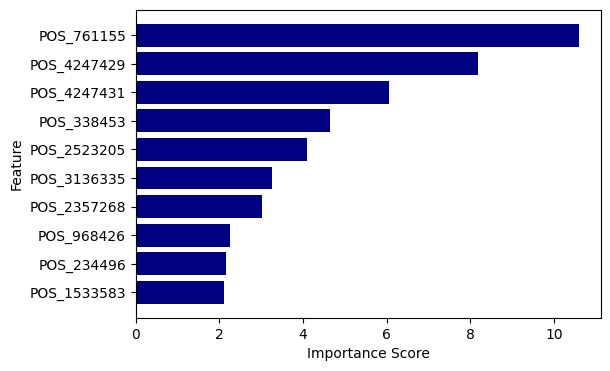

In [39]:
CAT = plot_feature_importances(cat_features, "Catboost", 'EMB_Best_Features.png')

In [92]:
X_val.head()

,AGE,SEX,HIV STATUS,POS_371,POS_1228,POS_1552,POS_1849,POS_1977,POS_2532,POS_3446,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,23,0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,51,1,0.0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,28,1,0.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27,1,0.0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,44,1,0.0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [30]:
# Initialize CatBoostClassifier
#model_cat = CatBoostClassifier(depth=3, iterations=100, l2_leaf_reg=3, learning_rate = 0.1, verbose=False)
model_xgboost = XGBClassifier(learning_rate=0.3, max_depth=3, n_estimators=100,subsample=1.0,random_state=0)
pipe = Pipeline([('ct', ct), ('classifier', model_xgboost)])
# Fit the model
pipe.fit(X_resampled, y_resampled)


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['POS_371', 'POS_1228',
                                                   'POS_1552', 'POS_1849',
                                                   'POS_1977', 'POS_2532',
                                                   'POS_3446', 'POS_4013',
                                                   'POS_5078', 'POS_6112',
                                                   'POS_6140', 'POS_6815',
                                                   'POS_7362', 'POS_7572',
                                                   'POS_7582', 'POS_7585',
                                                   'POS_8040', 'POS_8056',
                                                   'P...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [93]:
Columns_to_be_deleted = ['AGE', 'SEX', 'HIV STATUS']
X_val = X_val.drop(Columns_to_be_deleted, axis=1)

In [31]:
# Make predictions
y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)
# Make predictions for probabilities on the test data
y_test_prob = pipe.predict_proba(X_test)
y_val_prob = pipe.predict_proba(X_val)

In [33]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import matthews_corrcoef, roc_auc_score, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier

# Function to calculate metrics with CIs using bootstrapping
def calculate_metrics_with_ci(y_true, y_pred, y_prob, n_bootstraps=1000, alpha=0.95):
    metrics = {}
    
    # Define metric functions
    metric_functions = {
        'MCC': lambda y_true, y_pred: matthews_corrcoef(y_true, y_pred),
        'ROC AUC': lambda y_true, y_prob: roc_auc_score(y_true, y_prob),
        'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
        'Specificity': lambda y_true, y_pred: tn / (tn + fp),
        'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
        'Accuracy': lambda y_true, y_pred: accuracy_score(y_true, y_pred),
        'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred)
    }

    # Compute metrics and CIs
    for name, func in metric_functions.items():
        scores = []
        for _ in range(n_bootstraps):
            y_true_resampled, y_pred_resampled, y_prob_resampled = resample(y_true, y_pred, y_prob)
            tn, fp, fn, tp = confusion_matrix(y_true_resampled, y_pred_resampled).ravel()
            if name == 'Specificity':
                scores.append(func(y_true_resampled, y_pred_resampled))
            else:
                scores.append(func(y_true_resampled, y_prob_resampled if name == 'ROC AUC' else y_pred_resampled))
        lower = np.percentile(scores, (1 - alpha) / 2 * 100)
        upper = np.percentile(scores, (1 + alpha) / 2 * 100)
        mean_score = np.mean(scores)
        metrics[name] = {
            'mean': mean_score,
            'lower_ci': lower,
            'upper_ci': upper
        }

    return metrics

# Assume model_cat is your CatBoostClassifier and you have already fitted the model
# For example:
# model_cat = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, cat_features=cat_features)

# Fit the model (Example)
# model_cat.fit(X_resampled, y_resampled)

# Make predictions for the test and validation sets
y_test_pred = pipe.predict(X_test)  # Class label predictions for test set
y_test_prob = pipe.predict_proba(X_test)[:, 1]  # Probability for the positive class for test set

y_val_pred = pipe.predict(X_val)  # Class label predictions for validation set
y_val_prob = pipe.predict_proba(X_val)[:, 1]  # Probability for the positive class for validation set

# Test set metrics with CIs
test_metrics = calculate_metrics_with_ci(y_test, y_test_pred, y_test_prob)

# Validation set metrics with CIs
val_metrics = calculate_metrics_with_ci(Y_val, y_val_pred, y_val_prob)

# Create DataFrame to store results
metrics_df = pd.DataFrame({
    'Metric': ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score'],
    'Test Set Mean': [test_metrics[metric]['mean'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Test Set Lower CI': [test_metrics[metric]['lower_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Test Set Upper CI': [test_metrics[metric]['upper_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Validation Set Mean': [val_metrics[metric]['mean'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Validation Set Lower CI': [val_metrics[metric]['lower_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Validation Set Upper CI': [val_metrics[metric]['upper_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']]
})

# Optional: Round the values for better readability
metrics_df = metrics_df.round({'Test Set Mean': 2, 'Test Set Lower CI': 2, 'Test Set Upper CI': 2,
                               'Validation Set Mean': 2, 'Validation Set Lower CI': 2, 'Validation Set Upper CI': 2})

# Display the resulting dataframe
print(metrics_df)


        Metric  Test Set Mean  Test Set Lower CI  Test Set Upper CI  \
0          MCC           0.69               0.43               0.90   
1      ROC AUC           0.89               0.72               1.00   
2       Recall           0.77               0.53               1.00   
3  Specificity           0.92               0.79               1.00   
4    Precision           0.83               0.60               1.00   
5     Accuracy           0.87               0.76               0.97   
6     F1 Score           0.80               0.59               0.94   

   Validation Set Mean  Validation Set Lower CI  Validation Set Upper CI  
0                 0.35                     0.23                     0.47  
1                 0.76                     0.69                     0.81  
2                 0.51                     0.42                     0.60  
3                 0.83                     0.76                     0.90  
4                 0.78                     0.70         

In [34]:
metrics_df.head(n=10)

,Metric,Test Set Mean,Test Set Lower CI,Test Set Upper CI,Validation Set Mean,Validation Set Lower CI,Validation Set Upper CI
0,MCC,0.69,0.43,0.90,0.35,0.23,0.47
1,ROC AUC,0.89,0.72,1.00,0.76,0.69,0.81
2,Recall,0.77,0.53,1.00,0.51,0.42,0.60
3,Specificity,0.92,0.79,1.00,0.83,0.76,0.90
4,Precision,0.83,0.60,1.00,0.78,0.70,0.87
5,Accuracy,0.87,0.76,0.97,0.66,0.60,0.72
6,F1 Score,0.80,0.59,0.94,0.61,0.53,0.69


In [97]:
# Create DataFrame
df = pd.DataFrame(cat_features, columns=['Feature', 'Importance score'])

# Display DataFrame
df.head(n=10)

,Feature,Importance score
0,POS_761155,10.59
1,POS_4247429,8.18
2,POS_4247431,6.06
3,POS_338453,4.64
4,POS_2523205,4.09
5,POS_3136335,3.26
6,POS_2357268,3.03
7,POS_968426,2.26
8,POS_234496,2.15
9,POS_1533583,2.12
